# Network Buffer for Bend, Oregon

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [480]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [481]:
#conda activate geo_env


In [482]:
#python -m ipykernel install --user --name geo_env

In [483]:
import geopandas as gpd

In [484]:
import pandas as pd
from functools import reduce

In [485]:
import sys
'geopandas' in sys.modules

True

In [486]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [487]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox

In [488]:
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [489]:
#buffer size in meter
#size=804.672 #in m, this input is also required for area conversation

In [490]:
# Import streetlight and strava
ss=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-aadbt-final-all.csv")
ss=ss[ss["region"]=="Bend"]
ss=ss[ss["year"]==2019]
ss=ss.drop_duplicates(subset='site_id')
ss.head()

site_id                  site_name sensor_type  year region  \
60  P001BEN              Colorado Ave.   permanent  2019   Bend   
61  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
62  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
63  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
64  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
60             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
61             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
62             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
63             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
64             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

     longitude comment  
60 -121.319863     NaN  
61 -121.308599     NaN  
62 -121.324270     NaN  
63 -121.314923     NaN  
64 -121.310496     NaN

In [491]:
# Get the count location 
c1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites_all_study_area.csv")
c1=c1[c1["region"]=="Bend"]
c1=c1[c1["in_2019"]==1]
c1=c1[['site_id','osm_id_sensor']]
#c1=c1[c1["sensor_type"]=="permanent"]
c1.head(5)
# #print(c1.shape)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id  osm_id_sensor
430  P001BEN     48381206.0
431  P002BEN      5369877.0
432  P003BEN     49105950.0
433  P004BEN     46094523.0
434  P005BEN     46094520.0

In [492]:
# Import the non-fill buffer shape file
nf=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/Bend-net-buff-60m-2018_2019.shp")
nf.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


buff_dist  site_id                                           geometry
0       2.0  P001BEN  POLYGON ((1434667.555 262721.145, 1434667.108 ...
1       1.5  P001BEN  POLYGON ((1434451.937 263266.993, 1434450.126 ...
2       1.0  P001BEN  POLYGON ((1434231.586 264085.544, 1434231.657 ...
3      0.75  P001BEN  POLYGON ((1433871.213 264274.685, 1433867.382 ...
4       0.5  P001BEN  POLYGON ((1434732.025 264579.464, 1434727.182 ...

In [493]:
# merge by site_id
ss1=pd.merge(ss,c1, right_on='site_id', left_on='site_id',how='inner')
ss1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor  
0 -121.319863     NaN     48381206.0  
1 -121.308599     NaN      5369877.0  
2 -121.324270     NaN     49105950.0  
3 -121.314923     NaN     46094523.0  
4 -121.310496     NaN     46094520.0

In [494]:
nf1=pd.merge(ss1,nf, left_on='site_id', right_on='site_id',how='inner')
nf1 = gpd.GeoDataFrame(nf1)
nf1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id      site_name sensor_type  year region  travel_pattern      AADBT  \
0  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
1  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
2  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
3  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
4  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   

    stv_adb  stv_c_adb  stl_raw   latitude   longitude comment  osm_id_sensor  \
0  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
1  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
2  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
3  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
4  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   

  buff_dist                                           geometry  
0       2.0  POLYGON ((1434667.555 262721.145, 1434667.108 ...  
1       1.5  POLYGON ((1434451.937 263266.993, 1434450.126 ...  
2       1.0  POLYGON ((1434231.586 264085.544, 1434231.657 ...  
3      0.75  POLYGON ((1433871.213 264274.685, 1433867.382 ...  
4       0.5  POLYGON ((1434732.025 264579.464, 1434727.182 ...

In [495]:
emerging_data=ss1.loc[:,['osm_id_sensor','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']]
emerging_data.columns=['osm_id','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']
emerging_data.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw
0  48381206.0  P001BEN   permanent   46.209524   6.561644   2.616438   3189.0
1   5369877.0  P002BEN   permanent  220.426625   6.958904   3.068493   2617.0
2  49105950.0  P003BEN   permanent  127.953968  13.726027   4.369863   3128.0
3  46094523.0  P004BEN   permanent  109.378321   7.027397   2.178082   1998.0
4  46094520.0  P005BEN   permanent   61.295238   5.260274   1.698630   1387.0

# Change your Buffer size Here

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


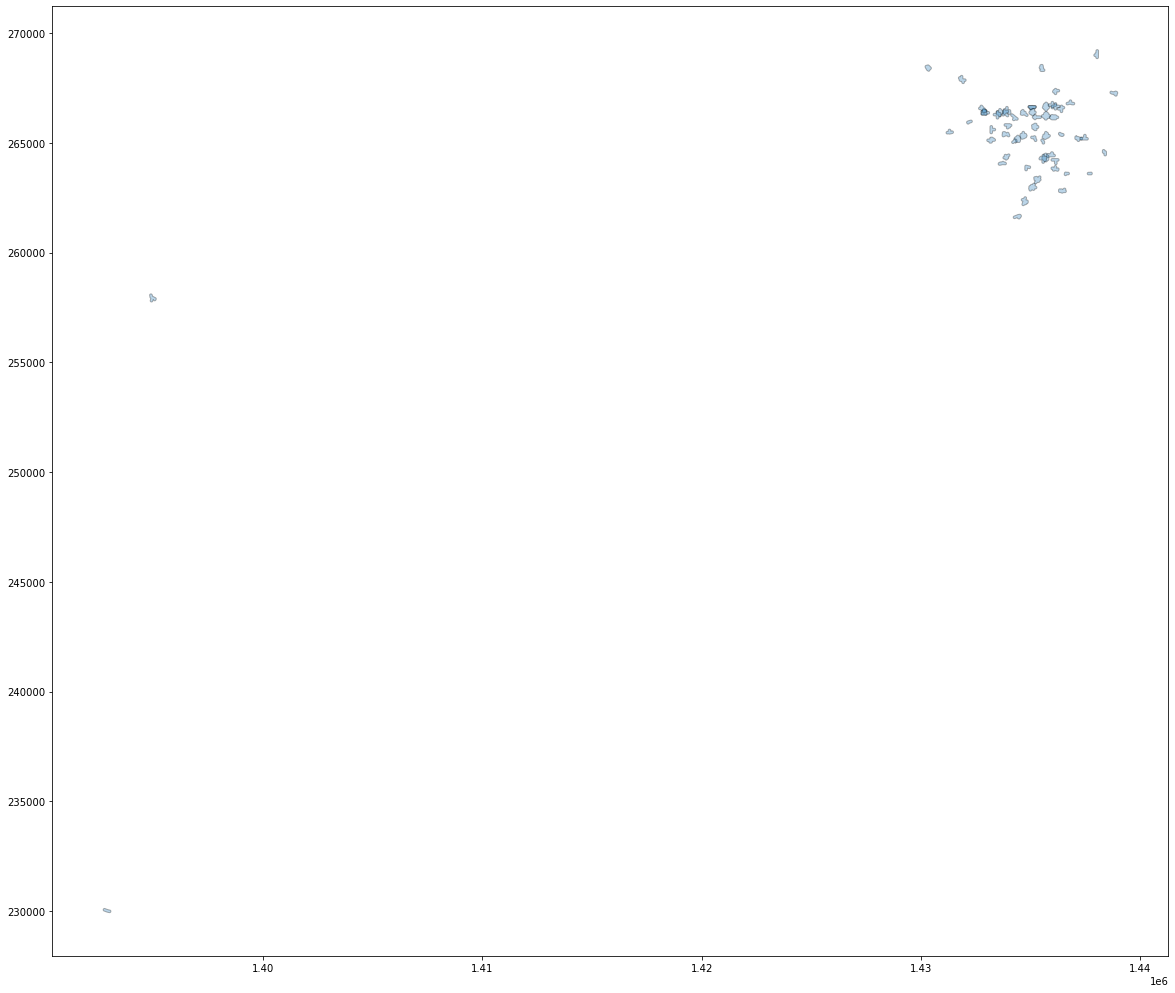

In [496]:
nf2=nf1[nf1['region']=='Bend']
nf3=nf2[nf1['buff_dist']=='0.1']
ax = nf3.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [497]:
nf3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
6   P001BEN              Colorado Ave.   permanent  2019   Bend   
13  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
20  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
27  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
34  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
6              2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
13             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
20             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
27             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
34             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

     longitude comment  osm_id_sensor buff_dist  \
6  -121.319863     NaN     48381206.0       0.1   
13 -121.308599     NaN      5369877.0       0.1   
20 -121.324270     NaN     49105950.0       0.1   
27 -121.314923     NaN     46094523.0       0.1   
34 -121.310496     NaN     46094520.0       0.1   

                                             geometry  
6   POLYGON ((1434522.967 265066.112, 1434519.909 ...  
13  POLYGON ((1435184.781 265561.835, 1435184.668 ...  
20  POLYGON ((1433996.721 265661.705, 1433993.002 ...  
27  POLYGON ((1434772.152 266228.230, 1434761.057 ...  
34  POLYGON ((1435029.831 266515.234, 1435024.166 ...

# Input the Strava Annual Network shape file here

In [498]:
strava=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/Bend_strava_osm_buffer_3mi.shp")
print(strava.crs)
# Define the current EPSG
strava = strava.set_crs("EPSG:4326")
# Let's take a copy of our layer
strava_proj = strava.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=2839)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epsg:4326


# Input Bike share data here

In [499]:
bs1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/Bend-bike-share-trip-od-all.csv")
bs1=bs1[bs1.start_year==2019]
bs1.head(5)

RouteID       start_time  start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3  23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4  23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6  24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9  24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   

   StartLongitude         end_time  end_year  EndLatitude  EndLongitude  
0     -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391  
3     -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048  
4      -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658  
6     -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753  
9     -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842

# Input OSM file here

In [500]:
# Input OSM land use shape file here
luse = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
#place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Import OSM Building shape file to get CBD (City Hall)

In [501]:
# Input OSM road shape file here
building = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [502]:
# Input the block group shape file of your study area here
bg=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/OR_blck_grp_2017.shp")

# Input Race csv file here
race=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/education.csv")

# Import school enrollmemt 
scll=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/school Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/Bike_commute_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [503]:
# Input job csv file here
Number_job=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/or_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/tabblock2010_41_pophu.shp")



# Import slope file

In [504]:
eu = rasterio.open('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/bendc.img')

# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

# Input Study Area Boundary Shape file here

In [505]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')

In [506]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

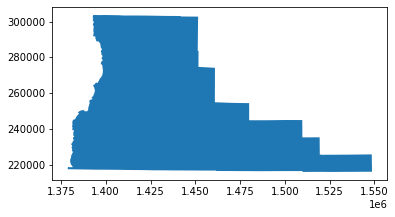

In [507]:
region = "Bend"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

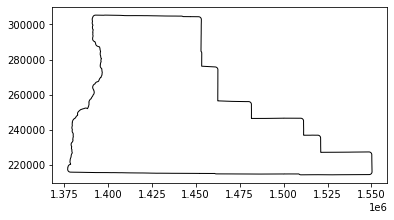

In [508]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

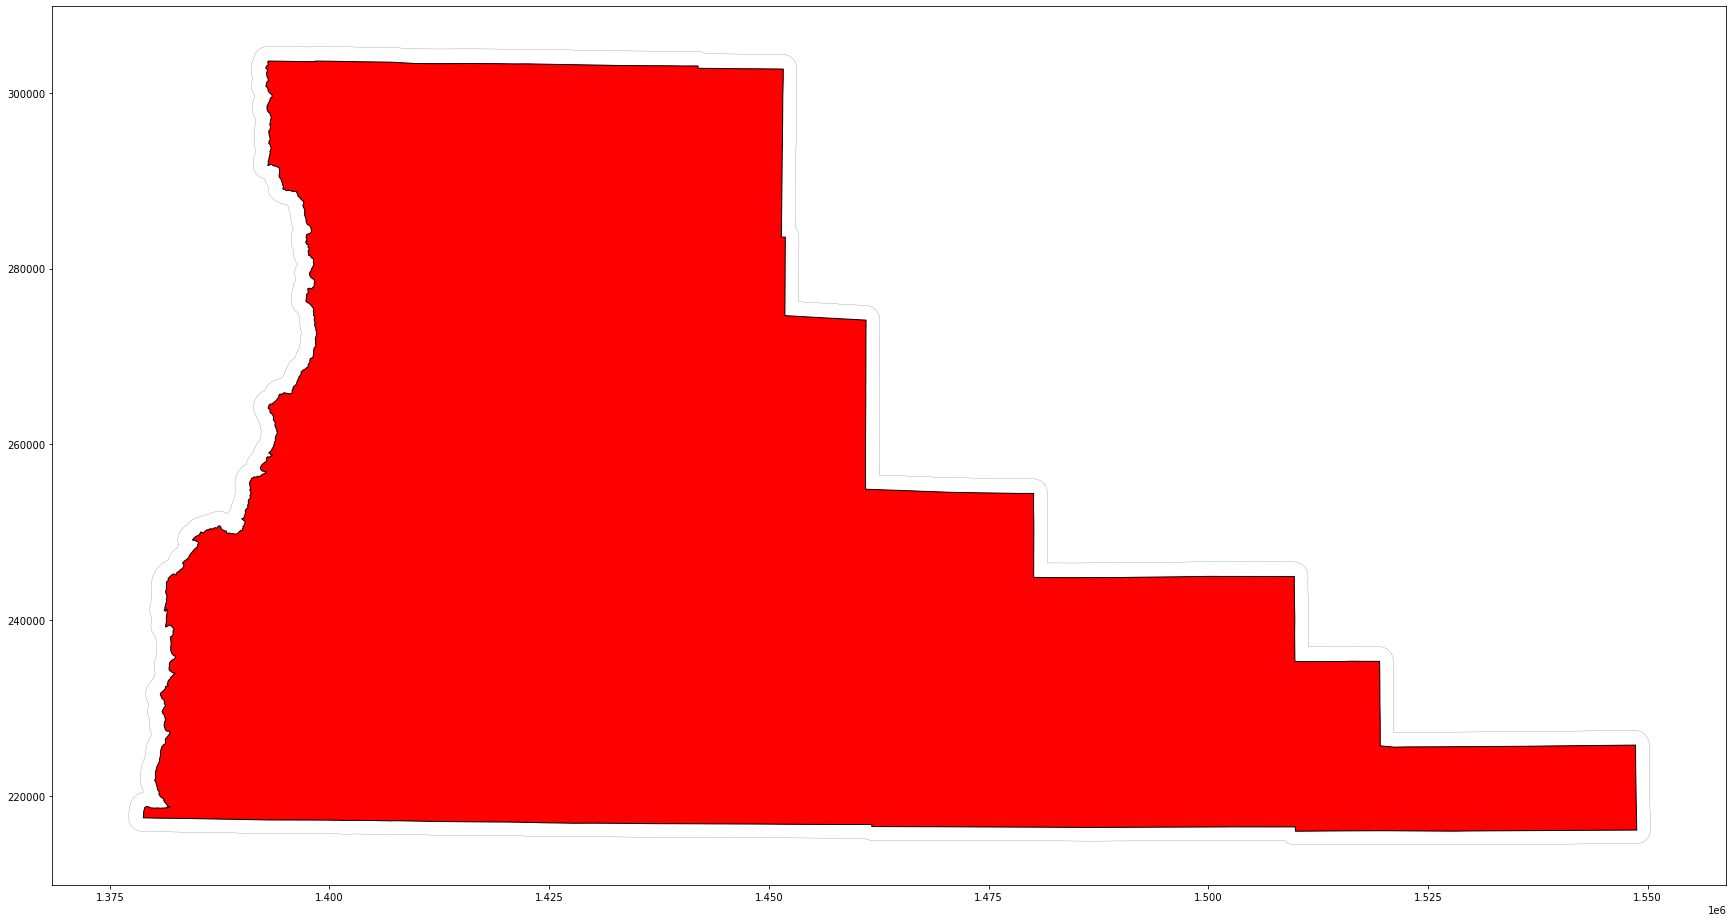

In [509]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

# Read the counter location file as gdf

In [510]:
df = gpd.GeoDataFrame(
    nf1, geometry=gpd.points_from_xy(nf1.longitude, nf1.latitude))
df.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id      site_name sensor_type  year region  travel_pattern      AADBT  \
0  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
1  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
2  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
3  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
4  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   

    stv_adb  stv_c_adb  stl_raw   latitude   longitude comment  osm_id_sensor  \
0  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
1  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
2  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
3  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
4  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   

  buff_dist                     geometry  
0       2.0  POINT (-121.31986 44.05029)  
1       1.5  POINT (-121.31986 44.05029)  
2       1.0  POINT (-121.31986 44.05029)  
3      0.75  POINT (-121.31986 44.05029)  
4       0.5  POINT (-121.31986 44.05029)

In [511]:
# set the co-ordinate system first
df = df.set_crs("EPSG:4211")
# Let's take a copy of our layer
gdf0_proj = df.copy()

# Reproject the geometries by replacing the values with projected ones
eco_proj = gdf0_proj.to_crs(epsg=2839)
eco_proj.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id      site_name sensor_type  year region  travel_pattern      AADBT  \
0  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
1  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
2  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
3  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
4  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   

    stv_adb  stv_c_adb  stl_raw   latitude   longitude comment  osm_id_sensor  \
0  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
1  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
2  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
3  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
4  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   

  buff_dist                        geometry  
0       2.0  POINT (1434297.657 265113.372)  
1       1.5  POINT (1434297.657 265113.372)  
2       1.0  POINT (1434297.657 265113.372)  
3      0.75  POINT (1434297.657 265113.372)  
4       0.5  POINT (1434297.657 265113.372)

In [512]:
ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
ecoshort0.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id      site_name sensor_type  year region  travel_pattern      AADBT  \
0  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
1  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
2  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
3  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
4  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   

    stv_adb  stv_c_adb  stl_raw   latitude   longitude comment  osm_id_sensor  \
0  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
1  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
2  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
3  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
4  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   

  buff_dist                        geometry  
0       2.0  POINT (1434297.657 265113.372)  
1       1.5  POINT (1434297.657 265113.372)  
2       1.0  POINT (1434297.657 265113.372)  
3      0.75  POINT (1434297.657 265113.372)  
4       0.5  POINT (1434297.657 265113.372)

# Filter the location by Extended Study area Boundary

In [513]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(ecoshort0, pba)
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id      site_name sensor_type  year region  travel_pattern      AADBT  \
0  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
1  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
2  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
3  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
4  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   

    stv_adb  stv_c_adb  stl_raw   latitude   longitude comment  osm_id_sensor  \
0  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
1  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
2  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
3  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   
4  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN     48381206.0   

  buff_dist                        geometry  
0       2.0  POINT (1434297.657 265113.372)  
1       1.5  POINT (1434297.657 265113.372)  
2       1.0  POINT (1434297.657 265113.372)  
3      0.75  POINT (1434297.657 265113.372)  
4       0.5  POINT (1434297.657 265113.372)

In [514]:
count_station=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [515]:
ecoshort=ecoshort.drop_duplicates(subset='osm_id_sensor')
ecoshort

site_id                                          site_name sensor_type  \
0    P001BEN                                      Colorado Ave.   permanent   
7    P002BEN                           Franklin Ave. Both Sides   permanent   
14   P003BEN                          Galveston Ave. Both Sides   permanent   
21   P004BEN                            Newport Ave. Both Sides   permanent   
28   P005BEN                           Portland Ave. Both Sides   permanent   
35   S001BEN                                 27thNorthofConnors  short-term   
42   S002BEN                         15thbetweenBearCreek&Hwy20  short-term   
49   S003BEN                  8thStreetBetweenNortonandMarshall  short-term   
56   S005BEN                            Greenwood Undercrossing  short-term   
63   S007BEN                              Olneybetween5thand6th  short-term   
70   S008BEN  PettigrewCanalCrossingbetweenAirparkDRandCoppe...  short-term   
77   S009BEN                 PurcellBetweenCanalandButlerMarket  short-term   
84   S011BEN               ReedMarketBetweenAdmiralWay_Teakwood  short-term   
91   S012BEN                 WilsonAveEastof3rdBETWEEN4THAND5TH  short-term   
98   S015BEN                         Newport and 9th Street RAB  short-term   
105  S016BEN                   Colorado between Staats and Bond  short-term   
112  S017BEN                   3rdStRailOverpassSouthofBurnside  short-term   
119  S019BEN                                      WESTBENDTRAIL  short-term   
126  S020BEN                              DrakePark Foot Bridge  short-term   
133  S021BEN                                Gilcrest Footbridge  short-term   
140  S023BEN       Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   
147  S024BEN  TrailfromColoradotoUS97Parkway_City Off Street...  short-term   
154  S025BEN                             3rdstatTaftSB Sidewalk  short-term   
161  S026BEN                       AmericanLanePedestrianBridge  short-term   
168  S029BEN                     Hwy 20 EB - WEST OF 6TH STREET  short-term   
182  S033BEN                HWY20NB_BETWEENMTWASHINGTON/OBRILEY  short-term   
189  S035BEN                            PennAveWestof12thstreet  short-term   
196  S037BEN                        ChinaHatRoadatcanalcrossing  short-term   
203  S038BEN                                Murphy3rdRABWestLeg  short-term   
210  S039BEN                          3rdbetweenBadgerandPowers  short-term   
231  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
238  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
245  S044BEN                      ReedMarketBetween6thandHerald  short-term   
252  S046BEN            BrosterhousBetweenAmericanLNandChivasRD  short-term   
259  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
266  S050BEN  9thStreetatBendHighEastEntranceBetweenEmersona...  short-term   
273  S051BEN                     6thStreetBetweenOlneyandNorton  short-term   
280  S054BEN        MtWashingtonEastofPineTerrace@DRTconnection  short-term   
287  S055BEN           Shevlin Park Road West of Park Comons Dr  short-term   
294  S056BEN                      Regency east of Mt Washington  short-term   
301  S058BEN                           Skyliner west of York Dr  short-term   
308  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   
315  S065BEN                         First Street Rapids Bridge  short-term   
322  S070BEN           Wall Street between Lafayette and Norton  short-term   
329  S071BEN  Green Lakes Intersection off Cascade lakes Hig...  short-term   
336  S072BEN                       Elk Lake Resort Intersection  short-term   
343  S073BEN        Scott Street between Rail crossing and Aune  short-term   
350  S074BEN          North of South Century Drive Intersection  short-term   
357  S075BEN  NW 15th 100' South of Knoll Neighborhood Green...  short-term   
364  S076BEN                    Larkspur trail at Bear 

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

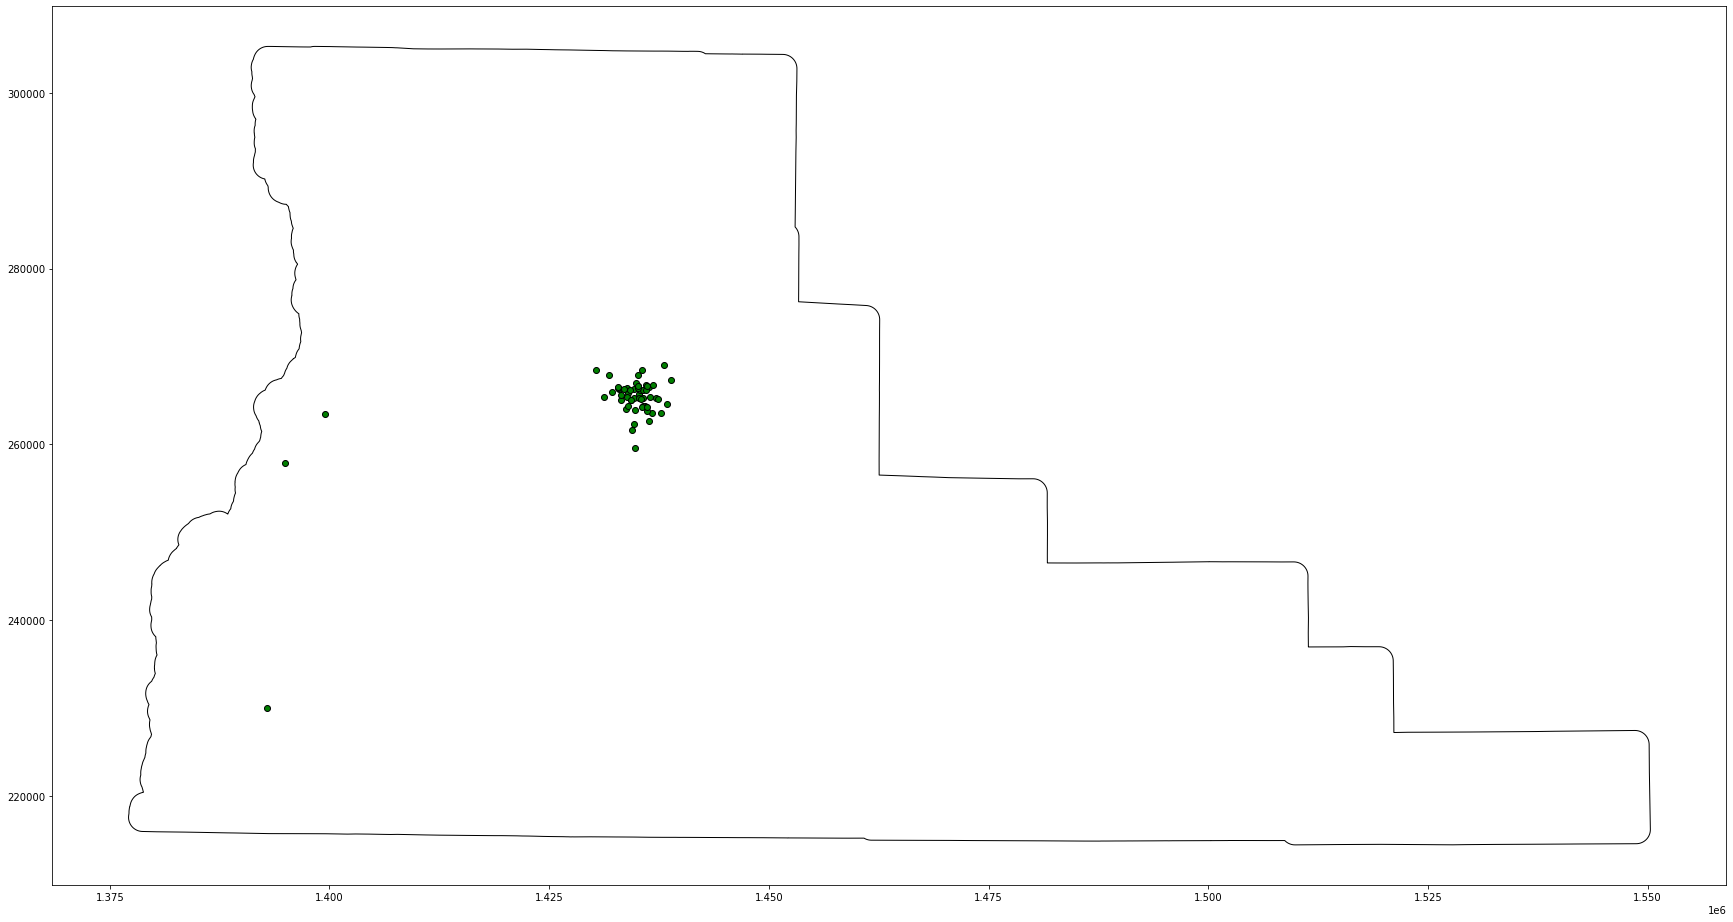

In [516]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [517]:
# Buffer file
gdf1=nf3
gdf1['buffer_area']=gdf1.area*3.86102e-7 # in mile square
gdf1=gdf1[gdf1['buffer_area']>0]
gdf1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


site_id                                          site_name sensor_type  \
6    P001BEN                                      Colorado Ave.   permanent   
13   P002BEN                           Franklin Ave. Both Sides   permanent   
20   P003BEN                          Galveston Ave. Both Sides   permanent   
27   P004BEN                            Newport Ave. Both Sides   permanent   
34   P005BEN                           Portland Ave. Both Sides   permanent   
41   S001BEN                                 27thNorthofConnors  short-term   
48   S002BEN                         15thbetweenBearCreek&Hwy20  short-term   
55   S003BEN                  8thStreetBetweenNortonandMarshall  short-term   
62   S005BEN                            Greenwood Undercrossing  short-term   
69   S007BEN                              Olneybetween5thand6th  short-term   
76   S008BEN  PettigrewCanalCrossingbetweenAirparkDRandCoppe...  short-term   
83   S009BEN                 PurcellBetweenCanalandButlerMarket  short-term   
90   S011BEN               ReedMarketBetweenAdmiralWay_Teakwood  short-term   
97   S012BEN                 WilsonAveEastof3rdBETWEEN4THAND5TH  short-term   
104  S015BEN                         Newport and 9th Street RAB  short-term   
111  S016BEN                   Colorado between Staats and Bond  short-term   
118  S017BEN                   3rdStRailOverpassSouthofBurnside  short-term   
125  S019BEN                                      WESTBENDTRAIL  short-term   
132  S020BEN                              DrakePark Foot Bridge  short-term   
139  S021BEN                                Gilcrest Footbridge  short-term   
146  S023BEN       Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   
153  S024BEN  TrailfromColoradotoUS97Parkway_City Off Street...  short-term   
160  S025BEN                             3rdstatTaftSB Sidewalk  short-term   
167  S026BEN                       AmericanLanePedestrianBridge  short-term   
174  S029BEN                     Hwy 20 EB - WEST OF 6TH STREET  short-term   
181  S032BEN          HWY20(3RD)betweenNortonandOlneySBSidewalk  short-term   
188  S033BEN                HWY20NB_BETWEENMTWASHINGTON/OBRILEY  short-term   
195  S035BEN                            PennAveWestof12thstreet  short-term   
209  S038BEN                                Murphy3rdRABWestLeg  short-term   
216  S039BEN                          3rdbetweenBadgerandPowers  short-term   
223  S040BEN                        3rdBetweenPowersandReedLane  short-term   
230  S041BEN                        3rdatFredMeyerNorthEntrance  short-term   
237  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
244  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
251  S044BEN                      ReedMarketBetween6thandHerald  short-term   
258  S046BEN            BrosterhousBetweenAmericanLNandChivasRD  short-term   
265  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
272  S050BEN  9thStreetatBendHighEastEntranceBetweenEmersona...  short-term   
279  S051BEN                     6thStreetBetweenOlneyandNorton  short-term   
293  S055BEN           Shevlin Park Road West of Park Comons Dr  short-term   
300  S056BEN                      Regency east of Mt Washington  short-term   
307  S058BEN                           Skyliner west of York Dr  short-term   
314  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   
328  S070BEN           Wall Street between Lafayette and Norton  short-term   
342  S072BEN                       Elk Lake Resort Intersection  short-term   
349  S073BEN        Scott Street between Rail crossing and Aune  short-term   
356  S074BEN          North of South Century Drive Intersection  short-term   
363  S075BEN  NW 15th 100' South of Knoll Neighborhood Green...  short-term   
370  S076BEN                    Larkspur trail at Bear Creek Rd  short-term   
377  S077BEN  !5th Street Neighborhood greenway between

In [518]:
#gdf1 = ecoshort.copy()
#gdf1['geometry'] = gdf1['geometry'].buffer(size)
#gdf1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [519]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

#https://geopandas.org/gallery/plotting_basemap_background.html

In [520]:
import contextily as ctx

In [521]:
print(gdf1.crs)

epsg:2839


In [522]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =2839 for Eugene
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:2839") # provided by PSU
gdfm = gdfm.to_crs(epsg=3857) # This EPSG just for ploting

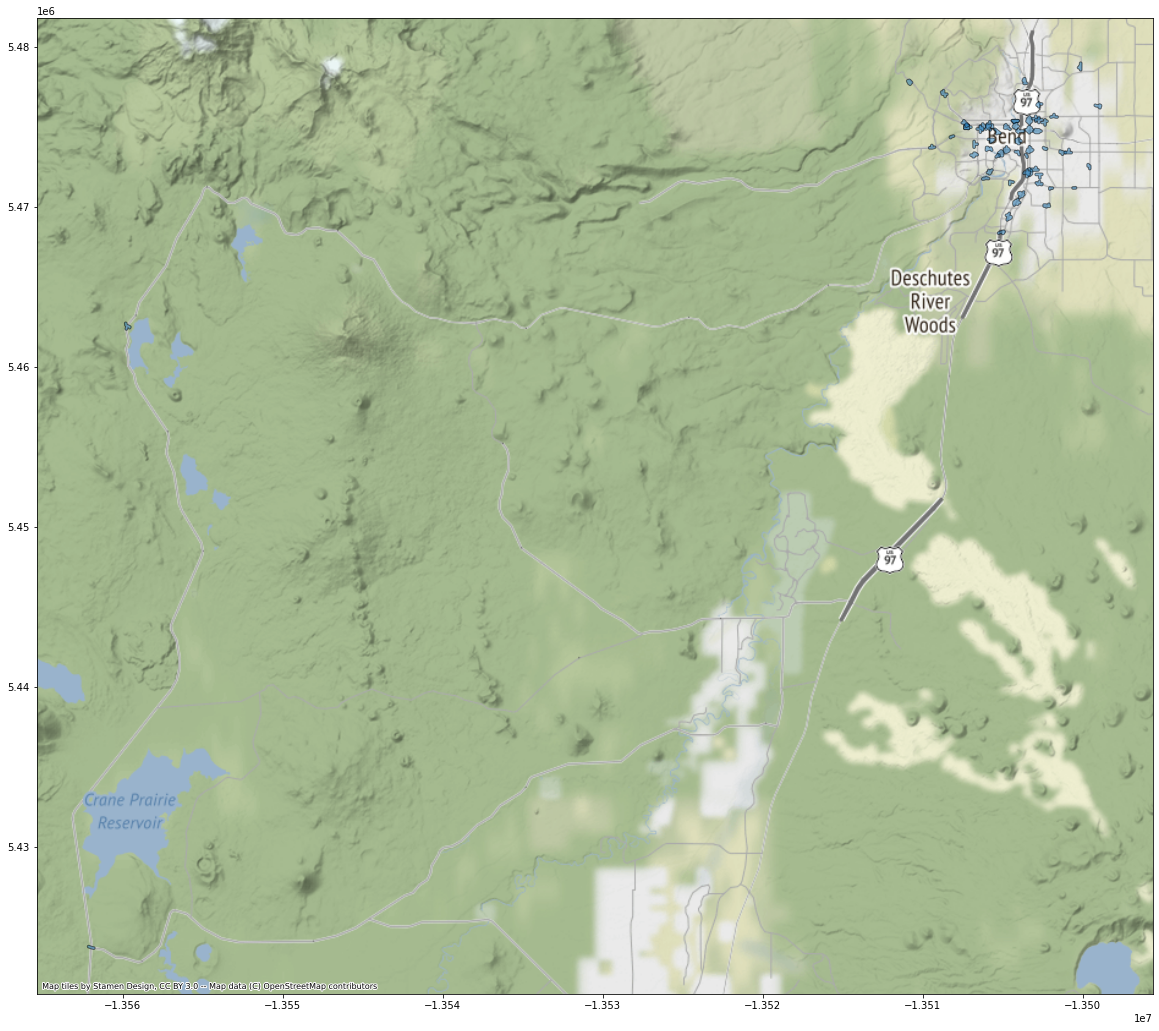

In [523]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate O, D and OD line

In [524]:
bs1['StartLatitude'] = bs1['StartLatitude'].apply(pd.to_numeric, errors='coerce')
bs1['StartLongitude'] = bs1['StartLongitude'].apply(pd.to_numeric, errors='coerce')
bs1['EndLatitude'] = bs1['EndLatitude'].apply(pd.to_numeric, errors='coerce')
bs1['EndLongitude'] = bs1['EndLongitude'].apply(pd.to_numeric, errors='coerce')
bs1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID       start_time  start_year  StartLatitude  \
0     22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3     23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4     23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6     24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9     24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   
...                        ...              ...         ...            ...   
9552  zYwXMR8vxouY8oLJJA4pY8Jv  10/12/2019 0:22        2019      44.042873   
9553  ZYYs6qwpwQazFq9wSBLZDqA9  10/10/2019 3:49        2019      44.060253   
9554  Zyz96YDv4cK7wZ8ifEGTvaEM    1/4/2019 4:04        2019      40.806627   
9555  zZ3veWeATE2KNqihXkGaKrZf  9/26/2019 22:06        2019      44.044313   
9559  ZZdoNWPrmTegP5GpMNaKPuiA   8/3/2019 23:29        2019      44.057572   

      StartLongitude         end_time  end_year  EndLatitude  EndLongitude  
0        -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391  
3        -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048  
4         -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658  
6        -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753  
9        -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842  
...              ...              ...       ...          ...           ...  
9552     -121.333600  10/12/2019 1:14      2019    44.042902   -121.332922  
9553     -121.313846  10/10/2019 3:58      2019    44.056564   -121.327529  
9554      -73.960200    1/4/2019 4:38      2019    40.806588    -73.960009  
9555     -121.323699  9/26/2019 22:22      2019    44.043014   -121.333681  
9559     -121.313893    8/4/2019 1:04      2019    44.043821   -121.315547  

[3574 rows x 9 columns]

In [525]:
bs3=bs1[bs1['StartLatitude'].notna()]
bs3.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3574, 9)

# BS Origin

In [526]:
#bs1['StartLatitude'] = bs1['StartLatitude'].apply(pd.to_numeric, errors='coerce')
#bs1['StartLongitude'] = bs1['StartLongitude'].apply(pd.to_numeric, errors='coerce')
#bs1['EndLatitude'] = bs1['EndLatitude'].apply(pd.to_numeric, errors='coerce')
#bs1['EndLongitude'] = bs1['EndLongitude'].apply(pd.to_numeric, errors='coerce')
#bs3=bs1[bs1['StartLatitude'].notna()]
#bs3.shape

In [527]:
# Origin
bso = gpd.GeoDataFrame(bs3, geometry=gpd.points_from_xy(bs3.StartLongitude, bs3.StartLatitude))
bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
bso.head(5)

RouteID  StartLatitude  StartLongitude  \
0  22C6HdCwWG3ngogK9YTNm3J4      44.058903     -121.316330   
3  23cFsQS8WTZxFd3Qnt94TAeE      44.050658     -121.308048   
4  23F4zwMdrsW8coLHeZXaxr28      40.346980      -74.655658   
6  24dpQgnrETLDH7CXzAsukAT6      44.043755     -121.315753   
9  24ZxPAvoAYseAKNbTQSHDLkt      44.043712     -121.315762   

                      geometry  
0  POINT (-121.31633 44.05890)  
3  POINT (-121.30805 44.05066)  
4   POINT (-74.65566 40.34698)  
6  POINT (-121.31575 44.04375)  
9  POINT (-121.31576 44.04371)

In [528]:
# set the co-ordinate system first
bso1 = bso.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
bso1_proj = bso1.to_crs(epsg=2839)
bso1_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  StartLatitude  StartLongitude  \
0  22C6HdCwWG3ngogK9YTNm3J4      44.058903     -121.316330   
3  23cFsQS8WTZxFd3Qnt94TAeE      44.050658     -121.308048   
4  23F4zwMdrsW8coLHeZXaxr28      40.346980      -74.655658   
6  24dpQgnrETLDH7CXzAsukAT6      44.043755     -121.315753   
9  24ZxPAvoAYseAKNbTQSHDLkt      44.043712     -121.315762   

                         geometry  
0  POINT (1434590.111 266067.384)  
3  POINT (1435244.869 265144.926)  
4  POINT (5207327.931 894189.179)  
6  POINT (1434619.932 264383.859)  
9  POINT (1434619.180 264379.095)

In [529]:
# Clip the data using GeoPandas clip
bso1_clip = gpd.clip(bso1_proj, gdf1)
bso1_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  StartLatitude  StartLongitude  \
3   23cFsQS8WTZxFd3Qnt94TAeE      44.050658     -121.308048   
61  2F3j9n4Hr6ouexgtNzwFteRC      44.044296     -121.323719   
70  2ghJf2ELSgQG2Wp3riXvQjgH      44.044308     -121.323726   
71  2gLqmz9W3bzd2k4jtkCsZKpN      44.044391     -121.323661   
78  2ii6GNv5K57dEu3B5JvDMKh5      44.044324     -121.323727   

                          geometry  
3   POINT (1435244.869 265144.926)  
61  POINT (1433982.109 264450.232)  
70  POINT (1433981.578 264451.589)  
71  POINT (1433986.846 264460.738)  
78  POINT (1433981.539 264453.320)

In [530]:
int_bso=gpd.overlay(gdf1, bso1_clip, how='intersection', make_valid=True, keep_geom_type=False)
int_bso.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                site_name sensor_type  year region  travel_pattern  \
0  P001BEN            Colorado Ave.   permanent  2019   Bend             2.0   
1  P001BEN            Colorado Ave.   permanent  2019   Bend             2.0   
2  P004BEN  Newport Ave. Both Sides   permanent  2019   Bend             1.0   
3  P004BEN  Newport Ave. Both Sides   permanent  2019   Bend             1.0   
4  P004BEN  Newport Ave. Both Sides   permanent  2019   Bend             1.0   

        AADBT   stv_adb  stv_c_adb  stl_raw   latitude   longitude comment  \
0   46.209524  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN   
1   46.209524  6.561644   2.616438   3189.0  44.050292 -121.319863     NaN   
2  109.378321  7.027397   2.178082   1998.0  44.061464 -121.314923     NaN   
3  109.378321  7.027397   2.178082   1998.0  44.061464 -121.314923     NaN   
4  109.378321  7.027397   2.178082   1998.0  44.061464 -121.314923     NaN   

   osm_id_sensor buff_dist  buffer_area                   RouteID  \
0     48381206.0       0.1     0.027829  7GXepykZTjL7MbGHhKe8sxkt   
1     48381206.0       0.1     0.027829  BGJXX24v2P8tE9v94TpvBxhT   
2     46094523.0       0.1     0.025971  2r2nS2hYcxbzdEhCExxcCuoZ   
3     46094523.0       0.1     0.025971  2SrPgeRJRZiGMftoQpbL9YvY   
4     46094523.0       0.1     0.025971  3AhcH4wHjcKyF8dZtFg7BrjB   

   StartLatitude  StartLongitude                        geometry  
0      44.052355     -121.318215  POINT (1434431.993 265341.389)  
1      44.052378     -121.318235  POINT (1434430.407 265343.894)  
2      44.060391     -121.312991  POINT (1434859.243 266230.150)  
3      44.060388     -121.313043  POINT (1434855.057 266229.831)  
4      44.060357     -121.313002  POINT (1434858.309 266226.363)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

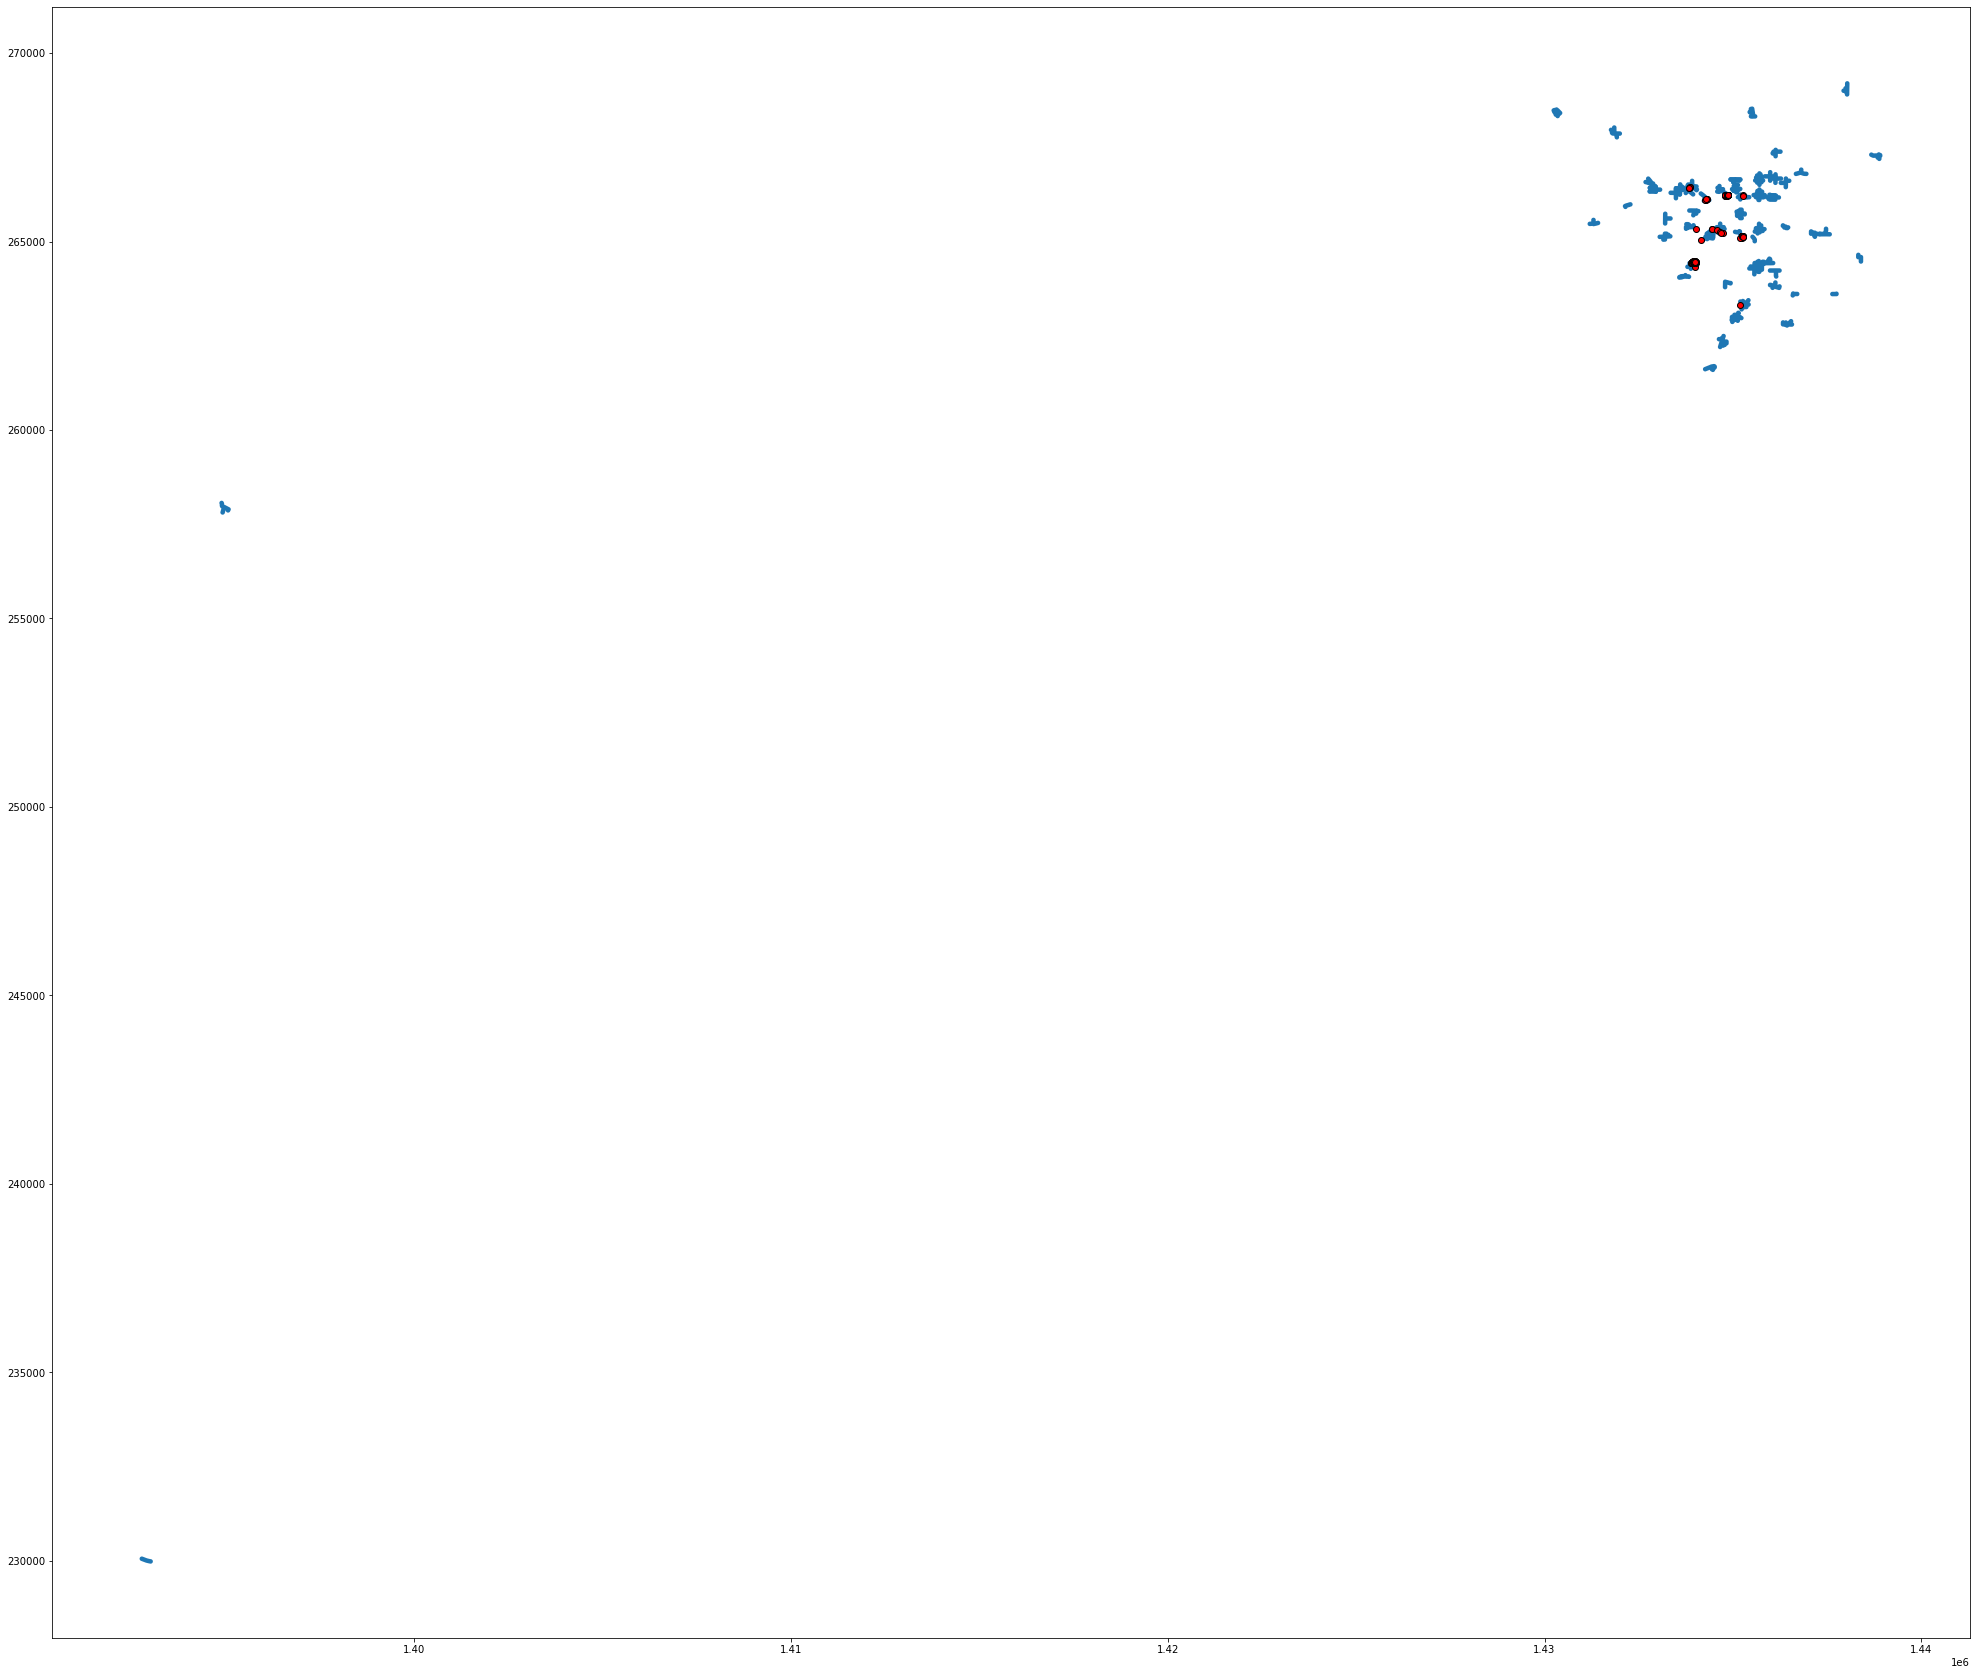

In [531]:
#int_bso.geometry.plot()
ax = gdf1.plot(figsize=(40, 30))
int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [532]:
output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_origin.columns=["osm_id","Bike Share Origin"]
output_origin.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bike Share Origin
0   5372909.0                  2
1   5377556.0                  2
2  39857665.0                  5
3  46094523.0                210
4  48381198.0                  4

In [533]:
# If there is no data, then run this to gnerate zero
#d = {'osm_id': [], 'Bike Share Origin': []}
#output_origin = pd.DataFrame(data=d)
#output_origin

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# BS destination

In [534]:
# Destination
bsd = gpd.GeoDataFrame(
    bs3, geometry=gpd.points_from_xy(bs3.EndLongitude, bs3.EndLatitude))
bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
bsd.head(5)

RouteID  EndLatitude  EndLongitude  \
0  22C6HdCwWG3ngogK9YTNm3J4    44.042999   -121.333391   
3  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   -121.308048   
4  23F4zwMdrsW8coLHeZXaxr28    40.346980    -74.655658   
6  24dpQgnrETLDH7CXzAsukAT6    44.043755   -121.315753   
9  24ZxPAvoAYseAKNbTQSHDLkt    44.043686   -121.315842   

                      geometry  
0  POINT (-121.33339 44.04300)  
3  POINT (-121.30805 44.05066)  
4   POINT (-74.65566 40.34698)  
6  POINT (-121.31575 44.04375)  
9  POINT (-121.31584 44.04369)

In [535]:
# set the co-ordinate system first
bsd1 = bsd.set_crs("EPSG:4211")
# Reproject the geometries by replacing the values with projected ones
bsd1_proj = bsd1.to_crs(epsg=2839)
bsd1_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  EndLatitude  EndLongitude  \
0  22C6HdCwWG3ngogK9YTNm3J4    44.042999   -121.333391   
3  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   -121.308048   
4  23F4zwMdrsW8coLHeZXaxr28    40.346980    -74.655658   
6  24dpQgnrETLDH7CXzAsukAT6    44.043755   -121.315753   
9  24ZxPAvoAYseAKNbTQSHDLkt    44.043686   -121.315842   

                         geometry  
0  POINT (1433205.559 264313.745)  
3  POINT (1435244.869 265144.926)  
4  POINT (5207327.931 894189.179)  
6  POINT (1434619.932 264383.859)  
9  POINT (1434612.740 264376.240)

In [536]:
# Clip the data using GeoPandas clip
bsd1_clip = gpd.clip(bsd1_proj, gdf1)
bsd1_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  EndLatitude  EndLongitude  \
3    23cFsQS8WTZxFd3Qnt94TAeE    44.050658   -121.308048   
13   27N2PNbQr5Gvm8inWeS8tCFs    44.056148   -121.323182   
36   2byCXXdHF4q9xouu3udGiCDG    44.060485   -121.313032   
115  2pHyzpyZZgwyYaiYEGZTFvZk    44.044330   -121.323705   
116  2pRG9s3bq7subpFYYAnvTEYr    44.044293   -121.323759   

                           geometry  
3    POINT (1435244.869 265144.926)  
13   POINT (1434038.107 265766.728)  
36   POINT (1434856.035 266240.645)  
115  POINT (1433983.253 264454.006)  
116  POINT (1433978.868 264449.894)

In [537]:
int_bsd=gpd.overlay(gdf1, bsd1_clip, how='intersection', make_valid=True, keep_geom_type=False)
int_bsd.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P001BEN              Colorado Ave.   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
4  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
4             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   

    longitude comment  osm_id_sensor buff_dist  buffer_area  \
0 -121.319863     NaN     48381206.0       0.1     0.027829   
1 -121.319863     NaN     48381206.0       0.1     0.027829   
2 -121.324270     NaN     49105950.0       0.1     0.022462   
3 -121.324270     NaN     49105950.0       0.1     0.022462   
4 -121.324270     NaN     49105950.0       0.1     0.022462   

                    RouteID  EndLatitude  EndLongitude  \
0  7GXepykZTjL7MbGHhKe8sxkt    44.052355   -121.318215   
1  wCBpwWsiu4z6ARFKa6AGzHRG    44.052370   -121.318245   
2  27N2PNbQr5Gvm8inWeS8tCFs    44.056148   -121.323182   
3  ayemKsrwyBnvucivGKjppLHa    44.056692   -121.325678   
4  bu8LJeQQBc9bjBW7rAEwoYez    44.056989   -121.326122   

                         geometry  
0  POINT (1434431.993 265341.389)  
1  POINT (1434429.557 265343.069)  
2  POINT (1434038.107 265766.728)  
3  POINT (1433838.664 265829.083)  
4  POINT (1433803.461 265862.417)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

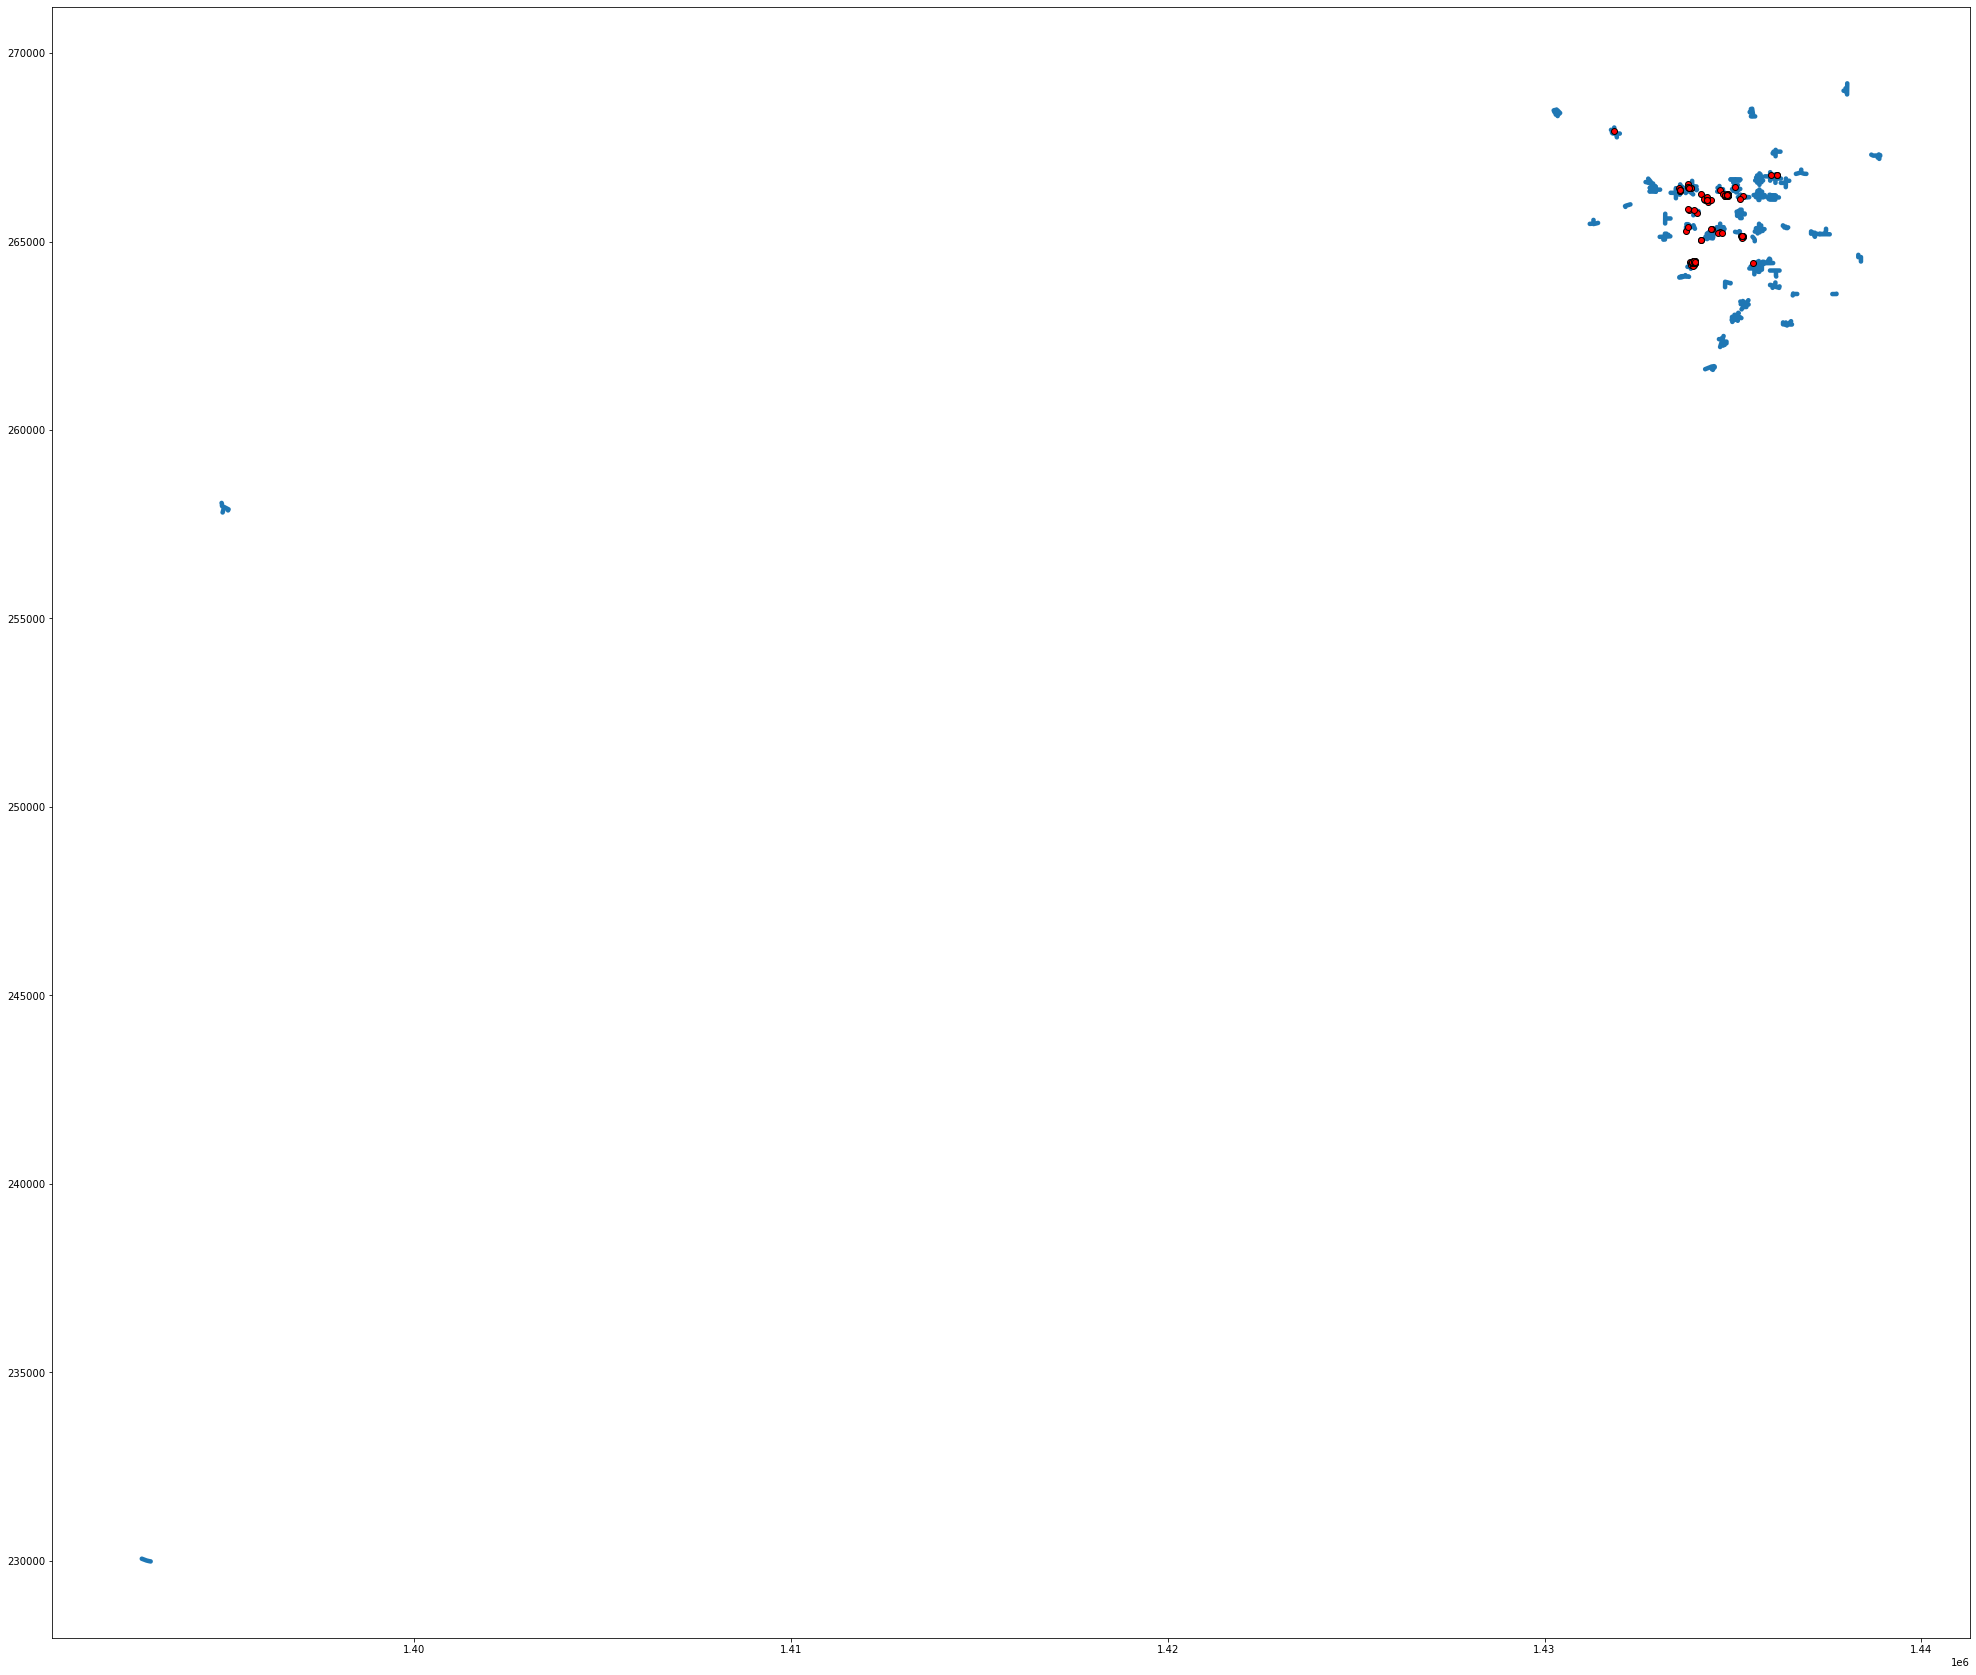

In [538]:
#int_bsd.geometry.plot()
#plotting    
ax = gdf1.plot(figsize=(40, 30))
int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [539]:
output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_destination.columns=["osm_id","Bike Share Destination"]
output_destination.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bike Share Destination
0  5369529.0                       1
1  5369733.0                       1
2  5372909.0                       2
3  5376261.0                       2
4  5376895.0                       3

In [540]:
# If there is no data, then run this to gnerate zero
#d = {'osm_id': [], 'Bike Share Destination': []}
#output_destination = pd.DataFrame(data=d)
#output_destination

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Bike Share OD line Crossing

In [541]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
import shapely.geometry as geom
bs_all_od=bs3.copy()
bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
bs_all_od.head(5)

RouteID       start_time  start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3  23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4  23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6  24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9  24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   

   StartLongitude         end_time  end_year  EndLatitude  EndLongitude  \
0     -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391   
3     -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048   
4      -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658   
6     -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753   
9     -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842   

                                            geometry  
0  LINESTRING (-121.31633 44.0589028, -121.333390...  
3  LINESTRING (-121.3080479 44.0506585, -121.3080...  
4  LINESTRING (-74.65565839999999 40.3469795, -74...  
6  LINESTRING (-121.3157532 44.04375491, -121.315...  
9  LINESTRING (-121.315762 44.04371197, -121.3158...

In [542]:
# exclude the points outside of Portland
#bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-122)&(bs_all_od.StartLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-122)&(bs_all_od1.EndLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=45)&(bs_all_od1.StartLatitude<=46)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
#bs_all_od1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [543]:
#bs_all_od1.dtypes

In [544]:
#print(bs_all_od1.info())

In [545]:
bs_all_od2 = gpd.GeoDataFrame(bs_all_od, geometry='geometry', crs={'init': 'epsg:4211'})
bs_all_od2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


RouteID       start_time  start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3  23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4  23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6  24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9  24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   

   StartLongitude         end_time  end_year  EndLatitude  EndLongitude  \
0     -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391   
3     -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048   
4      -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658   
6     -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753   
9     -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842   

                                            geometry  
0  LINESTRING (-121.31633 44.05890, -121.33339 44...  
3  LINESTRING (-121.30805 44.05066, -121.30805 44...  
4  LINESTRING (-74.65566 40.34698, -74.65566 40.3...  
6  LINESTRING (-121.31575 44.04375, -121.31575 44...  
9  LINESTRING (-121.31576 44.04371, -121.31584 44...

In [546]:
#print(bs_all_od2.crs)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [547]:
#print(bs_all_od2.info())

In [548]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
bs_all_od2_proj = bs_all_od2.to_crs(epsg=2839)
bs_all_od2_proj.head(5)

RouteID       start_time  start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3  23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4  23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6  24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9  24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   

   StartLongitude         end_time  end_year  EndLatitude  EndLongitude  \
0     -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391   
3     -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048   
4      -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658   
6     -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753   
9     -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842   

                                            geometry  
0  LINESTRING (1434590.111 266067.384, 1433205.55...  
3  LINESTRING (1435244.869 265144.926, 1435244.86...  
4  LINESTRING (5207327.931 894189.179, 5207327.93...  
6  LINESTRING (1434619.932 264383.859, 1434619.93...  
9  LINESTRING (1434619.180 264379.095, 1434612.74...

In [549]:
#bs_all_od2_proj.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

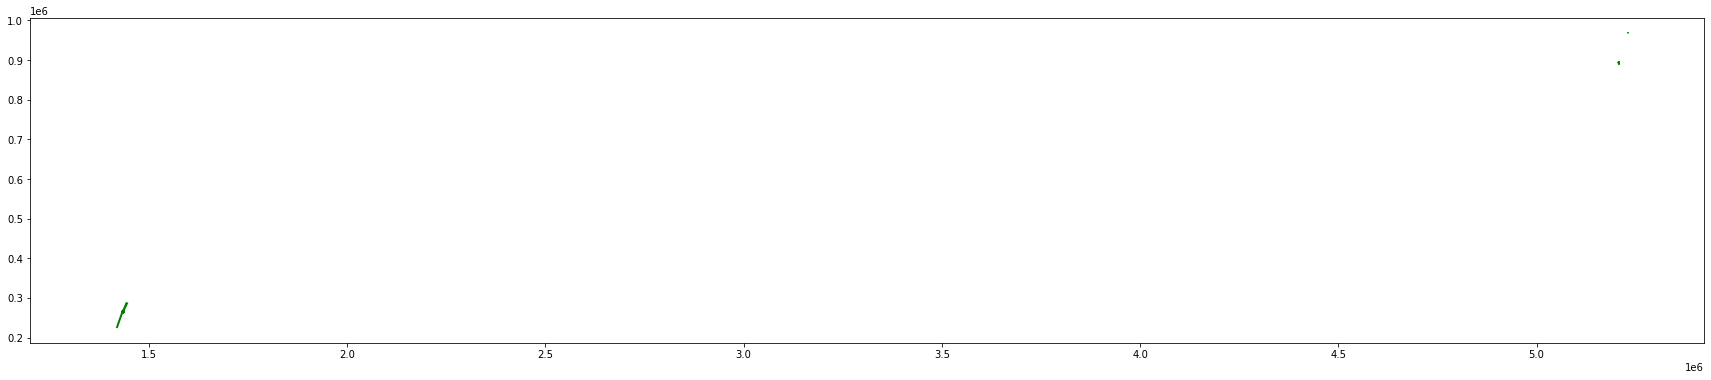

In [550]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [551]:
spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [552]:
#spj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [553]:
#spj.shape

In [554]:
# Clip the data using GeoPandas clip
#odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
#odc1_clip.head(5)

In [555]:
#int_odl=gpd.overlay(gdf1, bs_all_od2_proj, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl.head(5)

<AxesSubplot:>

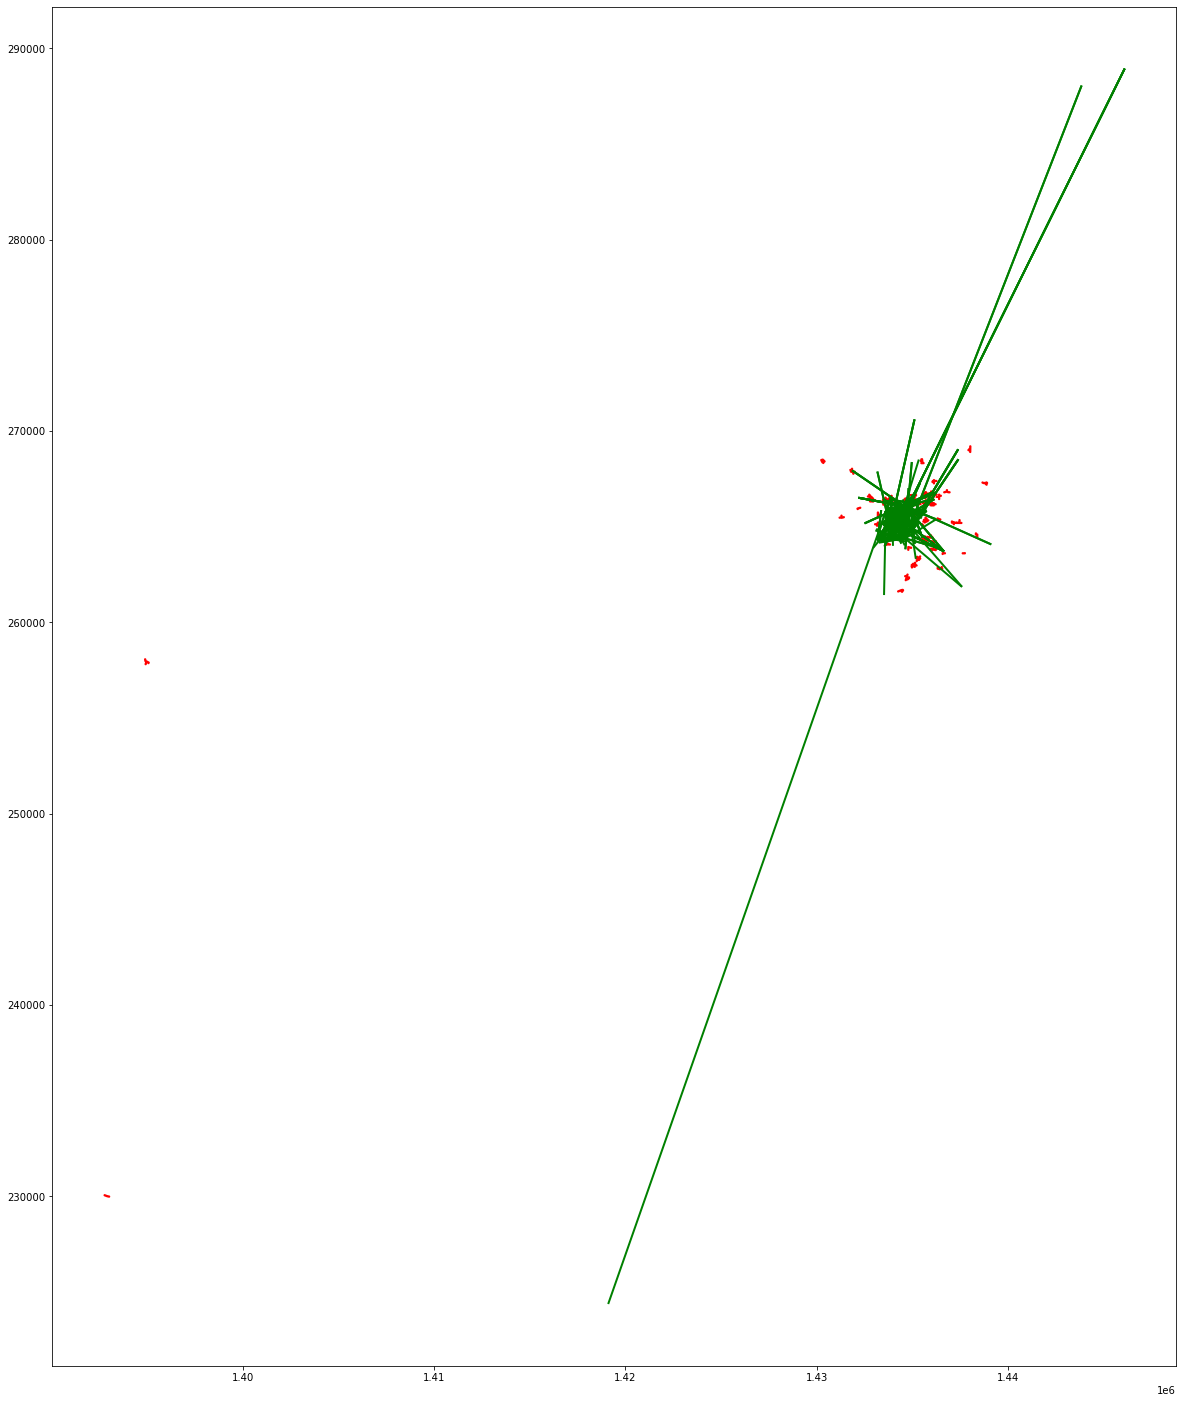

In [556]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [557]:
output_odl=spj.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_odl.columns=["osm_id","Bike Share Crossing"]
output_odl.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bike Share Crossing
0  5369529.0                    1
1  5369733.0                    6
2  5369877.0                   14
3  5371320.0                    1
4  5372140.0                    6

# Calculate the Bike Share GPS route

In [558]:
gps_bs=gpd.read_file('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/Bend-bike-share-traces-all.shp(2)/Bend-bike-share-traces-all.shp')
gps_bs=gps_bs[gps_bs.year==2019]
gps_bs

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tripID    year           start_time  \
0     22C6HdCwWG3ngogK9YTNm3J4  2019.0  2019-09-15 21:03:07   
6     24ZxPAvoAYseAKNbTQSHDLkt  2019.0  2019-06-09 17:56:25   
7     25uvDxzxdMnc4Bove7RxyFwf  2019.0  2019-01-02 00:24:54   
10    27N2PNbQr5Gvm8inWeS8tCFs  2019.0  2019-08-16 02:49:05   
19    29RpvmMgeFstRky4RmePsZtK  2019.0  2019-05-09 20:54:08   
...                        ...     ...                  ...   
8862  zYwXMR8vxouY8oLJJA4pY8Jv  2019.0  2019-10-12 00:22:10   
8863  ZYYs6qwpwQazFq9wSBLZDqA9  2019.0  2019-10-10 03:49:06   
8864  Zyz96YDv4cK7wZ8ifEGTvaEM  2019.0  2019-01-04 04:04:43   
8865  zZ3veWeATE2KNqihXkGaKrZf  2019.0  2019-09-26 22:06:39   
8869  ZZdoNWPrmTegP5GpMNaKPuiA  2019.0  2019-08-03 23:29:07   

                                               geometry  
0     LINESTRING (-121.31633 44.05890, -121.31633 44...  
6     LINESTRING (-121.31576 44.04371, -121.31585 44...  
7     LINESTRING (-121.31591 44.05862, -121.31633 44...  
10    LINESTRING (-121.31635 44.05893, -121.31635 44...  
19    LINESTRING (-121.31400 44.05747, -121.31394 44...  
...                                                 ...  
8862  LINESTRING (-121.33360 44.04287, -121.33359 44...  
8863  LINESTRING (-121.31385 44.06025, -121.31385 44...  
8864  LINESTRING (-73.96020 40.80663, -73.96020 40.8...  
8865  LINESTRING (-121.32370 44.04431, -121.32370 44...  
8869  LINESTRING (-121.31389 44.05757, -121.31389 44...  

[3192 rows x 4 columns]

In [559]:
bs_all_od_gps = gpd.GeoDataFrame(gps_bs, geometry='geometry', crs={'init': 'epsg:4211'})
# Reproject the geometries by replacing the values with projected ones
bs_all_od_gps_proj = bs_all_od_gps.to_crs(epsg=2839)
bs_all_od_gps_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


tripID    year           start_time  \
0   22C6HdCwWG3ngogK9YTNm3J4  2019.0  2019-09-15 21:03:07   
6   24ZxPAvoAYseAKNbTQSHDLkt  2019.0  2019-06-09 17:56:25   
7   25uvDxzxdMnc4Bove7RxyFwf  2019.0  2019-01-02 00:24:54   
10  27N2PNbQr5Gvm8inWeS8tCFs  2019.0  2019-08-16 02:49:05   
19  29RpvmMgeFstRky4RmePsZtK  2019.0  2019-05-09 20:54:08   

                                             geometry  
0   LINESTRING (1434591.218 266066.755, 1434591.21...  
6   LINESTRING (1434620.289 264378.467, 1434613.33...  
7   LINESTRING (1434624.764 266034.756, 1434590.96...  
10  LINESTRING (1434589.327 266069.851, 1434589.32...  
19  LINESTRING (1434776.585 265905.488, 1434781.39...

In [560]:
spj = gpd.sjoin( bs_all_od_gps_proj,gdf1, how="inner", op='intersects')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [561]:
# Clip the data using GeoPandas clip
#odc1_clip_gps = gpd.clip(bs_all_od_gps_proj,gdf1)
#odc1_clip_gps.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [562]:
#int_odl_gps=gpd.overlay(gdf1, odc1_clip_gps, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl_gps.head(5)

<AxesSubplot:>

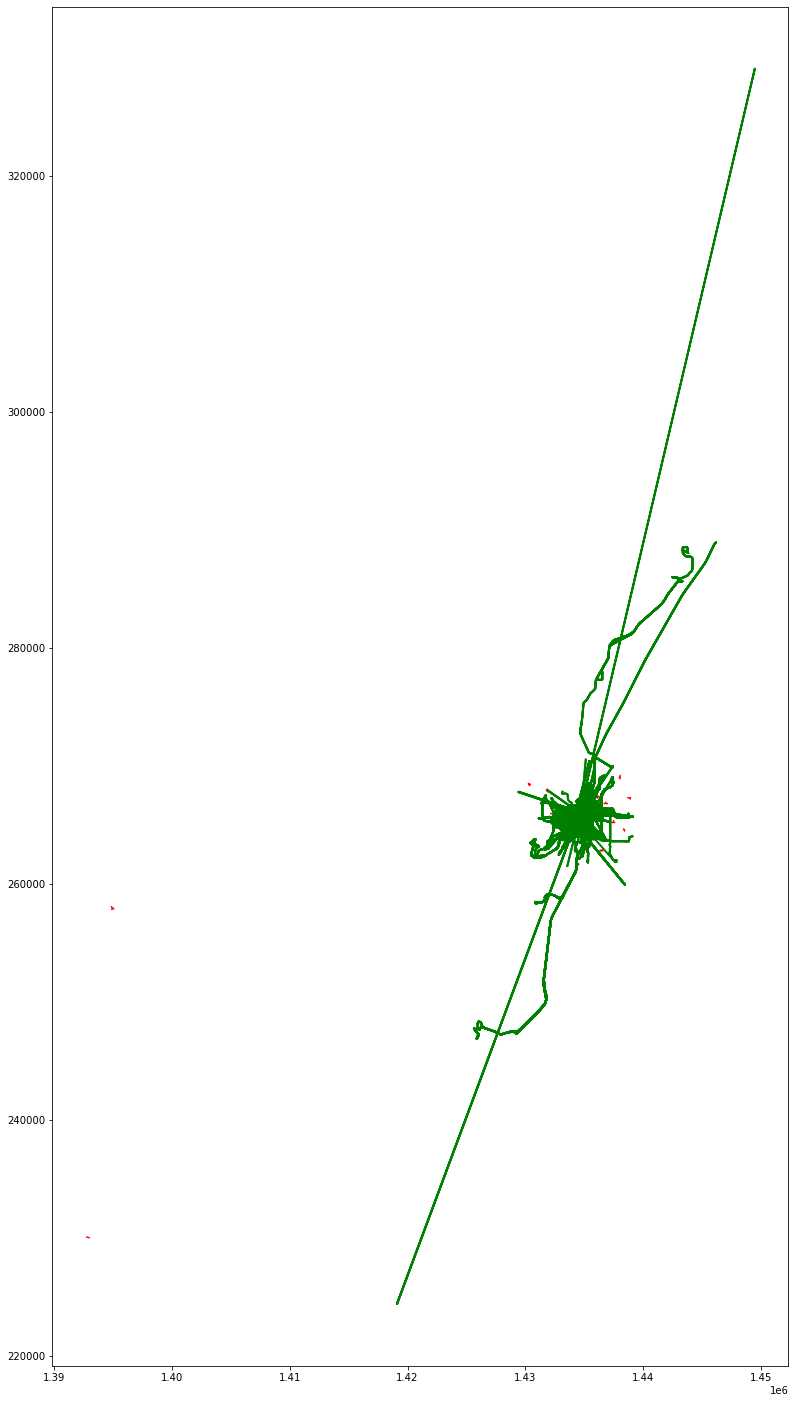

In [563]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [564]:
output_odl_gps=spj.groupby(by=['osm_id_sensor'])['tripID'].count().reset_index()
output_odl_gps.columns=["osm_id","Bike Share route"]
output_odl_gps.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bike Share route
0  5369529.0                 1
1  5369733.0                17
2  5369877.0                51
3  5372140.0                36
4  5372797.0                 6

# Now import land use shape file

In [565]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                   name         type  \
0   5280431                   None       quarry   
1   5492216          Crescent Lake  residential   
2  30010727    Brown Road Property        grass   
3  30266634                   None       retail   
4  30267489  McNary Field Heliport     military   

                                            geometry  
0  POLYGON ((-121.95901 44.96990, -121.95834 44.9...  
1  POLYGON ((-121.92823 43.49807, -121.92638 43.4...  
2  POLYGON ((-122.96808 44.95760, -122.96807 44.9...  
3  POLYGON ((-122.97490 44.91162, -122.97453 44.9...  
4  POLYGON ((-123.00129 44.91634, -123.00139 44.9...

# Define and then Convert the co-ordinate system

In [566]:
# set the co-ordinate system first
#lusec = luse.set_crs("EPSG:4326")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [567]:
# Let's take a copy of our layer
luse_proj = lusec.copy()

# Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=2839)
luse_proj.head(5)

osm_id                   name         type  \
0   5280431                   None       quarry   
1   5492216          Crescent Lake  residential   
2  30010727    Brown Road Property        grass   
3  30266634                   None       retail   
4  30267489  McNary Field Heliport     military   

                                            geometry  
0  POLYGON ((1384863.563 368001.131, 1384916.198 ...  
1  POLYGON ((1384502.788 204423.129, 1384649.913 ...  
2  POLYGON ((1305210.479 368501.172, 1305213.793 ...  
3  POLYGON ((1304521.449 363407.656, 1304553.132 ...  
4  POLYGON ((1302453.177 363994.477, 1302444.708 ...

# Visualize

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

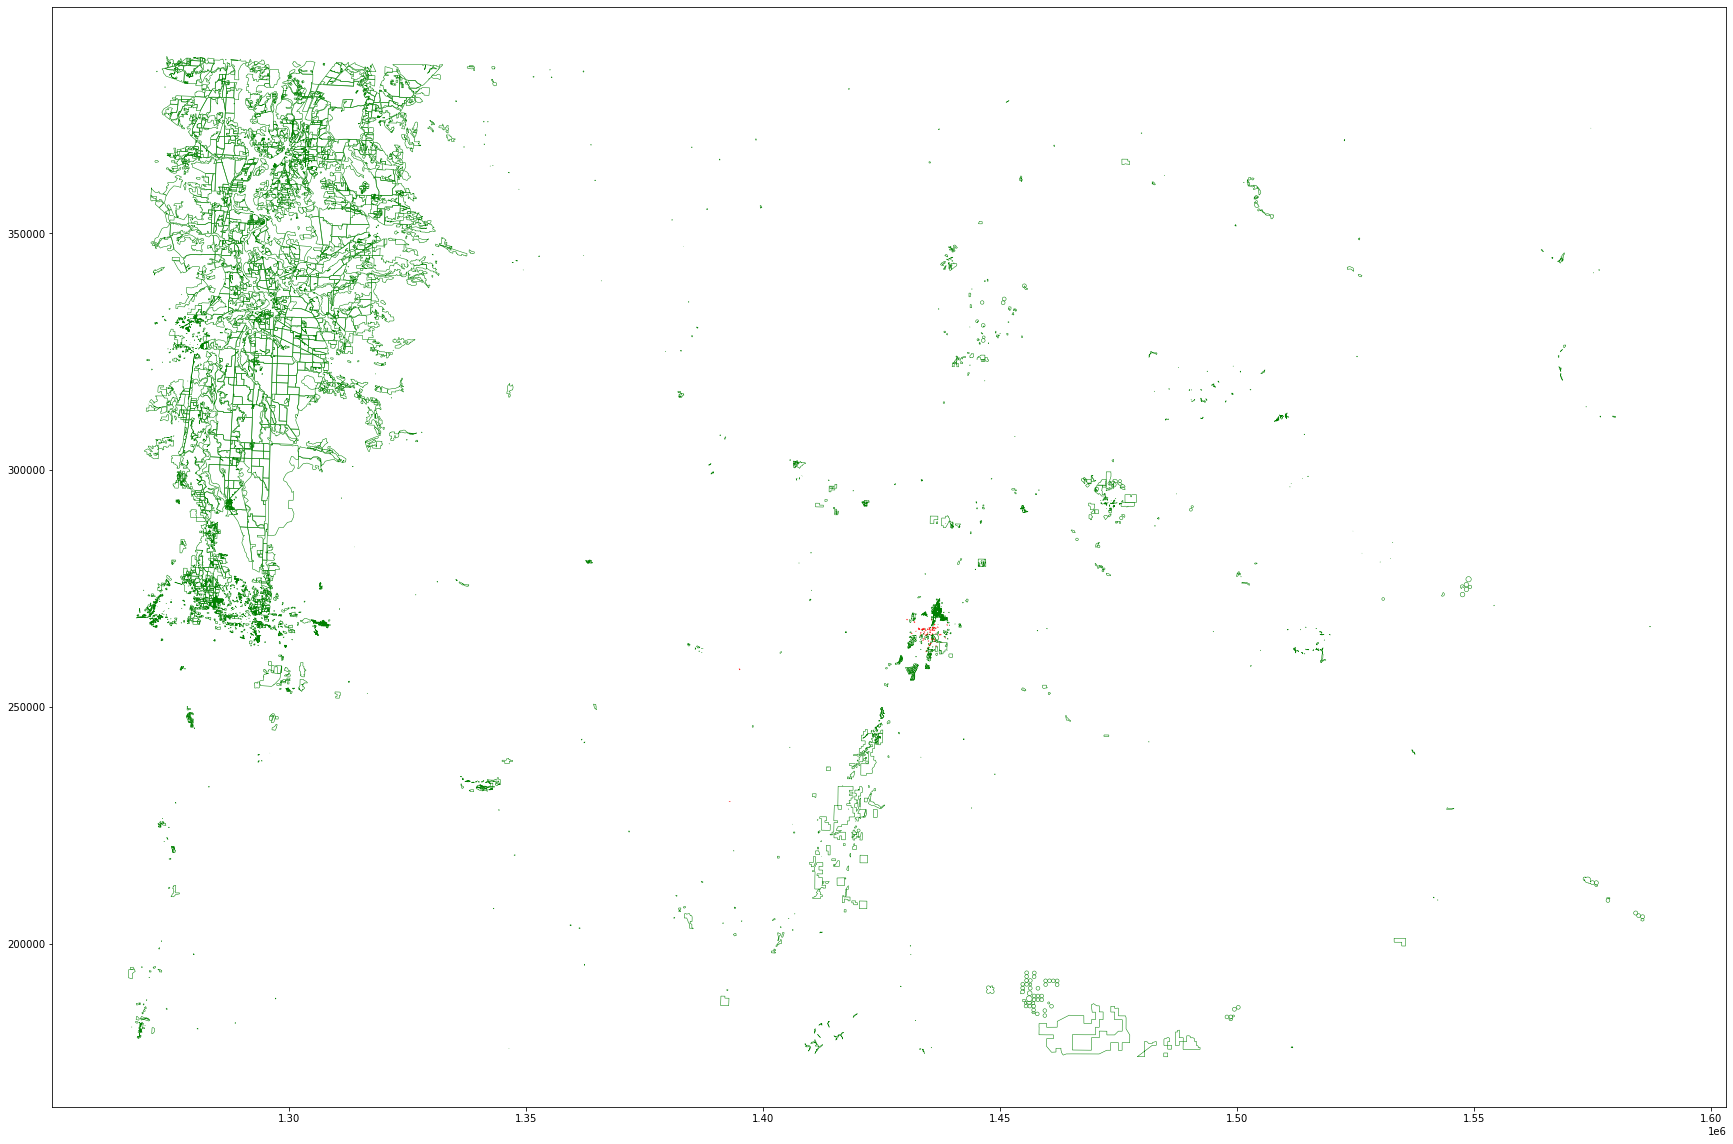

In [568]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [569]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [570]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [571]:
#luse_proj.exterior.type

In [572]:
#gdf1.exterior.type

In [573]:
#luse_proj.exterior.is_valid

In [574]:
#gdf1.exterior.is_valid

In [575]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id                   name         type  \
0   5280431                   None       quarry   
1   5492216          Crescent Lake  residential   
2  30010727    Brown Road Property        grass   
3  30266634                   None       retail   
4  30267489  McNary Field Heliport     military   

                                            geometry  
0  POLYGON ((1384863.563 368001.131, 1384854.017 ...  
1  POLYGON ((1384502.788 204423.129, 1384649.913 ...  
2  POLYGON ((1305210.479 368501.172, 1305004.835 ...  
3  POLYGON ((1304521.449 363407.656, 1304372.154 ...  
4  POLYGON ((1302453.177 363994.477, 1302529.000 ...

In [576]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                        name        type  \
502   315771308  USFS Scott Street Compound  industrial   
1802  484238925                        None  industrial   
1899  503697937        Bend River Promenade      retail   
1910  505426359      Northwest Self Storage     garages   
1911  505991231            Pioneer Crossing      retail   

                                               geometry  
502   MULTIPOLYGON (((1435515.676 265117.765, 143555...  
1802  POLYGON ((1435565.552 264441.923, 1435520.909 ...  
1899  POLYGON ((1435643.499 268314.909, 1435632.156 ...  
1910  POLYGON ((1435759.994 265239.387, 1435761.636 ...  
1911  POLYGON ((1434706.873 262244.162, 1434700.448 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


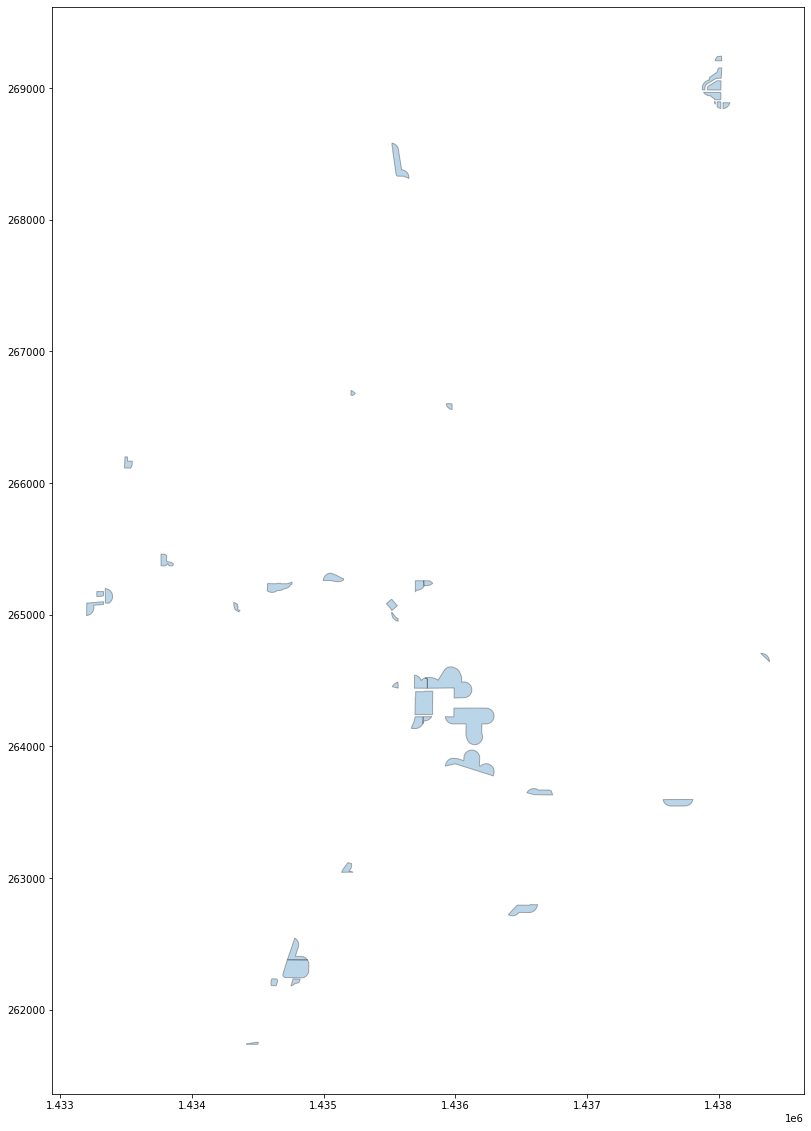

In [577]:
ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [578]:
 intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
 intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
2  P005BEN                           Portland Ave. Both Sides   permanent   
3  S088BEN                  Portland Ave. Sidewalk Both Sides  short-term   
4  S007BEN                              Olneybetween5thand6th  short-term   

   year region  travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  \
0  2019   Bend             2.0   46.209524  6.561644   2.616438   3189.0   
1  2019   Bend             3.0  185.863877  5.671233   2.315068    769.0   
2  2019   Bend             2.0   61.295238  5.260274   1.698630   1387.0   
3  2019   Bend             3.0    9.322895  5.260274   1.698630   1387.0   
4  2019   Bend             2.0  109.106655  3.205479   1.465753   1125.0   

    latitude   longitude                           comment  osm_id_sensor  \
0  44.050292 -121.319863                               NaN     48381206.0   
1  44.050261 -121.319990                               NaN    432213408.0   
2  44.064152 -121.310496                               NaN     46094520.0   
3  44.064151 -121.310525                               NaN     46094521.0   
4  44.064968 -121.298188  single OSM link for divided road      5376261.0   

  buff_dist  buffer_area     osm_id  name          type  \
0       0.1     0.027829  806460288  None         grass   
1       0.1     0.013746  806460288  None         grass   
2       0.1     0.020198  828968854  None  construction   
3       0.1     0.020198  828968854  None  construction   
4       0.1     0.026346  568548059  None         grass   

                                            geometry  
0  POLYGON ((1434342.220 265043.795, 1434337.063 ...  
1  POLYGON ((1434363.367 265030.627, 1434363.367 ...  
2  POLYGON ((1435217.239 266698.460, 1435222.445 ...  
3  POLYGON ((1435217.239 266698.460, 1435222.445 ...  
4  POLYGON ((1435968.868 266558.875, 1435963.331 ...

In [579]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
2  P005BEN                           Portland Ave. Both Sides   permanent   
3  S088BEN                  Portland Ave. Sidewalk Both Sides  short-term   
4  S007BEN                              Olneybetween5thand6th  short-term   

   year region  travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  \
0  2019   Bend             2.0   46.209524  6.561644   2.616438   3189.0  ...   
1  2019   Bend             3.0  185.863877  5.671233   2.315068    769.0  ...   
2  2019   Bend             2.0   61.295238  5.260274   1.698630   1387.0  ...   
3  2019   Bend             3.0    9.322895  5.260274   1.698630   1387.0  ...   
4  2019   Bend             2.0  109.106655  3.205479   1.465753   1125.0  ...   

    longitude                           comment osm_id_sensor  buff_dist  \
0 -121.319863                               NaN    48381206.0        0.1   
1 -121.319990                               NaN   432213408.0        0.1   
2 -121.310496                               NaN    46094520.0        0.1   
3 -121.310525                               NaN    46094521.0        0.1   
4 -121.298188  single OSM link for divided road     5376261.0        0.1   

  buffer_area     osm_id  name          type  \
0    0.027829  806460288  None         grass   
1    0.013746  806460288  None         grass   
2    0.020198  828968854  None  construction   
3    0.020198  828968854  None  construction   
4    0.026346  568548059  None         grass   

                                            geometry          Area  
0  POLYGON ((1434342.220 265043.795, 1434337.063 ...  10949.728235  
1  POLYGON ((1434363.367 265030.627, 1434363.367 ...  16654.240309  
2  POLYGON ((1435217.239 266698.460, 1435222.445 ...   8693.918485  
3  POLYGON ((1435217.239 266698.460, 1435222.445 ...   8693.918485  
4  POLYGON ((1435968.868 266558.875, 1435963.331 ...  15757.997165  

[5 rows x 21 columns]

#https://geopandas.org/docs/user_guide/set_operations.html

In [580]:
#intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [581]:
output_landuse=intdata.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_landuse.columns=['osm_id','type','Area']
output_landuse.head()

osm_id         type           Area
0  5369733.0   industrial   13441.048732
1  5369733.0       retail   61776.280529
2  5371320.0  residential  116166.080850
3  5372797.0      garages   45805.760839
4  5372797.0   industrial   21831.679725

In [582]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_commercial.columns=['osm_id','Commercial Area ']
output_commercial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, Commercial Area ]
Index: []

In [583]:
gdf1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
6   P001BEN              Colorado Ave.   permanent  2019   Bend   
13  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
20  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
27  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
34  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
6              2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
13             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
20             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
27             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
34             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

     longitude comment  osm_id_sensor buff_dist  \
6  -121.319863     NaN     48381206.0       0.1   
13 -121.308599     NaN      5369877.0       0.1   
20 -121.324270     NaN     49105950.0       0.1   
27 -121.314923     NaN     46094523.0       0.1   
34 -121.310496     NaN     46094520.0       0.1   

                                             geometry  buffer_area  
6   POLYGON ((1434522.967 265066.112, 1434519.909 ...     0.027829  
13  POLYGON ((1435184.781 265561.835, 1435184.668 ...     0.030584  
20  POLYGON ((1433996.721 265661.705, 1433993.002 ...     0.022462  
27  POLYGON ((1434772.152 266228.230, 1434761.057 ...     0.025971  
34  POLYGON ((1435029.831 266515.234, 1435024.166 ...     0.020198

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\plotting.py:399: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

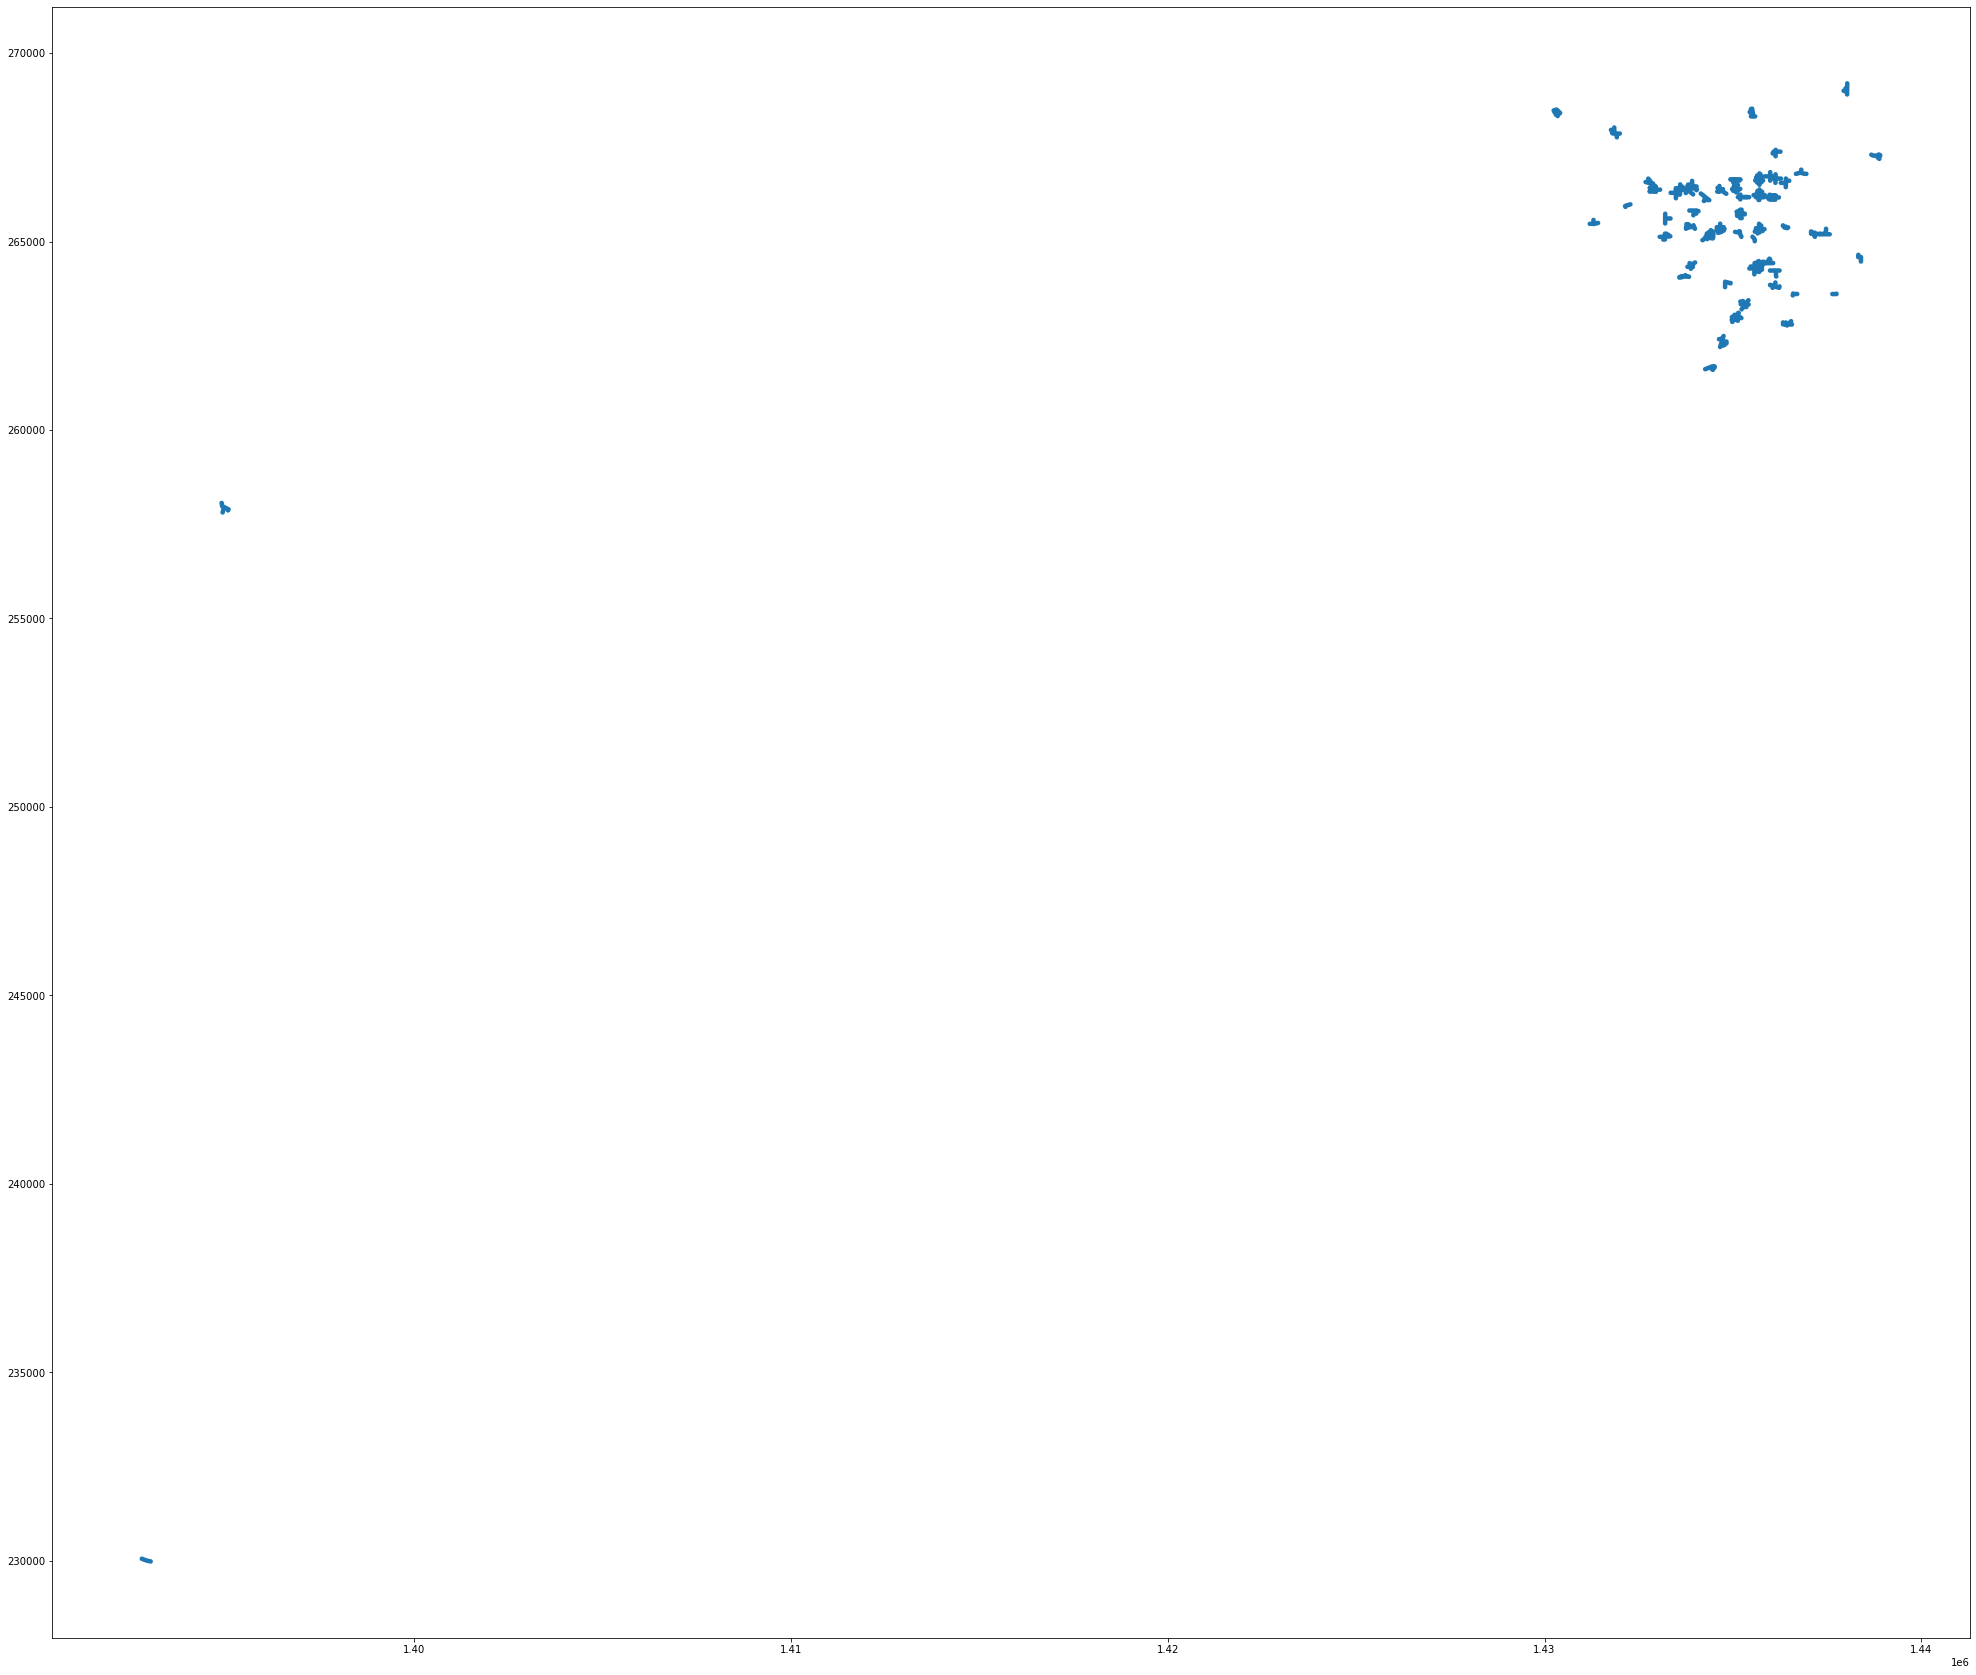

In [584]:
#plotting    
ax = gdf1.plot(figsize=(40, 30))
commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [585]:
# Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_industrial.columns=['osm_id','Industrial Area ']
output_industrial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Industrial Area 
0    5369733.0      13441.048732
1    5372797.0      21831.679725
2    5373510.0      50764.622510
3  143486914.0        227.200095

In [586]:
# Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_residential.columns=['osm_id','Residential_Area ']
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Area 
0    5371320.0      116166.080850
1    5373770.0      595229.694666
2   47636835.0      232179.808498
3   48332546.0      451362.663774
4  143486914.0       18823.940935

In [587]:
residential.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                           site_name sensor_type  year region  \
6   S009BEN  PurcellBetweenCanalandButlerMarket  short-term  2019   Bend   
7   S009BEN  PurcellBetweenCanalandButlerMarket  short-term  2019   Bend   
8   S009BEN  PurcellBetweenCanalandButlerMarket  short-term  2019   Bend   
9   S009BEN  PurcellBetweenCanalandButlerMarket  short-term  2019   Bend   
10  S009BEN  PurcellBetweenCanalandButlerMarket  short-term  2019   Bend   

    travel_pattern      AADBT   stv_adb  stv_c_adb  stl_raw  ...  longitude  \
6              2.0  78.482543  1.958904   1.082192    581.0  ...  -121.2738   
7              2.0  78.482543  1.958904   1.082192    581.0  ...  -121.2738   
8              2.0  78.482543  1.958904   1.082192    581.0  ...  -121.2738   
9              2.0  78.482543  1.958904   1.082192    581.0  ...  -121.2738   
10             2.0  78.482543  1.958904   1.082192    581.0  ...  -121.2738   

    comment osm_id_sensor  buff_dist buffer_area     osm_id  name  \
6       NaN    47636835.0        0.1    0.022464  766381972  None   
7       NaN    47636835.0        0.1    0.022464  766381973  None   
8       NaN    47636835.0        0.1    0.022464  766381974  None   
9       NaN    47636835.0        0.1    0.022464  766381975  None   
10      NaN    47636835.0        0.1    0.022464  766381976  None   

           type                                           geometry  \
6   residential  POLYGON ((1437913.930 269003.363, 1437916.566 ...   
7   residential  POLYGON ((1437967.038 268919.277, 1437964.481 ...   
8   residential  POLYGON ((1437971.370 268880.708, 1437969.420 ...   
9   residential  POLYGON ((1438014.878 268844.556, 1438009.175 ...   
10  residential  POLYGON ((1437876.580 268987.434, 1437875.594 ...   

            Area  
6   60327.806801  
7   52171.408690  
8     759.526953  
9   13834.226111  
10  71553.258710  

[5 rows x 21 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

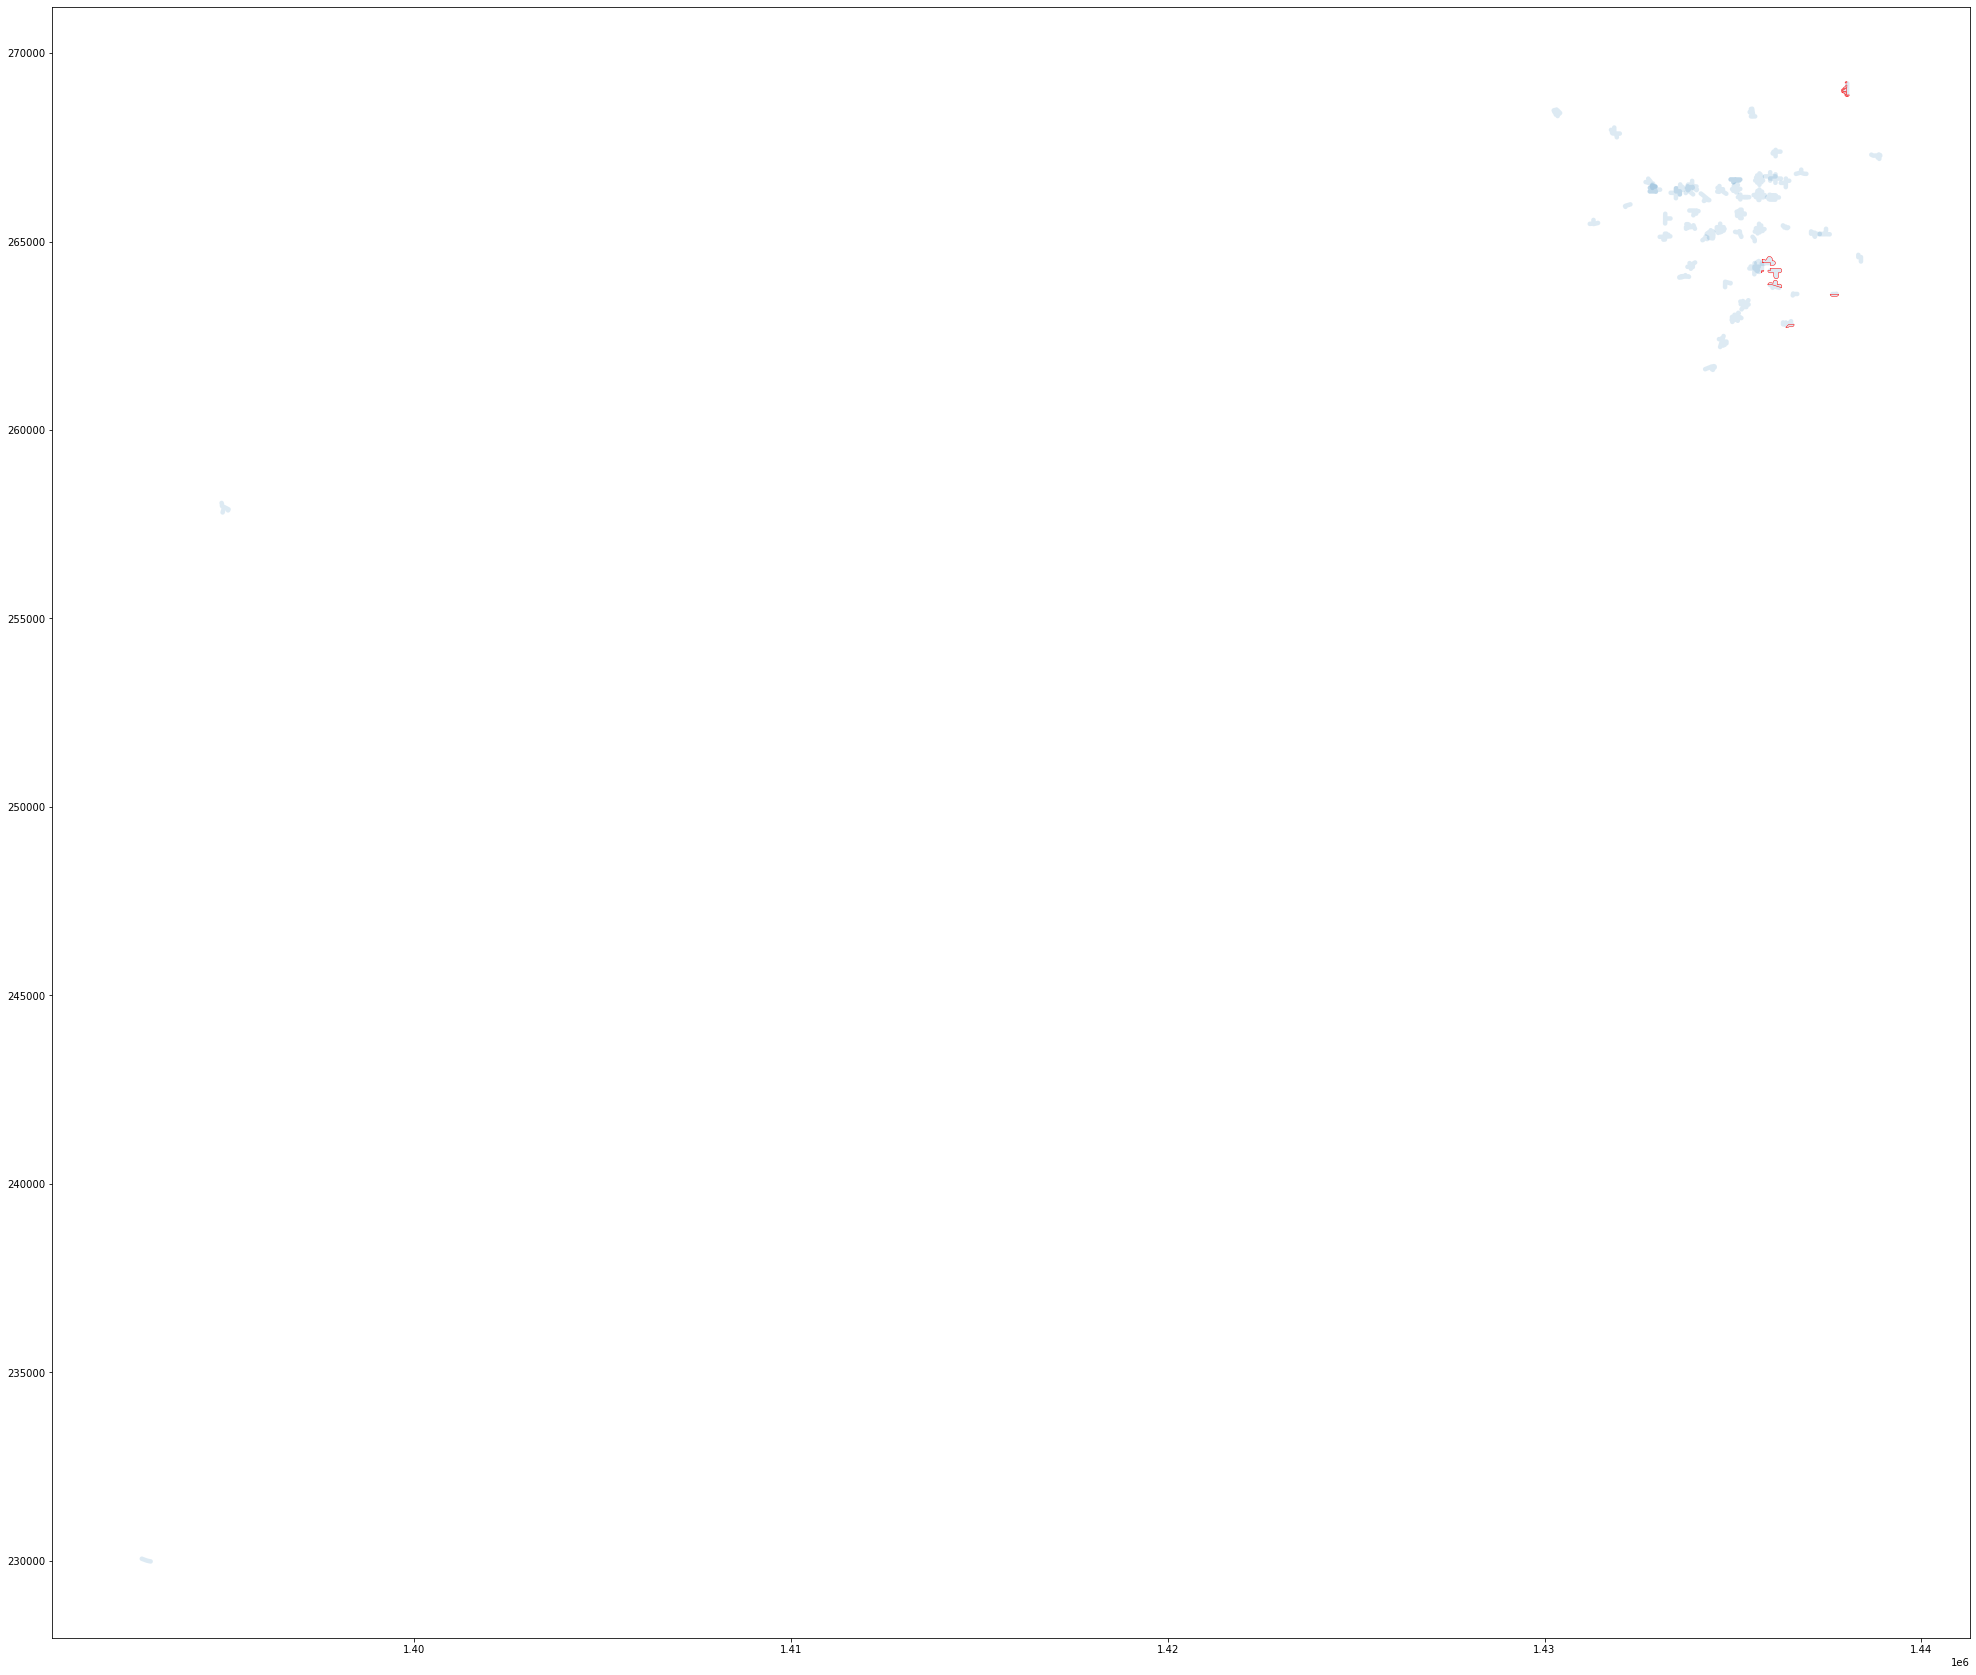

In [588]:
#plotting    
ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [589]:
# Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_retail.columns=['osm_id','Retail Area']
output_retail.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Retail Area
0   5369733.0   61776.280529
1   5375454.0  137649.863321
2  48332546.0  128617.183392
3  48381198.0   96255.383752
4  90955476.0  140269.262977

In [590]:
# Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_grass.columns=['osm_id','Grass Area']
output_grass.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Grass Area
0    5376261.0  15757.997165
1    5376895.0  38381.606719
2   48381206.0  10949.728235
3  142063142.0  52021.737368
4  432213408.0  16654.240309

In [591]:
output_grass.index

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RangeIndex(start=0, stop=5, step=1)

# Use the Natural Shape file to calculate the Park, water and green spaces

In [592]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  
0  POLYGON ((-121.30684 44.07593, -121.30712 44.0...  
1  POLYGON ((-123.11511 44.06993, -123.11502 44.0...  
2  POLYGON ((-123.11552 44.07244, -123.11557 44.0...  
3  POLYGON ((-123.11880 44.08418, -123.11888 44.0...  
4  POLYGON ((-122.96766 44.99005, -122.96836 44.9...

In [593]:
# set the co-ordinate system first
# nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=2839)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290536.901 ...  
2  POLYGON ((1290505.755 270524.092, 1290500.193 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305294.417 ...

In [594]:
#nature_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

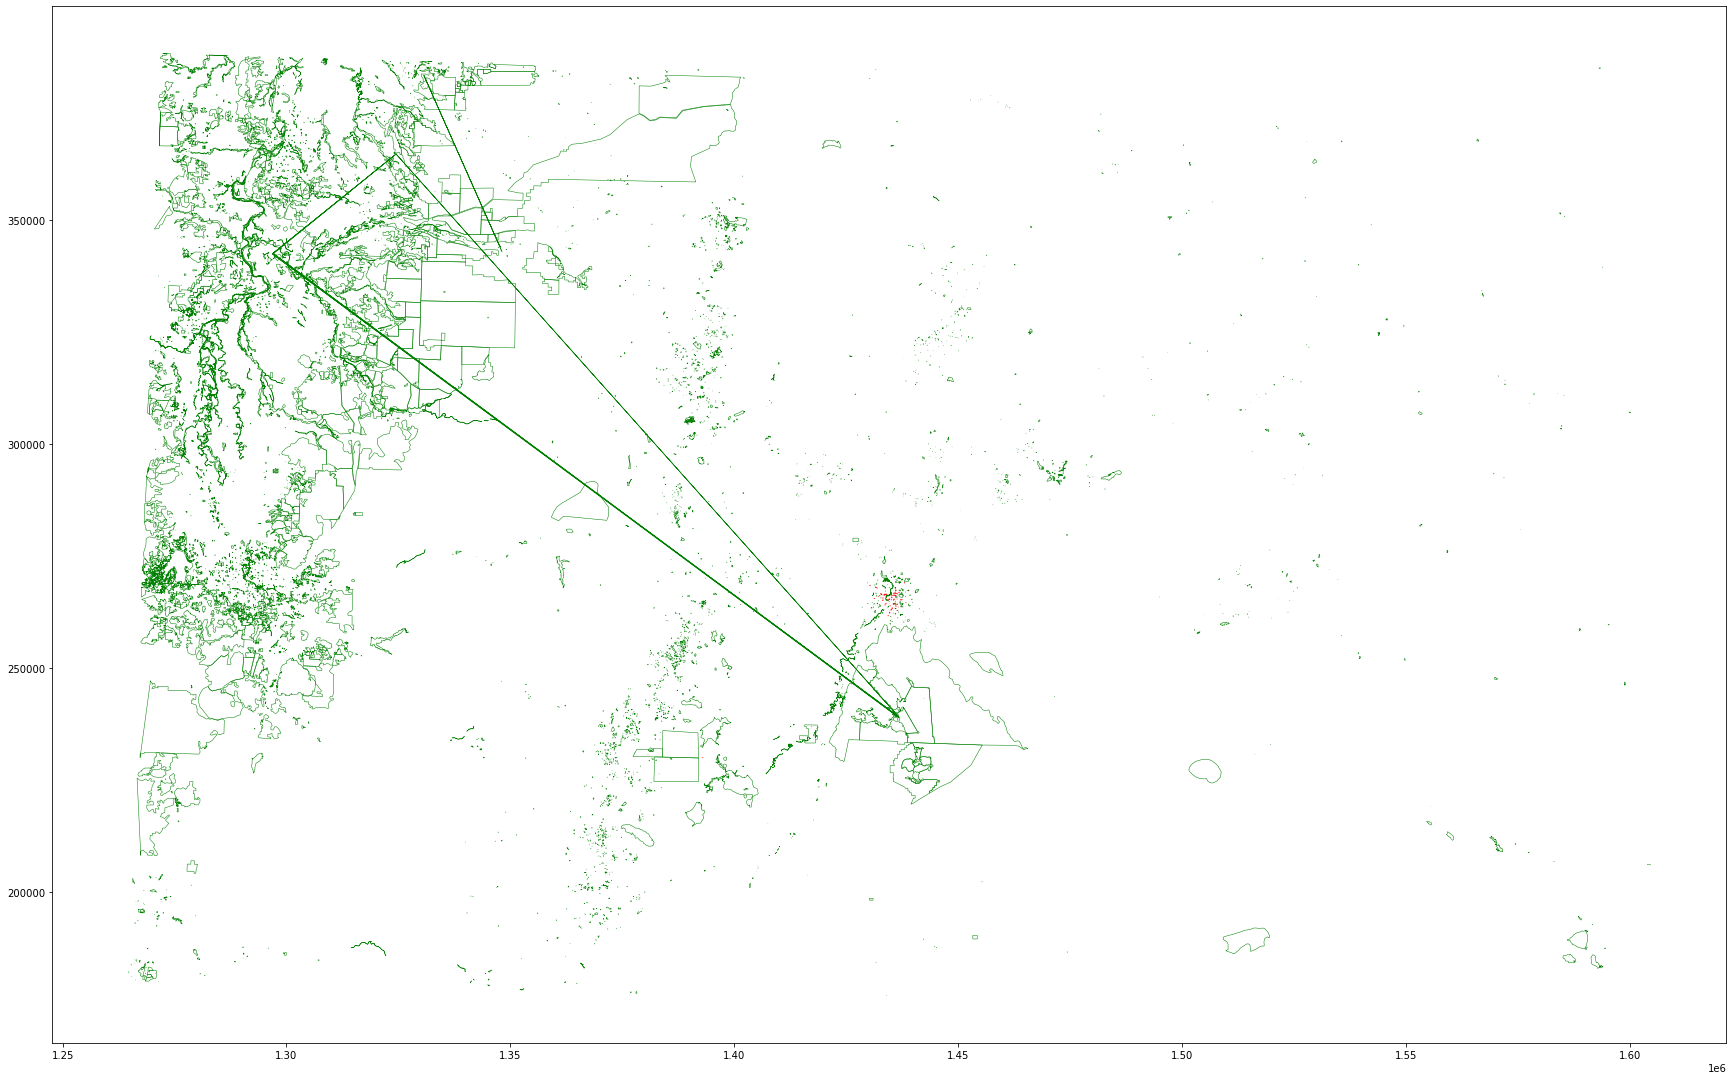

In [595]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [596]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  \
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...   
1  POLYGON ((1290529.862 270244.069, 1290536.901 ...   
2  POLYGON ((1290505.755 270524.092, 1290500.193 ...   
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...   
4  POLYGON ((1305349.877 372106.996, 1305294.417 ...   

                                           geometry2  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
2  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305345.602 ...

In [597]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                           geometry2  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
2  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305345.602 ...

In [598]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
2  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305345.602 ...

In [599]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name   type  \
0      24445541             None  water   
371   142063140      Mirror Pond  water   
372   142063146  Deschutes River  water   
1440  276799861   Brandis Square   park   
1441  276799863      Brooks Park   park   
1443  276799865    Columbia Park   park   
1447  276799869       Drake Park   park   
1451  276799873    Genna Stadium   park   
1453  276799875      Harmon Park   park   
1466  276799888       McKay Park   park   

                                               geometry  
0     MULTIPOLYGON (((1435467.954 268268.724, 143542...  
371   MULTIPOLYGON (((1434627.145 266288.990, 143463...  
372   MULTIPOLYGON (((1435083.783 266682.235, 143507...  
1440  POLYGON ((1434842.086 266232.328, 1434835.426 ...  
1441  POLYGON ((1434667.919 266361.866, 1434672.987 ...  
1443  POLYGON ((1433879.251 265361.185, 1433818.296 ...  
1447  MULTIPOLYGON (((1434398.702 266151.086, 143440...  
1451  MULTIPOLYGON (((1435973.511 264416.562, 143597...  
1453  POLYGON ((1434138.953 266259.995, 1434167.465 ...  
1466  POLYGON ((1434188.234 265085.926, 1434203.454 ...

In [600]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
1  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
2  S020BEN      DrakePark Foot Bridge  short-term  2019   Bend   
3  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
4  S020BEN      DrakePark Foot Bridge  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
1             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
2             3.0  343.567549   2.643836   0.945205    407.0  44.060052   
3             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
4             3.0  343.567549   2.643836   0.945205    407.0  44.060052   

    longitude comment  osm_id_sensor buff_dist  buffer_area     osm_id  \
0 -121.324270     NaN     49105950.0       0.1     0.022462  142063140   
1 -121.314923     NaN     46094523.0       0.1     0.025971  142063140   
2 -121.320745     NaN     39857665.0       0.1     0.022133  142063140   
3 -121.324270     NaN     49105950.0       0.1     0.022462  276799869   
4 -121.320745     NaN     39857665.0       0.1     0.022133  276799869   

          name   type                                           geometry  
0  Mirror Pond  water  POLYGON ((1433900.885 265755.161, 1433902.571 ...  
1  Mirror Pond  water  POLYGON ((1434692.839 266283.793, 1434690.420 ...  
2  Mirror Pond  water  MULTIPOLYGON (((1434395.208 266152.924, 143439...  
3   Drake Park   park  POLYGON ((1434010.229 265879.892, 1434013.268 ...  
4   Drake Park   park  POLYGON ((1434170.861 266061.236, 1434169.618 ...

In [601]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
1  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
2  S020BEN      DrakePark Foot Bridge  short-term  2019   Bend   
3  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
4  S020BEN      DrakePark Foot Bridge  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             3.0  127.953968  13.726027   4.369863   3128.0  ... -121.324270   
1             1.0  109.378321   7.027397   2.178082   1998.0  ... -121.314923   
2             3.0  343.567549   2.643836   0.945205    407.0  ... -121.320745   
3             3.0  127.953968  13.726027   4.369863   3128.0  ... -121.324270   
4             3.0  343.567549   2.643836   0.945205    407.0  ... -121.320745   

   comment osm_id_sensor  buff_dist buffer_area     osm_id         name  \
0      NaN    49105950.0        0.1    0.022462  142063140  Mirror Pond   
1      NaN    46094523.0        0.1    0.025971  142063140  Mirror Pond   
2      NaN    39857665.0        0.1    0.022133  142063140  Mirror Pond   
3      NaN    49105950.0        0.1    0.022462  276799869   Drake Park   
4      NaN    39857665.0        0.1    0.022133  276799869   Drake Park   

    type                                           geometry           Area  
0  water  POLYGON ((1433900.885 265755.161, 1433902.571 ...   60752.594060  
1  water  POLYGON ((1434692.839 266283.793, 1434690.420 ...  113388.403683  
2  water  MULTIPOLYGON (((1434395.208 266152.924, 143439...   96733.350228  
3   park  POLYGON ((1434010.229 265879.892, 1434013.268 ...   34991.744347  
4   park  POLYGON ((1434170.861 266061.236, 1434169.618 ...  255942.614905  

[5 rows x 21 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

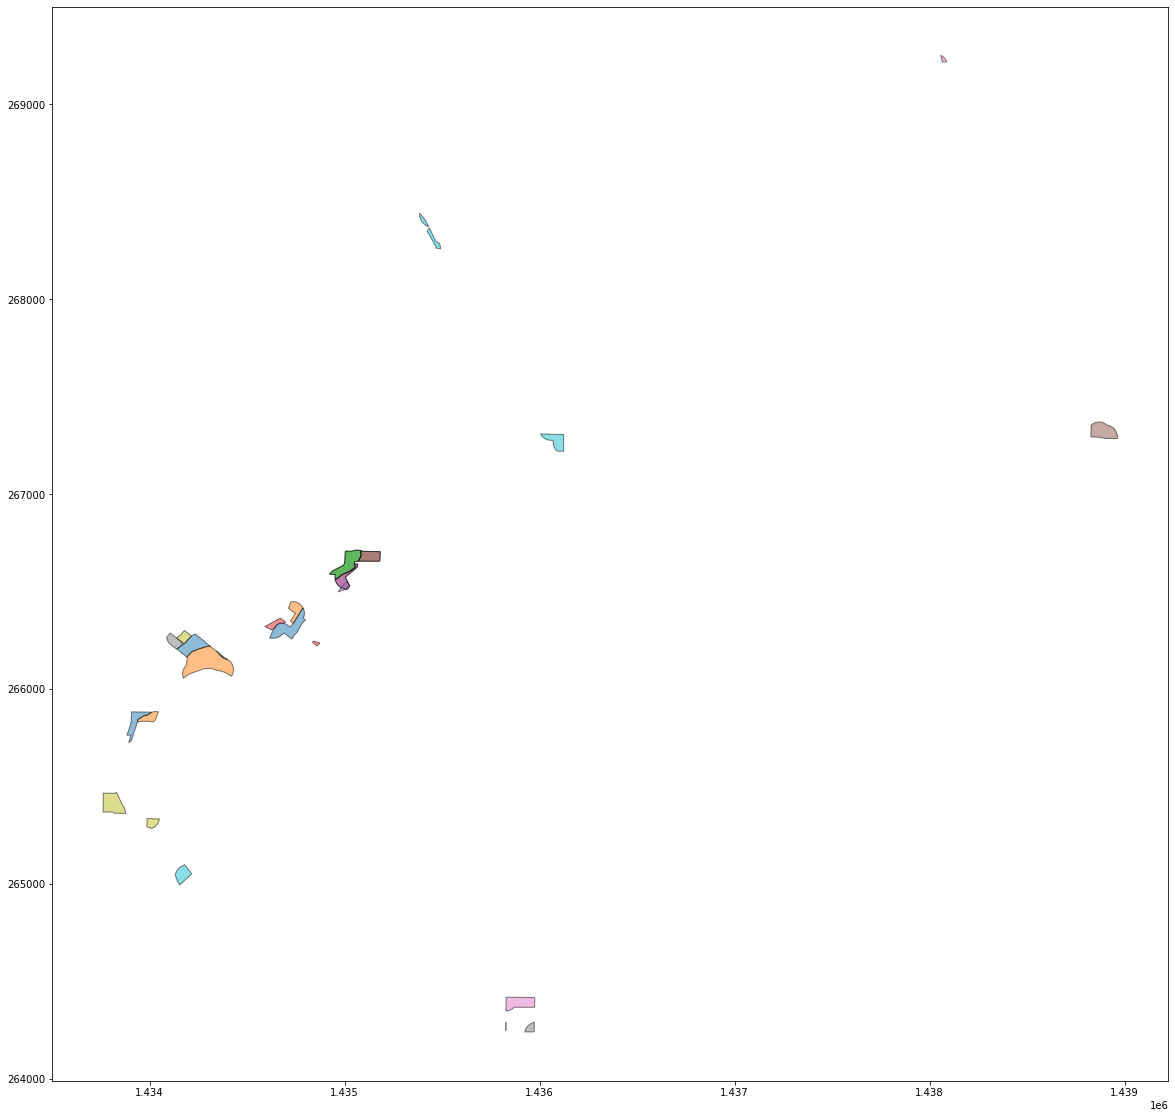

In [602]:
inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

In [603]:
output_nature=inter_nature.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_nature.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   type           Area
0      5372768.0   park   96924.563985
1      5373770.0   park   18021.746050
2      5377057.0   park   63327.828456
3     39857665.0   park  320590.529520
4     39857665.0  water   96733.350228

In [604]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_park.columns=['osm_id',"Park Area"]
output_park.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Park Area
0   5372768.0   96924.563985
1   5373770.0   18021.746050
2   5377057.0   63327.828456
3  39857665.0  320590.529520
4  46094520.0  100631.100455

In [605]:
# Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_water.columns=['osm_id',"Water Area"]
output_water.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Water Area
0  39857665.0   96733.350228
1  46094520.0  103498.896866
2  46094521.0  103498.896866
3  46094523.0  157066.425262
4  49105950.0   60752.594060

In [606]:
# Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_forest.columns=['osm_id',"Forest Area"]
output_forest.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, Forest Area]
Index: []

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [607]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp            name            type  \
0  34704797      None   Potamus Point       viewpoint   
1  35395767      None            None         parking   
2  36172933      None            None  level_crossing   
3  36177686      None  South Junction        junction   
4  36178950      None            None  turning_circle   

                      geometry  
0  POINT (-119.22804 45.01644)  
1  POINT (-120.86394 43.52037)  
2  POINT (-121.07508 44.85428)  
3  POINT (-121.07505 44.85513)  
4  POINT (-121.35164 44.98097)

In [608]:
# set the co-ordinate system first
#pts = pts.set_crs("EPSG:4326")
# Let's take a copy of our layer
pts_proj = pts.copy()

# Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=2839)
pts_proj.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp            name            type  \
0  34704797      None   Potamus Point       viewpoint   
1  35395767      None            None         parking   
2  36172933      None            None  level_crossing   
3  36177686      None  South Junction        junction   
4  36178950      None            None  turning_circle   
5  36213990      None            None  level_crossing   
6  36225895      None            None  turning_circle   
7  36615420      None            None  turning_circle   
8  36756013      None            None  turning_circle   
9  36757062      None            None  turning_circle   

                         geometry  
0  POINT (1600300.449 372934.141)  
1  POINT (1470579.071 205978.691)  
2  POINT (1454528.255 354301.624)  
3  POINT (1454531.127 354395.096)  
4  POINT (1432804.205 368570.488)  
5  POINT (1454457.235 360725.276)  
6  POINT (1446044.259 352282.041)  
7  POINT (1578525.703 349436.989)  
8  POINT (1290526.963 335560.392)  
9  POINT (1294027.540 335141.746)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

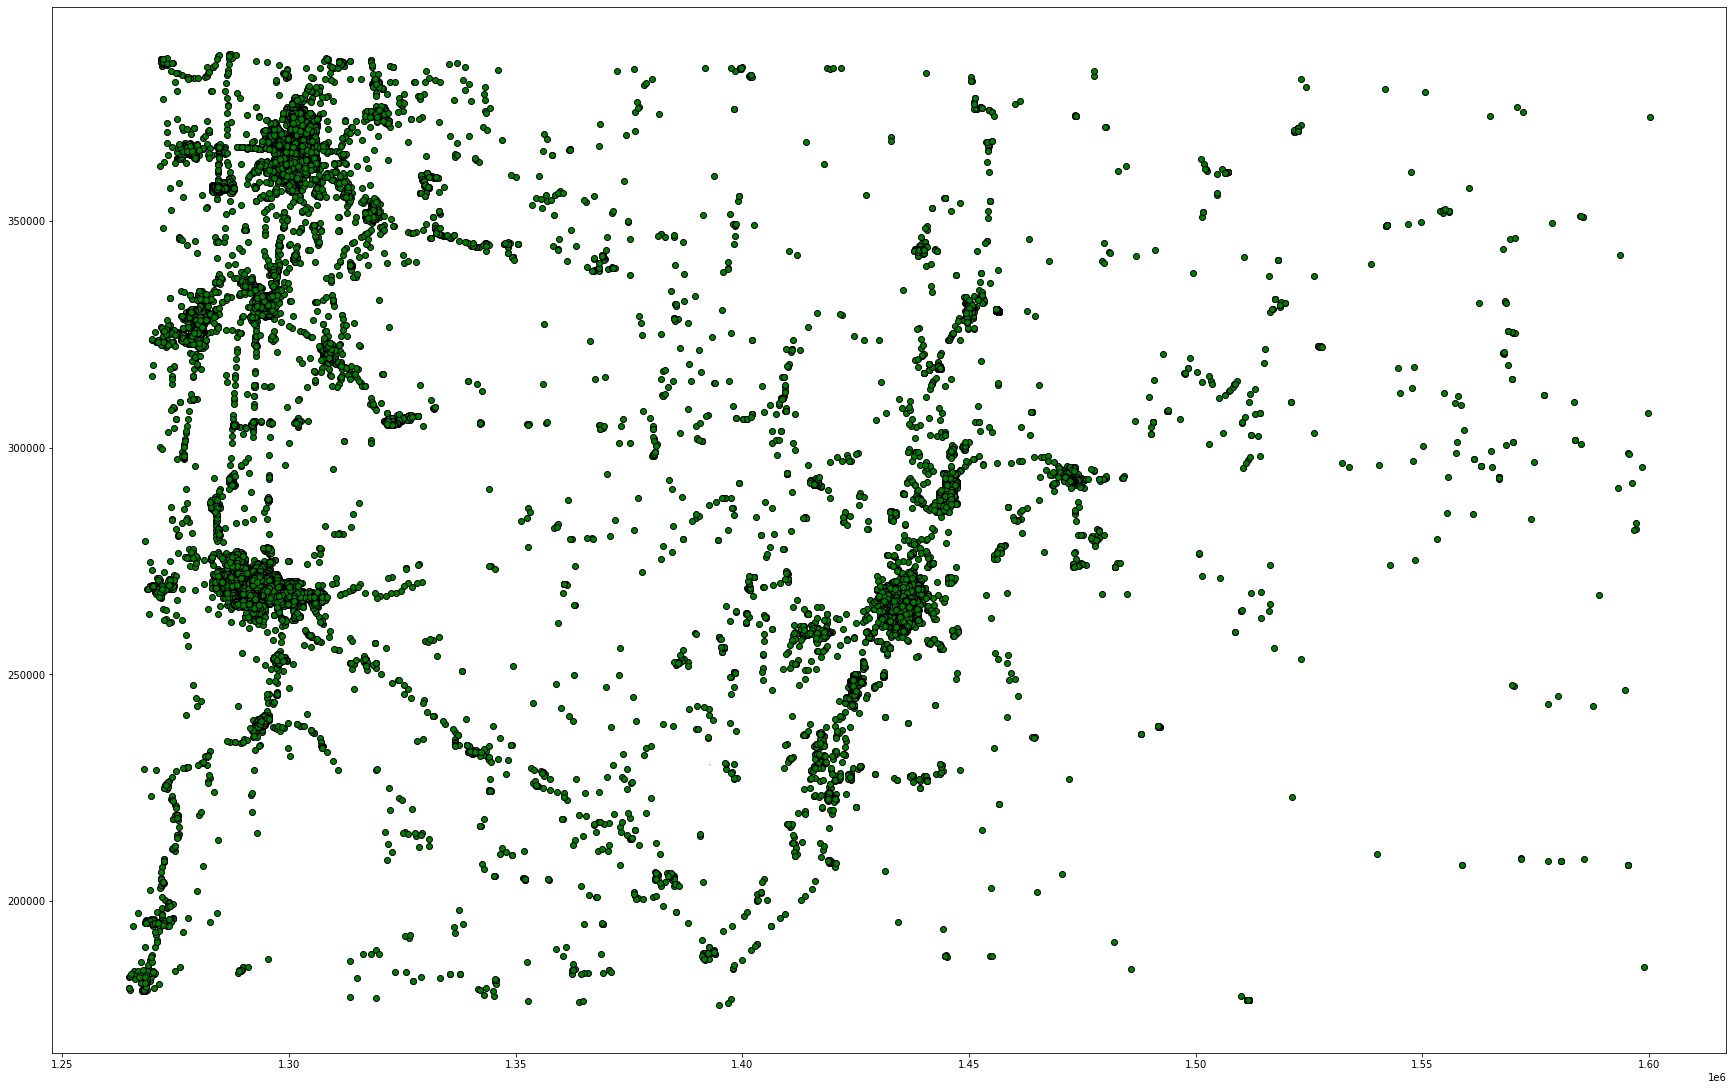

In [609]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [610]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp  name             type  \
668   38473143      None  None         crossing   
707   38477445      None  None  traffic_signals   
714   38477818      None  None  traffic_signals   
741   38481535      None  None  traffic_signals   
873   38501255      None  None   turning_circle   
880   38502994      None  None   level_crossing   
936   38506945      None  None  traffic_signals   
937   38506956      None  None  traffic_signals   
973   38509888      None  None  traffic_signals   
1095  38526929      None  None  traffic_signals   

                            geometry  
668   POINT (1433930.630 266494.940)  
707   POINT (1434477.298 265242.877)  
714   POINT (1435177.995 263133.481)  
741   POINT (1434568.265 265334.741)  
873   POINT (1436146.325 264072.801)  
880   POINT (1436751.752 263607.314)  
936   POINT (1435697.957 266173.612)  
937   POINT (1435701.682 266731.212)  
973   POINT (1435539.347 268319.020)  
1095  POINT (1435191.847 266644.098)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


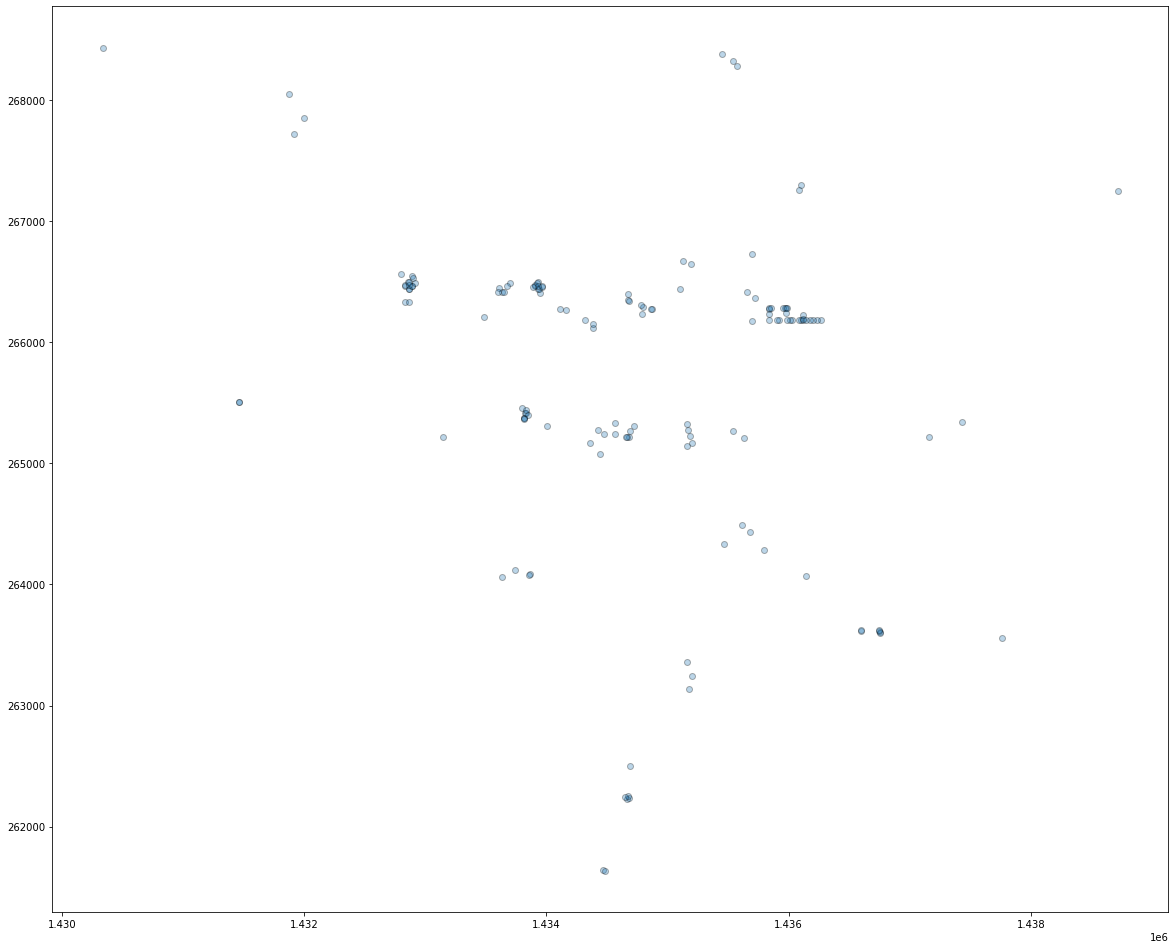

In [611]:
ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [612]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                site_name sensor_type  year region  travel_pattern  \
0  P001BEN            Colorado Ave.   permanent  2019   Bend             2.0   
1  P001BEN            Colorado Ave.   permanent  2019   Bend             2.0   
2  P001BEN            Colorado Ave.   permanent  2019   Bend             2.0   
3  P001BEN            Colorado Ave.   permanent  2019   Bend             2.0   
4  P004BEN  Newport Ave. Both Sides   permanent  2019   Bend             1.0   

        AADBT   stv_adb  stv_c_adb  stl_raw  ...   longitude  comment  \
0   46.209524  6.561644   2.616438   3189.0  ... -121.319863      NaN   
1   46.209524  6.561644   2.616438   3189.0  ... -121.319863      NaN   
2   46.209524  6.561644   2.616438   3189.0  ... -121.319863      NaN   
3   46.209524  6.561644   2.616438   3189.0  ... -121.319863      NaN   
4  109.378321  7.027397   2.178082   1998.0  ... -121.314923      NaN   

  osm_id_sensor  buff_dist buffer_area      osm_id  timestamp  \
0    48381206.0        0.1    0.027829    38477445       None   
1    48381206.0        0.1    0.027829    38530243       None   
2    48381206.0        0.1    0.027829   698664452       None   
3    48381206.0        0.1    0.027829  -748379224       None   
4    46094523.0        0.1    0.025971 -2035242511       None   

                 name             type                        geometry  
0                None  traffic_signals  POINT (1434477.298 265242.877)  
1                None  traffic_signals  POINT (1434361.173 265168.361)  
2      Falling Waters          doctors  POINT (1434425.815 265271.582)  
3  Monkless Brasserie              pub  POINT (1434440.045 265077.672)  
4          Jinsei Spa              spa  POINT (1434674.012 266397.643)  

[5 rows x 21 columns]

# Calculate the bicycle parking

In [613]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id            site_name sensor_type  year region  travel_pattern  \
57  S021BEN  Gilcrest Footbridge  short-term  2019   Bend             3.0   

       AADBT   stv_adb  stv_c_adb  stl_raw  ...   longitude  comment  \
57  152.6533  2.273973   0.835616    295.0  ... -121.324818      NaN   

   osm_id_sensor  buff_dist buffer_area      osm_id  timestamp  name  \
57   142063142.0        0.1    0.024839 -1377061704       None  None   

               type                        geometry  
57  bicycle_parking  POINT (1433826.981 265416.982)  

[1 rows x 21 columns]

In [614]:
output_bparking=b_parking.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bparking.columns=["osm_id","Bicycle Parking"]
output_bparking.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bicycle Parking
0  142063142.0                1

# Calculate bus stops

In [615]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [site_id, site_name, sensor_type, year, region, travel_pattern, AADBT, stv_adb, stv_c_adb, stl_raw, latitude, longitude, comment, osm_id_sensor, buff_dist, buffer_area, osm_id, timestamp, name, type, geometry]
Index: []

[0 rows x 21 columns]

In [616]:
output_bstop=transit_stops.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bstop.columns=["osm_id","Bus Stops"]
output_bstop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, Bus Stops]
Index: []

# Calculate school/college/university

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


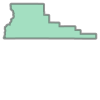

In [617]:
#sc= inter_pts[inter_pts['type'].str.contains('school|college')]
#sc
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [618]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
#scl[['amenity', 'name', 'geometry']]

In [619]:
# set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# Let's take a copy of our layer
scl_proj = scl.copy()

# Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=2839)
scl_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type  \
0   way/356390630  356390630          way   
1   way/714627403  714627403          way   
2  node/357357671  357357671         node   
3    way/99727280   99727280          way   
4   way/418654037  418654037          way   

                                               nodes amenity  \
0  [3618614167, 3618614169, 3618614168, 361861416...  school   
1  [6717513175, 3615249200, 6717513174, 671751317...  school   
2                                                NaN  school   
3  [1152930149, 1152930304, 1152930161, 115293029...  school   
4  [4190210317, 4190210318, 4190210319, 419021032...  school   

                                            geometry  \
0  POLYGON ((1418519.112 224247.899, 1418937.185 ...   
1  POLYGON ((1420273.175 226731.354, 1420269.287 ...   
2                     POINT (1416857.100 292037.439)   
3  POLYGON ((1414269.123 292759.424, 1414046.450 ...   
4  POLYGON ((1414438.295 292254.740, 1414438.922 ...   

                        name  \
0                        NaN   
1  Rosland Elementary School   
2  Sisters Elementary School   
3        Sisters High School   
4      Sisters Middle School   

                                             website addr:state  ele  ...  \
0                                                NaN        NaN  NaN  ...   
1  https://www.bend.k12.or.us/education/school/sc...        NaN  NaN  ...   
2                                                NaN         OR  968  ...   
3                                                NaN        NaN  982  ...   
4                                                NaN         OR  979  ...   

  opening_hours phone area  fax operator landuse grades operator:type  \
0           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   
1           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   
2           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   
3           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   
4           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   

  religion email  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN  
3      NaN   NaN  
4      NaN   NaN  

[5 rows x 36 columns]

In [620]:
scl_proj['geometry']=scl_proj['geometry'].centroid
scl_proj.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type  \
0   way/356390630  356390630          way   
1   way/714627403  714627403          way   
2  node/357357671  357357671         node   
3    way/99727280   99727280          way   
4   way/418654037  418654037          way   

                                               nodes amenity  \
0  [3618614167, 3618614169, 3618614168, 361861416...  school   
1  [6717513175, 3615249200, 6717513174, 671751317...  school   
2                                                NaN  school   
3  [1152930149, 1152930304, 1152930161, 115293029...  school   
4  [4190210317, 4190210318, 4190210319, 419021032...  school   

                         geometry                       name  \
0  POINT (1418738.835 223906.261)                        NaN   
1  POINT (1420398.661 226583.505)  Rosland Elementary School   
2  POINT (1416857.100 292037.439)  Sisters Elementary School   
3  POINT (1414112.408 292627.806)        Sisters High School   
4  POINT (1414491.710 292286.441)      Sisters Middle School   

                                             website addr:state  ele  ...  \
0                                                NaN        NaN  NaN  ...   
1  https://www.bend.k12.or.us/education/school/sc...        NaN  NaN  ...   
2                                                NaN         OR  968  ...   
3                                                NaN        NaN  982  ...   
4                                                NaN         OR  979  ...   

  opening_hours phone area  fax operator landuse grades operator:type  \
0           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   
1           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   
2           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   
3           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   
4           NaN   NaN  NaN  NaN      NaN     NaN    NaN           NaN   

  religion email  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN  
3      NaN   NaN  
4      NaN   NaN  

[5 rows x 36 columns]

In [621]:
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  S015BEN                         Newport and 9th Street RAB  short-term   
1  S050BEN  9thStreetatBendHighEastEntranceBetweenEmersona...  short-term   

   year region  travel_pattern      AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  2019   Bend             3.0  33.092525  12.986301   3.260274    596.0  ...   
1  2019   Bend             2.0  29.726209   2.246575   1.191781    857.0  ...   

             phone  area              fax              operator landuse  \
0  +1-541-355-1900   NaN  +1-541-355-1910  Bend-La Pine Schools     NaN   
1              NaN   NaN              NaN                   NaN     NaN   

   grades operator:type  religion email                        geometry  
0     NaN           NaN       NaN   NaN  POINT (1434079.512 266408.400)  
1     NaN           NaN       NaN   NaN  POINT (1436280.880 265402.615)  

[2 rows x 52 columns]

In [622]:
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
output_school=inter_scl.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_school.columns=["osm_id","School"]
output_school.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  School
0    5377140.0       1
1  186561286.0       1

# Closest distance to school

In [623]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [624]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_school"]]
output_school_distance.columns=["osm_id","min_dist_to_school"]
output_school_distance=output_school_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_school_distance.head()

osm_id  min_dist_to_school
0   48381206.0         1836.231483
7    5369877.0         1839.981365
14  49105950.0         1671.767045
21  46094523.0         2062.855533
28  46094520.0         2917.732762

In [625]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# Let's take a copy of our layer
coll_proj = coll.copy()

# Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=2839)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [626]:
output_college=inter_coll.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_college.columns=["osm_id","college"]
output_college.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osm_id, college]
Index: []

# Closest distance to college

In [627]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_college"]]
output_college_distance.columns=["osm_id","min_dist_to_college"]
output_college_distance=output_college_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_college_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_college
0   48381206.0         10520.590150
7    5369877.0         11794.261428
14  49105950.0          8150.297244
21  46094523.0          9487.250630
28  46094520.0         10342.951024

In [628]:
# Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# Let's take a copy of our layer
uni_proj = uni.copy()

# Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=2839)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [629]:
output_university=inter_uni.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["osm_id","University"]
output_university.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  University
0  239383101.0           1

In [630]:
#scu=pd.concat([sc,u],axis=0)
#scu

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Closest distance to university

In [631]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_university"]]
output_university_distance.columns=["osm_id","min_dist_to_university"]
output_university_distance=output_university_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_university_distance.head()

osm_id  min_dist_to_university
0   48381206.0             2387.326197
7    5369877.0             5773.809117
14  49105950.0             4506.877508
21  46094523.0             6656.861545
28  46094520.0             8005.030293

# Calculate OSM_node_density

In [632]:
# lets bring the road shape file node to calculate the intersection density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [633]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
from shapely.geometry.multipolygon import MultiPolygon
from shapely import wkt


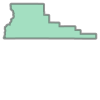

In [634]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon


In [635]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(log_file=True,log_console=True,use_cache=True)
#place="Portland,USA"
#Construct the street network
G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [636]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head(5)

y           x  street_count  ref highway  \
osmid                                                        
38177652  43.713255 -121.795495             2  NaN     NaN   
38177653  43.715197 -121.795568             2  NaN     NaN   
38177656  43.716527 -121.795625             2  NaN     NaN   
38177660  43.717124 -121.795647             2  NaN     NaN   
38177665  43.723374 -121.795905             2  NaN     NaN   

                             geometry  
osmid                                  
38177652  POINT (-121.79549 43.71325)  
38177653  POINT (-121.79557 43.71520)  
38177656  POINT (-121.79563 43.71653)  
38177660  POINT (-121.79565 43.71712)  
38177665  POINT (-121.79591 43.72337)

In [637]:
# set the co-ordinate system first
node = nodes.set_crs("EPSG:4326")
# Let's take a copy of our layer
node_proj = node.copy()

# Reproject the geometries by replacing the values with projected ones
node_proj = node_proj.to_crs(epsg=2839)
node_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count  ref highway  \
osmid                                                        
38177652  43.713255 -121.795495             2  NaN     NaN   
38177653  43.715197 -121.795568             2  NaN     NaN   
38177656  43.716527 -121.795625             2  NaN     NaN   
38177660  43.717124 -121.795647             2  NaN     NaN   
38177665  43.723374 -121.795905             2  NaN     NaN   

                                geometry  
osmid                                     
38177652  POINT (1395605.758 228151.446)  
38177653  POINT (1395603.223 228367.323)  
38177656  POINT (1395600.875 228515.129)  
38177660  POINT (1395600.104 228581.453)  
38177665  POINT (1395590.061 229276.090)

In [638]:
# Clip the data using GeoPandas clip
buffer_clip_node = gpd.clip(node_proj, gdf1)
buffer_clip_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count  ref highway  \
osmid                                                        
38198880  43.981380 -121.809118             3  NaN     NaN   
38198973  43.980951 -121.807946             2  NaN     NaN   
38198976  43.980676 -121.807189             2  NaN     NaN   
38281980  43.980099 -121.809614             2  NaN     NaN   
38465704  43.729320 -121.827384             2  NaN     NaN   

                                geometry  
osmid                                     
38198880  POINT (1394973.677 257954.992)  
38198973  POINT (1395066.921 257905.962)  
38198976  POINT (1395127.212 257874.461)  
38281980  POINT (1394931.671 257813.398)  
38465704  POINT (1393064.502 229976.266)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


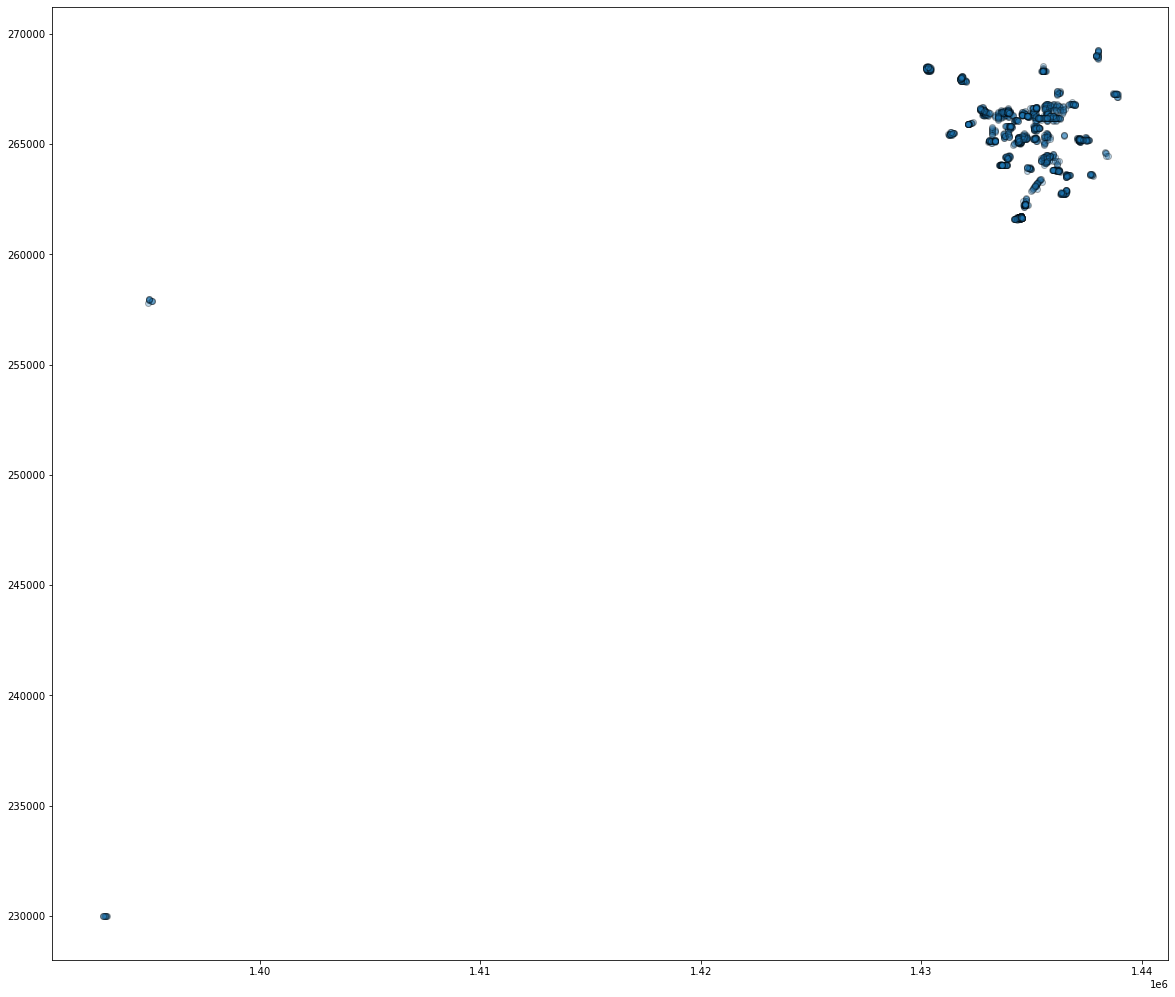

In [639]:
ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [640]:
 inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
 inter_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id      site_name sensor_type  year region  travel_pattern      AADBT  \
0  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
1  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
2  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
3  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
4  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   

    stv_adb  stv_c_adb  stl_raw  ...  comment  osm_id_sensor buff_dist  \
0  6.561644   2.616438   3189.0  ...      NaN     48381206.0       0.1   
1  6.561644   2.616438   3189.0  ...      NaN     48381206.0       0.1   
2  6.561644   2.616438   3189.0  ...      NaN     48381206.0       0.1   
3  6.561644   2.616438   3189.0  ...      NaN     48381206.0       0.1   
4  6.561644   2.616438   3189.0  ...      NaN     48381206.0       0.1   

   buffer_area          y           x  street_count  ref          highway  \
0     0.027829  44.051489 -121.317623             4  NaN  traffic_signals   
1     0.027829  44.052290 -121.317893             2  NaN              NaN   
2     0.027829  44.051343 -121.318806             3  NaN              NaN   
3     0.027829  44.050528 -121.318476             3  NaN              NaN   
4     0.027829  44.050794 -121.319062             3  NaN  traffic_signals   

                         geometry  
0  POINT (1434479.593 265244.054)  
1  POINT (1434458.794 265333.220)  
2  POINT (1434384.579 265228.703)  
3  POINT (1434410.154 265137.868)  
4  POINT (1434363.525 265167.927)  

[5 rows x 22 columns]

In [641]:
output_intersection_density= inter_node.groupby(by=['osm_id_sensor'])['geometry'].count()
output_intersection_density12=output_intersection_density.reset_index()
output_intersection_density12

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  geometry
0       5369529.0        40
1       5369733.0        40
2       5369877.0        41
3       5371320.0        36
4       5372140.0        89
5       5372611.0         8
6       5372768.0        17
7       5372797.0        21
8       5372909.0        31
9       5373510.0         6
10      5373770.0         6
11      5375454.0        30
12      5376261.0        14
13      5376418.0        39
14      5376895.0        20
15      5377057.0        27
16      5377140.0         3
17      5377556.0       166
18      5378693.0         5
19     39857665.0        16
20     46094520.0        29
21     46094521.0        29
22     46094523.0        42
23     47346890.0        61
24     47636835.0        22
25     48332546.0        14
26     48332549.0        57
27     48381198.0        25
28     48381206.0        88
29     48381210.0        22
30     49105950.0        30
31     90955476.0        23
32    135232314.0        61
33    135232327.0        58
34    142063142.0        19
35    143486914.0        41
36    186561286.0        88
37    205976639.0         8
38    239383101.0        24
39    266268202.0        18
40    276823353.0        50
41    277179269.0        20
42    317726062.0        64
43    318903452.0        24
44    360457476.0        11
45    360461903.0        18
46    365159255.0        23
47    365226874.0        12
48    369186255.0       199
49    432213408.0         6
50    435543651.0        10
51    435543658.0        32
52    438346301.0        15

In [642]:
b_area=gdf1.loc[:,['osm_id_sensor','buffer_area']]
b_area

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffer_area
6       48381206.0     0.027829
13       5369877.0     0.030584
20      49105950.0     0.022462
27      46094523.0     0.025971
34      46094520.0     0.020198
41       5372768.0     0.020569
48      47346890.0     0.021811
55     360457476.0     0.023807
62       5372909.0     0.023429
69       5376261.0     0.026346
76       5378693.0     0.015099
83      47636835.0     0.022464
90     435543651.0     0.009603
97      48332546.0     0.026908
104    186561286.0     0.033945
111     48381198.0     0.030809
118      5372797.0     0.032794
125    266268202.0     0.011991
132     39857665.0     0.022133
139    142063142.0     0.024839
146      5372140.0     0.038157
153    318903452.0     0.017040
160    143486914.0     0.035969
167            NaN     0.011326
174      5376418.0     0.030590
181      5372140.0     0.034319
188     90955476.0     0.022444
195    360461903.0     0.020830
209    369186255.0     0.020855
216    317726062.0     0.031633
223    317726062.0     0.033648
230    317726062.0     0.032527
237    438346301.0     0.017494
244     48332549.0     0.018803
251    435543658.0     0.023875
258      5371320.0     0.023271
265    432213408.0     0.013746
272      5377140.0     0.013027
279      5377057.0     0.026708
293    276823353.0     0.021507
300      5369529.0     0.027437
307    365159255.0     0.018664
314    239383101.0     0.022404
328     48381210.0     0.028507
342    205976639.0     0.024387
349      5373510.0     0.010652
356      5372611.0     0.015644
363      5375454.0     0.026152
370    277179269.0     0.023224
377    365226874.0     0.022059
384      5377556.0     0.029745
391    135232327.0     0.025450
398    135232314.0     0.027007
405      5377556.0     0.029799
412      5376895.0     0.029768
419      5377556.0     0.028250
426      5369733.0     0.033515
433      5373770.0     0.022723
440      5377057.0     0.021192
447     46094521.0     0.020198

In [643]:
output_intersection_density1=pd.merge(output_intersection_density12,b_area,left_on="osm_id_sensor",right_on='osm_id_sensor',how="inner")
output_intersection_density1["Intersection Density"]=output_intersection_density1["geometry"]/output_intersection_density1["buffer_area"]
output_intersection_density1=output_intersection_density1.loc[:,['osm_id_sensor','Intersection Density']]
output_intersection_density1.columns=['osm_id','OSM_node_Density']
output_intersection_density1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  OSM_node_Density
0  5369529.0       1457.889563
1  5369733.0       1193.507511
2  5369877.0       1340.585207
3  5371320.0       1546.982616
4  5372140.0       2332.438506

# Calculate actual intersection density

In [644]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [645]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=2839)
nodea_proj.head(5)

y           x  street_count  ref highway  \
osmid                                                        
38177687  43.686839 -121.829993             3  NaN     NaN   
38192040  43.660490 -121.503095             3  NaN     NaN   
38192055  43.665878 -121.507422             3  NaN     NaN   
38193553  43.682764 -121.567242             3  NaN     NaN   
38193564  43.682121 -121.571113             3  NaN     NaN   

                                geometry  
osmid                                     
38177687  POINT (1392779.394 225260.612)  
38192040  POINT (1419096.823 221966.406)  
38192055  POINT (1418755.038 222569.092)  
38193553  POINT (1413954.825 224504.750)  
38193564  POINT (1413641.862 224437.315)

In [646]:
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
output_intersection_densitya= inter_nodea.groupby(by=['osm_id_sensor'])['geometry'].count()
output_intersection_density12a=output_intersection_densitya.reset_index()
output_intersection_density1a=pd.merge(output_intersection_density12a,b_area,left_on="osm_id_sensor",right_on='osm_id_sensor',how="inner")
output_intersection_density1a["Intersection Density"]=output_intersection_density1a["geometry"]/output_intersection_density1a["buffer_area"]
output_intersection_density1a=output_intersection_density1a.loc[:,['osm_id_sensor','Intersection Density']]
output_intersection_density1a.columns=['osm_id','Actual_Intersection_Density']
output_intersection_density1a.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Actual_Intersection_Density
0  5369529.0                   145.788956
1  5369733.0                   208.863814
2  5369877.0                   326.972002
3  5371320.0                   343.773915
4  5372140.0                   471.729136

# Calculate the Number of Lanes

In [647]:
edges.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      ref       highway  oneway   length  \
u        v          key                                                      
38177652 38177653   0    364437102  NF 4280  unclassified   False  216.076   
         3684843695 0    364437102  NF 4280  unclassified   False   55.844   
38177653 38177656   0    364437102  NF 4280  unclassified   False  147.951   
         38177652   0    364437102  NF 4280  unclassified   False  216.076   
38177656 38177660   0    364437102  NF 4280  unclassified   False   66.385   
         38177653   0    364437102  NF 4280  unclassified   False  147.951   
38177660 38177665   0    364437102  NF 4280  unclassified   False  695.301   
         38177656   0    364437102  NF 4280  unclassified   False   66.385   
38177665 38177671   0    364437102  NF 4280  unclassified   False  268.048   
         38177660   0    364437102  NF 4280  unclassified   False  695.301   

                        lanes name maxspeed access bridge junction  \
u        v          key                                              
38177652 38177653   0     NaN  NaN      NaN    NaN    NaN      NaN   
         3684843695 0     NaN  NaN      NaN    NaN    NaN      NaN   
38177653 38177656   0     NaN  NaN      NaN    NaN    NaN      NaN   
         38177652   0     NaN  NaN      NaN    NaN    NaN      NaN   
38177656 38177660   0     NaN  NaN      NaN    NaN    NaN      NaN   
         38177653   0     NaN  NaN      NaN    NaN    NaN      NaN   
38177660 38177665   0     NaN  NaN      NaN    NaN    NaN      NaN   
         38177656   0     NaN  NaN      NaN    NaN    NaN      NaN   
38177665 38177671   0     NaN  NaN      NaN    NaN    NaN      NaN   
         38177660   0     NaN  NaN      NaN    NaN    NaN      NaN   

                                                                  geometry  
u        v          key                                                     
38177652 38177653   0    LINESTRING (-121.79549 43.71325, -121.79557 43...  
         3684843695 0    LINESTRING (-121.79549 43.71325, -121.79549 43...  
38177653 38177656   0    LINESTRING (-121.79557 43.71520, -121.79563 43...  
         38177652   0    LINESTRING (-121.79557 43.71520, -121.79549 43...  
38177656 38177660   0    LINESTRING (-121.79563 43.71653, -121.79565 43...  
         38177653   0    LINESTRING (-121.79563 43.71653, -121.79557 43...  
38177660 38177665   0    LINESTRING (-121.79565 43.71712, -121.79591 43...  
         38177656   0    LINESTRING (-121.79565 43.71712, -121.79563 43...  
38177665 38177671   0    LINESTRING (-121.79591 43.72337, -121.79603 43...  
         38177660   0    LINESTRING (-121.79591 43.72337, -121.79565 43...

In [648]:
print(edges.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [649]:
# set the co-ordinate system first
edge = edges.set_crs("EPSG:4326")
# Let's take a copy of our layer
edge_proj = edge.copy()

# Reproject the geometries by replacing the values with projected ones
edge_proj = edge_proj.to_crs(epsg=2839)
edge_proj.head(5)

osmid      ref       highway  oneway   length  \
u        v          key                                                      
38177652 38177653   0    364437102  NF 4280  unclassified   False  216.076   
         3684843695 0    364437102  NF 4280  unclassified   False   55.844   
38177653 38177656   0    364437102  NF 4280  unclassified   False  147.951   
         38177652   0    364437102  NF 4280  unclassified   False  216.076   
38177656 38177660   0    364437102  NF 4280  unclassified   False   66.385   

                        lanes name maxspeed access bridge junction  \
u        v          key                                              
38177652 38177653   0     NaN  NaN      NaN    NaN    NaN      NaN   
         3684843695 0     NaN  NaN      NaN    NaN    NaN      NaN   
38177653 38177656   0     NaN  NaN      NaN    NaN    NaN      NaN   
         38177652   0     NaN  NaN      NaN    NaN    NaN      NaN   
38177656 38177660   0     NaN  NaN      NaN    NaN    NaN      NaN   

                                                                  geometry  
u        v          key                                                     
38177652 38177653   0    LINESTRING (1395605.758 228151.446, 1395603.22...  
         3684843695 0    LINESTRING (1395605.758 228151.446, 1395605.29...  
38177653 38177656   0    LINESTRING (1395603.223 228367.323, 1395600.87...  
         38177652   0    LINESTRING (1395603.223 228367.323, 1395605.75...  
38177656 38177660   0    LINESTRING (1395600.875 228515.129, 1395600.10...

In [650]:
# Consider rows without NAN
edge_clean = edge_proj[edge_proj['lanes'].notna()]
edge_clean2 = edge_clean [edge_clean.lanes!=0]
edge_clean2.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid            ref    highway  oneway   length  \
u        v          key                                                         
38177687 3613756423 0      5372611          CR 46  secondary   False  267.559   
         3611713412 0      5373561          CR 46  secondary   False   27.866   
38180740 3703749385 0    366396675          CR 42  secondary   False   39.356   
         3703749334 0    366396675          CR 42  secondary   False   90.140   
38192055 38521074   0    191142677          US 97    primary   False  148.785   
         3615916719 0    191142677          US 97    primary   False  487.133   
         38229437   0    371946997            NaN   tertiary   False  262.018   
38198880 3626007572 0      5372610  OR 372; CR 46  secondary   False   16.625   
         38511805   0      5372610  OR 372; CR 46  secondary   False   34.091   
38200441 38482658   0      5370610            NaN   tertiary   False   21.017   

                        lanes                           name maxspeed access  \
u        v          key                                                        
38177687 3613756423 0       2          Cascade Lakes Highway      NaN    NaN   
         3611713412 0       2          Cascade Lakes Highway      NaN    NaN   
38180740 3703749385 0       2            South Century Drive      NaN    NaN   
         3703749334 0       2            South Century Drive      NaN    NaN   
38192055 38521074   0       2  The Dalles-California Highway      NaN    NaN   
         3615916719 0       2  The Dalles-California Highway      NaN    NaN   
         38229437   0       2                     6th Street      NaN    NaN   
38198880 3626007572 0       2          Cascade Lakes Highway      NaN    NaN   
         38511805   0       2          Cascade Lakes Highway      NaN    NaN   
38200441 38482658   0       2              Finley Butte Road      NaN    NaN   

                        bridge junction  \
u        v          key                   
38177687 3613756423 0      NaN      NaN   
         3611713412 0      NaN      NaN   
38180740 3703749385 0      NaN      NaN   
         3703749334 0      NaN      NaN   
38192055 38521074   0      NaN      NaN   
         3615916719 0      NaN      NaN   
         38229437   0      NaN      NaN   
38198880 3626007572 0      NaN      NaN   
         38511805   0      NaN      NaN   
38200441 38482658   0      NaN      NaN   

                                                                  geometry  
u        v          key                                                     
38177687 3613756423 0    LINESTRING (1392779.394 225260.612, 1392753.49...  
         3611713412 0    LINESTRING (1392779.394 225260.612, 1392782.10...  
38180740 3703749385 0    LINESTRING (1417956.165 238825.068, 1417992.14...  
         3703749334 0    LINESTRING (1417956.165 238825.068, 1417873.74...  
38192055 38521074   0    LINESTRING (1418755.038 222569.092, 1418831.79...  
         3615916719 0    LINESTRING (1418755.038 222569.092, 1418503.03...  
         38229437   0    LINESTRING (1418755.038 222569.092, 1418531.15...  
38198880 3626007572 0    LINESTRING (1394973.677 257954.992, 1394978.97...  
         38511805   0    LINESTRING (1394973.677 257954.992, 1394963.32...  
38200441 38482658   0    LINESTRING (1419124.536 222733.439, 1419103.46...

In [651]:
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'lanes']

ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
ecoshort
ecoshort_lane=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [652]:
ecoshort_lane

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0    P001BEN                                      Colorado Ave.   permanent   
7    P002BEN                           Franklin Ave. Both Sides   permanent   
14   P003BEN                          Galveston Ave. Both Sides   permanent   
21   P004BEN                            Newport Ave. Both Sides   permanent   
28   P005BEN                           Portland Ave. Both Sides   permanent   
35   S001BEN                                 27thNorthofConnors  short-term   
42   S002BEN                         15thbetweenBearCreek&Hwy20  short-term   
49   S003BEN                  8thStreetBetweenNortonandMarshall  short-term   
56   S005BEN                            Greenwood Undercrossing  short-term   
63   S007BEN                              Olneybetween5thand6th  short-term   
70   S008BEN  PettigrewCanalCrossingbetweenAirparkDRandCoppe...  short-term   
77   S009BEN                 PurcellBetweenCanalandButlerMarket  short-term   
84   S011BEN               ReedMarketBetweenAdmiralWay_Teakwood  short-term   
91   S012BEN                 WilsonAveEastof3rdBETWEEN4THAND5TH  short-term   
98   S015BEN                         Newport and 9th Street RAB  short-term   
105  S016BEN                   Colorado between Staats and Bond  short-term   
112  S017BEN                   3rdStRailOverpassSouthofBurnside  short-term   
119  S019BEN                                      WESTBENDTRAIL  short-term   
126  S020BEN                              DrakePark Foot Bridge  short-term   
133  S021BEN                                Gilcrest Footbridge  short-term   
140  S023BEN       Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   
147  S024BEN  TrailfromColoradotoUS97Parkway_City Off Street...  short-term   
154  S025BEN                             3rdstatTaftSB Sidewalk  short-term   
161  S026BEN                       AmericanLanePedestrianBridge  short-term   
168  S029BEN                     Hwy 20 EB - WEST OF 6TH STREET  short-term   
182  S033BEN                HWY20NB_BETWEENMTWASHINGTON/OBRILEY  short-term   
189  S035BEN                            PennAveWestof12thstreet  short-term   
196  S037BEN                        ChinaHatRoadatcanalcrossing  short-term   
203  S038BEN                                Murphy3rdRABWestLeg  short-term   
210  S039BEN                          3rdbetweenBadgerandPowers  short-term   
231  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
238  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
245  S044BEN                      ReedMarketBetween6thandHerald  short-term   
252  S046BEN            BrosterhousBetweenAmericanLNandChivasRD  short-term   
259  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
266  S050BEN  9thStreetatBendHighEastEntranceBetweenEmersona...  short-term   
273  S051BEN                     6thStreetBetweenOlneyandNorton  short-term   
280  S054BEN        MtWashingtonEastofPineTerrace@DRTconnection  short-term   
287  S055BEN           Shevlin Park Road West of Park Comons Dr  short-term   
294  S056BEN                      Regency east of Mt Washington  short-term   
301  S058BEN                           Skyliner west of York Dr  short-term   
308  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   
315  S065BEN                         First Street Rapids Bridge  short-term   
322  S070BEN           Wall Street between Lafayette and Norton  short-term   
329  S071BEN  Green Lakes Intersection off Cascade lakes Hig...  short-term   
336  S072BEN                       Elk Lake Resort Intersection  short-term   
343  S073BEN        Scott Street between Rail crossing and Aune  short-term   
350  S074BEN          North of South Century Drive Intersection  short-term   
357  S075BEN  NW 15th 100' South of Knoll Neighborhood Green...  short-term   
364  S076BEN                    Larkspur trail at Bear 

In [653]:
# The above lanes need manual cleaning as current aggregation is odd
#pd.DataFrame.to_csv(ecoshort_lane, 'lane_portland.csv', sep=',', na_rep='.', index=False)
# edit this file manually

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [654]:
# now import again after edit
#lane_modified=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/lane_portland1.csv")
#lane_modified

In [655]:
output_lane=ecoshort_lane.loc[:,['osm_id_sensor','lanes']]
output_lane.columns=['osm_id','lanes']
output_lane=output_lane.drop_duplicates(subset=['osm_id'],keep='first')
output_lane.head()

osm_id lanes
0   48381206.0     2
7    5369877.0     2
14  49105950.0     1
21  46094523.0     2
28  46094520.0     2

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [656]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [657]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [658]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [659]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [660]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid      ref  \
u        v          key                       
38177601 3684843106 0    364437092   NF 700   
         38569752   0    364437092   NF 700   
38177619 38508401   0      5372278   NF 140   
         3684843205 0      5372278   NF 140   
38177652 38177653   0    364437102  NF 4280   

                                                              name  \
u        v          key                                              
38177601 3684843106 0    National Forest Development Road 4280-700   
         38569752   0    National Forest Development Road 4280-700   
38177619 38508401   0    National Forest Development Road 4280-140   
         3684843205 0    National Forest Development Road 4280-140   
38177652 38177653   0                                          NaN   

                              highway  oneway   length lanes maxspeed bridge  \
u        v          key                                                        
38177601 3684843106 0           track   False  139.110   NaN      NaN    NaN   
         38569752   0           track   False  158.341   NaN      NaN    NaN   
38177619 38508401   0           track   False   49.645   NaN      NaN    NaN   
         3684843205 0           track   False  118.563   NaN      NaN    NaN   
38177652 38177653   0    unclassified   False  216.076   NaN      NaN    NaN   

                        service access cycleway width tunnel junction  \
u        v          key                                                 
38177601 3684843106 0       NaN    NaN      NaN   NaN    NaN      NaN   
         38569752   0       NaN    NaN      NaN   NaN    NaN      NaN   
38177619 38508401   0       NaN    NaN      NaN   NaN    NaN      NaN   
         3684843205 0       NaN    NaN      NaN   NaN    NaN      NaN   
38177652 38177653   0       NaN    NaN      NaN   NaN    NaN      NaN   

                        cycleway:right cycleway:left area  \
u        v          key                                     
38177601 3684843106 0              NaN           NaN  NaN   
         38569752   0              NaN           NaN  NaN   
38177619 38508401   0              NaN           NaN  NaN   
         3684843205 0              NaN           NaN  NaN   
38177652 38177653   0              NaN           NaN  NaN   

                                                                  geometry  
u        v          key                                                     
38177601 3684843106 0    LINESTRING (-121.80278 43.70505, -121.80418 43...  
         38569752   0    LINESTRING (-121.80278 43.70505, -121.80121 43...  
38177619 38508401   0    LINESTRING (-121.79997 43.70652, -121.79996 43...  
         3684843205 0    LINESTRING (-121.79997 43.70652, -121.79999 43...  
38177652 38177653   0    LINESTRING (-121.79549 43.71325, -121.79557 43...

In [661]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=2839)
cycleway_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      ref  \
u        v          key                       
38177601 3684843106 0    364437092   NF 700   
         38569752   0    364437092   NF 700   
38177619 38508401   0      5372278   NF 140   
         3684843205 0      5372278   NF 140   
38177652 38177653   0    364437102  NF 4280   

                                                              name  \
u        v          key                                              
38177601 3684843106 0    National Forest Development Road 4280-700   
         38569752   0    National Forest Development Road 4280-700   
38177619 38508401   0    National Forest Development Road 4280-140   
         3684843205 0    National Forest Development Road 4280-140   
38177652 38177653   0                                          NaN   

                              highway  oneway   length lanes maxspeed bridge  \
u        v          key                                                        
38177601 3684843106 0           track   False  139.110   NaN      NaN    NaN   
         38569752   0           track   False  158.341   NaN      NaN    NaN   
38177619 38508401   0           track   False   49.645   NaN      NaN    NaN   
         3684843205 0           track   False  118.563   NaN      NaN    NaN   
38177652 38177653   0    unclassified   False  216.076   NaN      NaN    NaN   

                        service access cycleway width tunnel junction  \
u        v          key                                                 
38177601 3684843106 0       NaN    NaN      NaN   NaN    NaN      NaN   
         38569752   0       NaN    NaN      NaN   NaN    NaN      NaN   
38177619 38508401   0       NaN    NaN      NaN   NaN    NaN      NaN   
         3684843205 0       NaN    NaN      NaN   NaN    NaN      NaN   
38177652 38177653   0       NaN    NaN      NaN   NaN    NaN      NaN   

                        cycleway:right cycleway:left area  \
u        v          key                                     
38177601 3684843106 0              NaN           NaN  NaN   
         38569752   0              NaN           NaN  NaN   
38177619 38508401   0              NaN           NaN  NaN   
         3684843205 0              NaN           NaN  NaN   
38177652 38177653   0              NaN           NaN  NaN   

                                                                  geometry  
u        v          key                                                     
38177601 3684843106 0    LINESTRING (1395004.850 227249.618, 1394892.65...  
         38569752   0    LINESTRING (1395004.850 227249.618, 1395129.70...  
38177619 38508401   0    LINESTRING (1395233.285 227409.205, 1395233.88...  
         3684843205 0    LINESTRING (1395233.285 227409.205, 1395233.84...  
38177652 38177653   0    LINESTRING (1395605.758 228151.446, 1395603.22...

In [662]:
# Clip the data using GeoPandas clip
buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
buffer_clip_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid            ref  \
u        v          key                           
38198880 2159777163 0    5348016         NF 471   
         38198973   0    5348043            NaN   
         3626007572 0    5372610  OR 372; CR 46   
         38511805   0    5372610  OR 372; CR 46   
38198883 2477883021 0    5348016         NF 471   

                                                              name  \
u        v          key                                              
38198880 2159777163 0    National Forest Development Road 4600-471   
         38198973   0                               Elk Lake Lodge   
         3626007572 0                        Cascade Lakes Highway   
         38511805   0                        Cascade Lakes Highway   
38198883 2477883021 0    National Forest Development Road 4600-471   

                              highway  oneway   length lanes maxspeed bridge  \
u        v          key                                                        
38198880 2159777163 0         service   False   44.558   NaN      NaN    NaN   
         38198973   0    unclassified   False  105.136   NaN      NaN    NaN   
         3626007572 0       secondary   False   16.625     2      NaN    NaN   
         38511805   0       secondary   False   34.091     2      NaN    NaN   
38198883 2477883021 0         service   False   20.772   NaN      NaN    NaN   

                        service access cycleway width tunnel junction  \
u        v          key                                                 
38198880 2159777163 0       NaN    NaN      NaN   NaN    NaN      NaN   
         38198973   0       NaN    NaN      NaN   NaN    NaN      NaN   
         3626007572 0       NaN    NaN      NaN   NaN    NaN      NaN   
         38511805   0       NaN    NaN      NaN   NaN    NaN      NaN   
38198883 2477883021 0       NaN    NaN      NaN   NaN    NaN      NaN   

                        cycleway:right cycleway:left area  \
u        v          key                                     
38198880 2159777163 0              NaN           NaN  NaN   
         38198973   0              NaN           NaN  NaN   
         3626007572 0              NaN           NaN  NaN   
         38511805   0              NaN           NaN  NaN   
38198883 2477883021 0              NaN           NaN  NaN   

                                                                  geometry  
u        v          key                                                     
38198880 2159777163 0    LINESTRING (1394973.677 257954.992, 1394931.21...  
         38198973   0    LINESTRING (1394973.677 257954.992, 1395066.92...  
         3626007572 0    LINESTRING (1394973.677 257954.992, 1394978.97...  
         38511805   0    LINESTRING (1394973.677 257954.992, 1394963.32...  
38198883 2477883021 0    LINESTRING (1394913.401 258010.419, 1394913.61...

In [663]:
 inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P001BEN                     Colorado Ave.   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  P001BEN                     Colorado Ave.   permanent  2019   Bend   
4  P001BEN                     Colorado Ave.   permanent  2019   Bend   

   travel_pattern      AADBT   stv_adb  stv_c_adb  stl_raw  ...  service  \
0             2.0  46.209524  6.561644   2.616438   3189.0  ...      NaN   
1             2.0  46.209524  6.561644   2.616438   3189.0  ...      NaN   
2             3.0  52.937398  1.726027   0.547945    920.0  ...      NaN   
3             2.0  46.209524  6.561644   2.616438   3189.0  ...      NaN   
4             2.0  46.209524  6.561644   2.616438   3189.0  ...      NaN   

   access cycleway  width tunnel  junction  cycleway:right cycleway:left area  \
0     NaN      NaN    NaN    NaN       NaN             NaN           NaN  NaN   
1     NaN     lane    NaN    NaN       NaN             NaN           NaN  NaN   
2     NaN     lane    NaN    NaN       NaN             NaN           NaN  NaN   
3     NaN      NaN    NaN    NaN       NaN     shared_lane           NaN  NaN   
4     NaN     lane    NaN    NaN       NaN             NaN           NaN  NaN   

                                            geometry  
0  LINESTRING (1434479.593 265244.054, 1434479.64...  
1  LINESTRING (1434479.593 265244.054, 1434539.59...  
2  LINESTRING (1434533.798 265243.990, 1434571.64...  
3  LINESTRING (1434479.970 265327.209, 1434480.05...  
4  LINESTRING (1434458.794 265333.220, 1434443.24...  

[5 rows x 35 columns]

In [664]:
 inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P001BEN                     Colorado Ave.   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  P001BEN                     Colorado Ave.   permanent  2019   Bend   
4  P001BEN                     Colorado Ave.   permanent  2019   Bend   

   travel_pattern      AADBT   stv_adb  stv_c_adb  stl_raw  ...  access  \
0             2.0  46.209524  6.561644   2.616438   3189.0  ...     NaN   
1             2.0  46.209524  6.561644   2.616438   3189.0  ...     NaN   
2             3.0  52.937398  1.726027   0.547945    920.0  ...     NaN   
3             2.0  46.209524  6.561644   2.616438   3189.0  ...     NaN   
4             2.0  46.209524  6.561644   2.616438   3189.0  ...     NaN   

   cycleway width  tunnel junction  cycleway:right  cycleway:left area  \
0       NaN   NaN     NaN      NaN             NaN            NaN  NaN   
1      lane   NaN     NaN      NaN             NaN            NaN  NaN   
2      lane   NaN     NaN      NaN             NaN            NaN  NaN   
3       NaN   NaN     NaN      NaN     shared_lane            NaN  NaN   
4      lane   NaN     NaN      NaN             NaN            NaN  NaN   

                                            geometry      Length  
0  LINESTRING (1434479.593 265244.054, 1434479.64...  186.805922  
1  LINESTRING (1434479.593 265244.054, 1434539.59...  196.850842  
2  LINESTRING (1434533.798 265243.990, 1434571.64...  124.164203  
3  LINESTRING (1434479.970 265327.209, 1434480.05...  106.591071  
4  LINESTRING (1434458.794 265333.220, 1434443.24...   55.552642  

[5 rows x 36 columns]

In [665]:
inter_cycleway['cycleway:right'].describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count       35
unique       2
top       lane
freq        33
Name: cycleway:right, dtype: object

In [666]:
# Calculate the cycleway left, right and lane length within the buffer
bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_lane=bikeway_all_lane.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_lane.columns=["osm_id","cycleway_lane_all"]
output_bikeway_all_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_all
0  5369733.0        1193.411335
1  5369877.0         888.268917
2  5371320.0         398.844980
3  5372140.0        1112.873491
4  5372909.0         848.224751

In [667]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane01],axis=0)
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
lane_merged_inner.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid                   ref                  name  highway  oneway  \
0  90955476  US 20;US 97 Business  Northeast 3rd Street  primary   False   
1  90955476  US 20;US 97 Business  Northeast 3rd Street  primary   False   
2  90955476  US 20;US 97 Business  Northeast 3rd Street  primary   False   
3  90955476  US 20;US 97 Business  Northeast 3rd Street  primary   False   
4  90955476  US 20;US 97 Business  Northeast 3rd Street  primary   False   

   length lanes_x maxspeed bridge service  ...  latitude   longitude  \
0  44.961       4   35 mph    NaN     NaN  ...  44.08023 -121.304846   
1   5.144       4   35 mph    NaN     NaN  ...  44.08023 -121.304846   
2  49.535       4   35 mph    NaN     NaN  ...  44.08023 -121.304846   
3  36.288       4   35 mph    NaN     NaN  ...  44.08023 -121.304846   
4  63.969       4   35 mph    NaN     NaN  ...  44.08023 -121.304846   

                       comment osm_id_sensor buff_dist  \
0  NB (reverse) direction only    90955476.0       2.0   
1  NB (reverse) direction only    90955476.0       2.0   
2  NB (reverse) direction only    90955476.0       2.0   
3  NB (reverse) direction only    90955476.0       2.0   
4  NB (reverse) direction only    90955476.0       2.0   

                       geometry_y min_dist_to_school min_dist_to_college  \
0  POINT (1435533.016 268428.139)        1525.783801        12171.134073   
1  POINT (1435533.016 268428.139)        1525.783801        12171.134073   
2  POINT (1435533.016 268428.139)        1525.783801        12171.134073   
3  POINT (1435533.016 268428.139)        1525.783801        12171.134073   
4  POINT (1435533.016 268428.139)        1525.783801        12171.134073   

  min_dist_to_university lanes_y  
0           13991.208273       4  
1           13991.208273       4  
2           13991.208273       4  
3           13991.208273       4  
4           13991.208273       4  

[5 rows x 39 columns]

In [668]:
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_lane_binary.columns=["osm_id","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_binary
0   5373510.0                     1
1   5376418.0                     1
2  48381198.0                     1
3  48381206.0                     1
4  90955476.0                     1

In [669]:
# Calculate the cycleway left, right amd track all together
bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_track=bikeway_all_track.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_track.columns=["osm_id","cycleway_track_all"]
output_bikeway_all_track.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_track_all]
Index: []

In [670]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osmid, ref, name, highway, oneway, length, lanes, maxspeed, bridge, service, access, cycleway, width, tunnel, junction, cycleway:right, cycleway:left, area, geometry]
Index: []

In [671]:
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
track_merged_inner.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osmid, ref, name, highway, oneway, length, lanes_x, maxspeed, bridge, service, access, cycleway, width, tunnel, junction, cycleway:right, cycleway:left, area, geometry_x, site_id, site_name, sensor_type, year, region, travel_pattern, AADBT, stv_adb, stv_c_adb, stl_raw, latitude, longitude, comment, osm_id_sensor, buff_dist, geometry_y, min_dist_to_school, min_dist_to_college, min_dist_to_university, lanes_y]
Index: []

[0 rows x 39 columns]

In [672]:
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_track_binary.columns=["osm_id","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_track_all_binary]
Index: []

# OSM Functional System Programming

In [673]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name    ref         type  oneway  bridge  maxspeed  \
0  5083705  Sherman Highway  US 97      primary       0       0      55.0   
1  5083943      Decker Road   None        track       0       0       NaN   
2  5083991      Helyer Road   None  residential       0       0       NaN   
3  5084123             None   None  residential       0       0       NaN   
4  5085254             None   None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (-120.67406 45.08371, -120.67396 45...  
1  LINESTRING (-120.65745 45.08499, -120.65824 45...  
2  LINESTRING (-120.62261 45.10516, -120.62300 45...  
3  LINESTRING (-120.66596 45.11290, -120.66448 45...  
4  LINESTRING (-120.68313 45.10710, -120.68359 45...

In [674]:
print(road.crs)

EPSG:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [675]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [676]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=2839)
road_proj.head(5)

osm_id             name    ref         type  oneway  bridge  maxspeed  \
0  5083705  Sherman Highway  US 97      primary       0       0      55.0   
1  5083943      Decker Road   None        track       0       0       NaN   
2  5083991      Helyer Road   None  residential       0       0       NaN   
3  5084123             None   None  residential       0       0       NaN   
4  5085254             None   None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1  LINESTRING (1487599.361 379805.264, 1487537.25...  
2  LINESTRING (1490346.700 382043.724, 1490316.27...  
3  LINESTRING (1486935.053 382909.741, 1487051.82...  
4  LINESTRING (1485581.710 382268.513, 1485545.51...

In [677]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

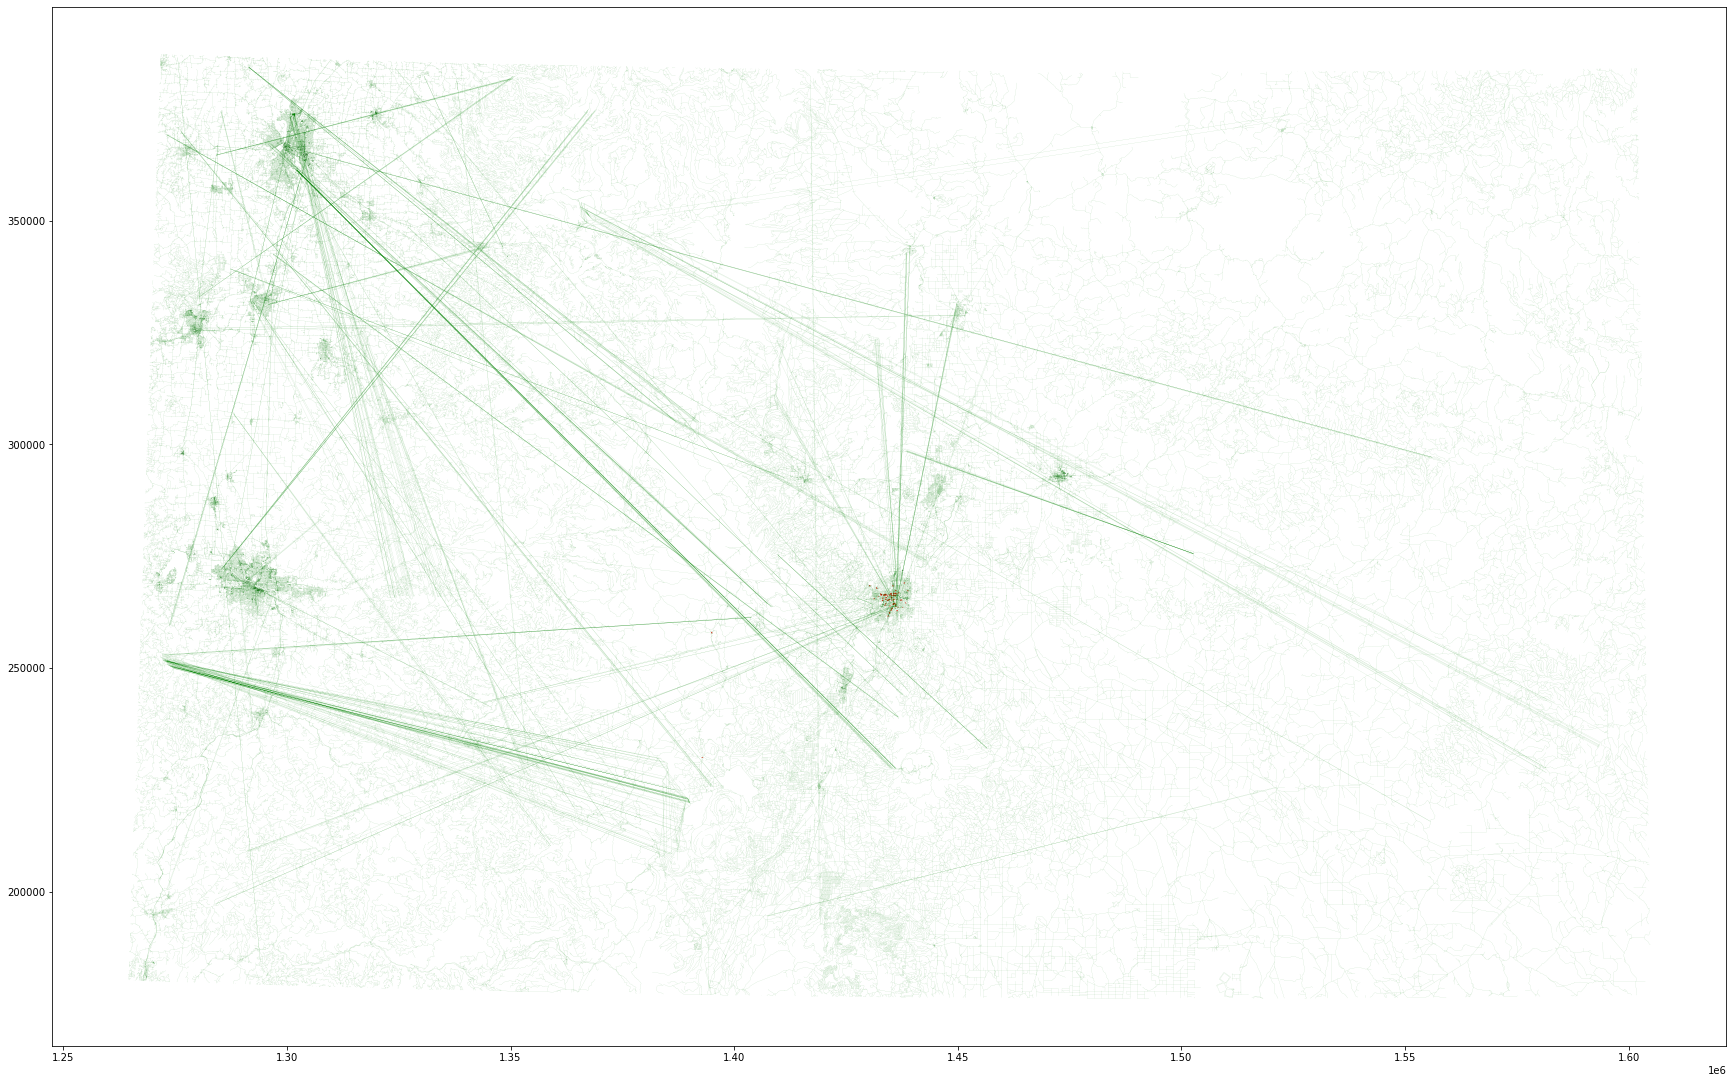

In [678]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [679]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                                       name     ref  \
9960   5346451                                       None    None   
9964   5346478                                       None    None   
10249  5348016  National Forest Development Road 4600-471  NF 471   
10254  5348030                                       None    None   
10257  5348043                             Elk Lake Lodge    None   

               type  oneway  bridge  maxspeed  \
9960    residential       0       0      25.0   
9964    residential       0       0      25.0   
10249       service       0       0       NaN   
10254       service       0       0       NaN   
10257  unclassified       0       0       NaN   

                                                geometry  
9960   LINESTRING (1433093.717 265046.111, 1433153.49...  
9964   LINESTRING (1433152.409 264990.878, 1433153.49...  
10249  LINESTRING (1394973.677 257954.992, 1394931.21...  
10254  LINESTRING (1395142.863 257920.199, 1395136.51...  
10257  LINESTRING (1394973.677 257954.992, 1395066.92...

In [680]:
#ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Intersect

In [681]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  P001BEN                                      Colorado Ave.   permanent   
2  P001BEN                                      Colorado Ave.   permanent   
3  S016BEN                   Colorado between Staats and Bond  short-term   
4  S024BEN  TrailfromColoradotoUS97Parkway_City Off Street...  short-term   

   year region  travel_pattern      AADBT   stv_adb  stv_c_adb  stl_raw  ...  \
0  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
1  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
2  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
3  2019   Bend             3.0  52.937398  1.726027   0.547945    920.0  ...   
4  2019   Bend             3.0  46.464386  0.589041   0.301370    212.0  ...   

   buff_dist  buffer_area   osm_id                       name   ref  \
0        0.1     0.027829  5370618    Northwest Carlon Avenue  None   
1        0.1     0.027829  5375253  Northwest Broadway Street  None   
2        0.1     0.027829  5378675   Northwest Arizona Avenue  None   
3        0.1     0.030809  5378675   Northwest Arizona Avenue  None   
4        0.1     0.017040  5378675   Northwest Arizona Avenue  None   

          type  oneway bridge maxspeed  \
0  residential       0      0     25.0   
1  residential       0      0     25.0   
2    secondary       1      0     35.0   
3    secondary       1      0     35.0   
4    secondary       1      0     35.0   

                                            geometry  
0  LINESTRING (1434348.263 265310.025, 1434387.00...  
1  LINESTRING (1434406.019 265299.355, 1434396.27...  
2  LINESTRING (1434379.199 265208.743, 1434386.12...  
3  LINESTRING (1434535.519 265242.719, 1434568.65...  
4  LINESTRING (1434996.526 265257.137, 1435025.52...  

[5 rows x 24 columns]

# Calculate the length of the road segments

In [682]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  P001BEN                                      Colorado Ave.   permanent   
2  P001BEN                                      Colorado Ave.   permanent   
3  S016BEN                   Colorado between Staats and Bond  short-term   
4  S024BEN  TrailfromColoradotoUS97Parkway_City Off Street...  short-term   

   year region  travel_pattern      AADBT   stv_adb  stv_c_adb  stl_raw  ...  \
0  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
1  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
2  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
3  2019   Bend             3.0  52.937398  1.726027   0.547945    920.0  ...   
4  2019   Bend             3.0  46.464386  0.589041   0.301370    212.0  ...   

   buffer_area   osm_id                       name   ref         type  oneway  \
0     0.027829  5370618    Northwest Carlon Avenue  None  residential       0   
1     0.027829  5375253  Northwest Broadway Street  None  residential       0   
2     0.027829  5378675   Northwest Arizona Avenue  None    secondary       1   
3     0.030809  5378675   Northwest Arizona Avenue  None    secondary       1   
4     0.017040  5378675   Northwest Arizona Avenue  None    secondary       1   

   bridge maxspeed                                           geometry  \
0       0     25.0  LINESTRING (1434348.263 265310.025, 1434387.00...   
1       0     25.0  LINESTRING (1434406.019 265299.355, 1434396.27...   
2       0     35.0  LINESTRING (1434379.199 265208.743, 1434386.12...   
3       0     35.0  LINESTRING (1434535.519 265242.719, 1434568.65...   
4       0     35.0  LINESTRING (1434996.526 265257.137, 1435025.52...   

       Length  
0  141.460092  
1  197.685255  
2  571.590462  
3  887.038411  
4  601.937496  

[5 rows x 25 columns]

# Aggregrate the road functional class

In [683]:
output_roadfc=inter_road.groupby(by=['osm_id_sensor','type'])['Length'].sum()
output_roadfc

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  type        
5369529.0      path               1.991738
               residential      688.666132
               secondary        728.503043
               service         2670.916655
               tertiary        1170.321012
                                  ...     
435543658.0    unclassified    1851.178292
438346301.0    footway          290.339724
               residential     1570.534447
               secondary       1754.014290
               service           92.878433
Name: Length, Length: 266, dtype: float64

# Calculate the primary road

In [684]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_primary.columns=["osm_id","Primary"]
output_primary.head()

osm_id      Primary
0   5369733.0   781.384680
1   5372140.0  3238.685575
2   5372797.0  1188.249027
3   5376418.0  1420.976097
4  90955476.0  1070.016390

In [685]:
# Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_secondary.columns=["osm_id","Secondary"]
output_secondary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Secondary
0  5369529.0   728.503043
1  5369733.0   398.348154
2  5369877.0  1079.588381
3  5372140.0  1482.402604
4  5372611.0  1028.070684

In [686]:
# Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_tertiary.columns=["osm_id","Tertiary"]
output_tertiary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Tertiary
0  5369529.0  1170.321012
1  5369733.0   197.126273
2  5369877.0  2133.121921
3  5371320.0  1468.570446
4  5372140.0  2998.107842

In [687]:
# Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_residential.columns=["osm_id","Residential_Road"]
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Road
0  5369529.0        688.666132
1  5369733.0       3402.190751
2  5369877.0       2609.755647
3  5371320.0       1372.447941
4  5372140.0       4988.509197

In [688]:
# Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_path.columns=["osm_id","Path"]
output_path.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         Path
0    5369529.0     1.991738
1    5369877.0   889.554467
2   47636835.0   625.674740
3  276823353.0  1090.289412
4  318903452.0   107.724588

In [689]:
# calculate cycleway
# Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_cycleway.columns=["osm_id","Cycleway"] 
output_cycleway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Cycleway
0   5372768.0   485.778224
1  39857665.0  2832.590988
2  46094520.0   691.451073
3  46094521.0   691.451073
4  46094523.0   429.433108

In [690]:
# Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_footway.columns=["osm_id","Footway"] 
output_footway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Footway
0  5369877.0   617.816656
1  5372140.0  1620.905727
2  5372768.0  1211.322744
3  5376418.0  3188.150277
4  5376895.0   133.102005

# Calculcate the mean Speed

In [691]:
# Exclude NAN and zero value first then take the mean
inter_road.maxspeed.describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    589.000000
mean      26.680815
std        6.984676
min       15.000000
25%       25.000000
50%       25.000000
75%       25.000000
max       45.000000
Name: maxspeed, dtype: float64

In [692]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
inter_road1.head(5) 

site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  P001BEN                                      Colorado Ave.   permanent   
2  P001BEN                                      Colorado Ave.   permanent   
3  S016BEN                   Colorado between Staats and Bond  short-term   
4  S024BEN  TrailfromColoradotoUS97Parkway_City Off Street...  short-term   

   year region  travel_pattern      AADBT   stv_adb  stv_c_adb  stl_raw  ...  \
0  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
1  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
2  2019   Bend             2.0  46.209524  6.561644   2.616438   3189.0  ...   
3  2019   Bend             3.0  52.937398  1.726027   0.547945    920.0  ...   
4  2019   Bend             3.0  46.464386  0.589041   0.301370    212.0  ...   

   buffer_area   osm_id                       name   ref         type  oneway  \
0     0.027829  5370618    Northwest Carlon Avenue  None  residential       0   
1     0.027829  5375253  Northwest Broadway Street  None  residential       0   
2     0.027829  5378675   Northwest Arizona Avenue  None    secondary       1   
3     0.030809  5378675   Northwest Arizona Avenue  None    secondary       1   
4     0.017040  5378675   Northwest Arizona Avenue  None    secondary       1   

   bridge maxspeed                                           geometry  \
0       0     25.0  LINESTRING (1434348.263 265310.025, 1434387.00...   
1       0     25.0  LINESTRING (1434406.019 265299.355, 1434396.27...   
2       0     35.0  LINESTRING (1434379.199 265208.743, 1434386.12...   
3       0     35.0  LINESTRING (1434535.519 265242.719, 1434568.65...   
4       0     35.0  LINESTRING (1434996.526 265257.137, 1435025.52...   

       Length  
0  141.460092  
1  197.685255  
2  571.590462  
3  887.038411  
4  601.937496  

[5 rows x 25 columns]

In [693]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                                     site_name sensor_type  \
0    566  S017BEN              3rdStRailOverpassSouthofBurnside  short-term   
1    567  S023BEN  Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   
2    629  S023BEN  Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   
3    630  S032BEN     HWY20(3RD)betweenNortonandOlneySBSidewalk  short-term   
4    640  S023BEN  Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   

   year region  travel_pattern       AADBT   stv_adb  stv_c_adb  ...  \
0  2019   Bend             2.0  100.823272  0.986301   0.534247  ...   
1  2019   Bend             2.0   37.957692  0.821918   0.369863  ...   
2  2019   Bend             2.0   37.957692  0.821918   0.369863  ...   
3  2019   Bend             2.0   32.219935  0.561644   0.301370  ...   
4  2019   Bend             2.0   37.957692  0.821918   0.369863  ...   

   buffer_area     osm_id                        name               ref  \
0     0.032794    5372797        Northeast 3rd Street    US 97 Business   
1     0.038157    5372797        Northeast 3rd Street    US 97 Business   
2     0.038157    5372140        Northeast 3rd Street  US 20;US 97 Busi   
3     0.034319    5372140        Northeast 3rd Street  US 20;US 97 Busi   
4     0.038157  227635161  Northeast Greenwood Avenue             US 20   

      type oneway  bridge  maxspeed  \
0  primary      0       0      35.0   
1  primary      0       0      35.0   
2  primary      0       0      35.0   
3  primary      0       0      35.0   
4  primary      0       0      25.0   

                                            geometry       Length  
0  LINESTRING (1435689.063 265167.935, 1435689.12...  1188.249027  
1  LINESTRING (1435696.798 266043.004, 1435696.95...   428.521908  
2  LINESTRING (1435697.957 266173.612, 1435698.25...   872.242942  
3  LINESTRING (1435701.152 266445.323, 1435701.14...  1381.483979  
4  LINESTRING (1435867.554 266172.406, 1435842.03...    83.744419  

[5 rows x 26 columns]

In [694]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                                     site_name sensor_type  \
0    566  S017BEN              3rdStRailOverpassSouthofBurnside  short-term   
1    567  S023BEN  Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   
2    629  S023BEN  Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   
3    630  S032BEN     HWY20(3RD)betweenNortonandOlneySBSidewalk  short-term   
4    640  S023BEN  Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   

   year region  travel_pattern       AADBT   stv_adb  stv_c_adb  ...  \
0  2019   Bend             2.0  100.823272  0.986301   0.534247  ...   
1  2019   Bend             2.0   37.957692  0.821918   0.369863  ...   
2  2019   Bend             2.0   37.957692  0.821918   0.369863  ...   
3  2019   Bend             2.0   32.219935  0.561644   0.301370  ...   
4  2019   Bend             2.0   37.957692  0.821918   0.369863  ...   

   buffer_area     osm_id                        name               ref  \
0     0.032794    5372797        Northeast 3rd Street    US 97 Business   
1     0.038157    5372797        Northeast 3rd Street    US 97 Business   
2     0.038157    5372140        Northeast 3rd Street  US 20;US 97 Busi   
3     0.034319    5372140        Northeast 3rd Street  US 20;US 97 Busi   
4     0.038157  227635161  Northeast Greenwood Avenue             US 20   

      type oneway  bridge  maxspeed  \
0  primary      0       0      35.0   
1  primary      0       0      35.0   
2  primary      0       0      35.0   
3  primary      0       0      35.0   
4  primary      0       0      25.0   

                                            geometry       Length  
0  LINESTRING (1435689.063 265167.935, 1435689.12...  1188.249027  
1  LINESTRING (1435696.798 266043.004, 1435696.95...   428.521908  
2  LINESTRING (1435697.957 266173.612, 1435698.25...   872.242942  
3  LINESTRING (1435701.152 266445.323, 1435701.14...  1381.483979  
4  LINESTRING (1435867.554 266172.406, 1435842.03...    83.744419  

[5 rows x 26 columns]

In [695]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['osm_id_sensor'])['maxspeed'].agg(pd.Series.mode).reset_index() # revised
output_meanspeed.columns=['osm_id','maxspeed']
output_meanspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id maxspeed
0  5369529.0     25.0
1  5369733.0     25.0
2  5369877.0     25.0
3  5371320.0     25.0
4  5372140.0     25.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [696]:
def min_distance_pline(point, line):
    return line.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [697]:
ecoshort.head()

site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0              2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
7              2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
14             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
21             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
28             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

     longitude comment  osm_id_sensor buff_dist  \
0  -121.319863     NaN     48381206.0       2.0   
7  -121.308599     NaN      5369877.0       2.0   
14 -121.324270     NaN     49105950.0       2.0   
21 -121.314923     NaN     46094523.0       2.0   
28 -121.310496     NaN     46094520.0       2.0   

                          geometry  min_dist_to_school  min_dist_to_college  \
0   POINT (1434297.657 265113.372)         1836.231483         10520.590150   
7   POINT (1435206.451 265737.006)         1839.981365         11794.261428   
14  POINT (1433951.414 265816.071)         1671.767045          8150.297244   
21  POINT (1434705.630 266350.843)         2062.855533          9487.250630   
28  POINT (1435063.168 266646.066)         2917.732762         10342.951024   

    min_dist_to_university lanes  
0              2387.326197     2  
7              5773.809117     2  
14             4506.877508     1  
21             6656.861545     2  
28             8005.030293     2

In [698]:
road_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name    ref         type  oneway  bridge  maxspeed  \
0  5083705  Sherman Highway  US 97      primary       0       0      55.0   
1  5083943      Decker Road   None        track       0       0       NaN   
2  5083991      Helyer Road   None  residential       0       0       NaN   
3  5084123             None   None  residential       0       0       NaN   
4  5085254             None   None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1  LINESTRING (1487599.361 379805.264, 1487537.25...  
2  LINESTRING (1490346.700 382043.724, 1490316.27...  
3  LINESTRING (1486935.053 382909.741, 1487051.82...  
4  LINESTRING (1485581.710 382268.513, 1485545.51...

In [699]:
print(road_proj.crs)
print(ecoshort.crs)

epsg:2839
epsg:2839


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [700]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                    name    ref     type  oneway  bridge  \
0      0  5083705         Sherman Highway  US 97  primary       0       0   
1    773  5138857  Central Oregon Highway  US 20  primary       0       0   
2   1950  5143196  Central Oregon Highway  US 20  primary       0       0   
3   3250  5193396    Warm Springs Highway  US 26  primary       0       0   
4   3329  5193723         Sherman Highway  US 97  primary       0       0   

   maxspeed                                           geometry  
0      55.0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1      65.0  LINESTRING (1548893.914 211384.598, 1548858.28...  
2      65.0  LINESTRING (1534985.421 213737.667, 1534581.71...  
3      55.0  LINESTRING (1431260.195 351224.436, 1430789.36...  
4      55.0  LINESTRING (1480178.213 371574.040, 1480242.72...

# In the below pline distance, you can see counter is located little far away from the link

In [701]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [702]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [703]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [704]:
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [705]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0              2.0   46.209524   6.561644   2.616438   3189.0  ...   
7              2.0  220.426625   6.958904   3.068493   2617.0  ...   
14             3.0  127.953968  13.726027   4.369863   3128.0  ...   
21             1.0  109.378321   7.027397   2.178082   1998.0  ...   
28             2.0   61.295238   5.260274   1.698630   1387.0  ...   

     longitude  comment osm_id_sensor  buff_dist  \
0  -121.319863      NaN    48381206.0        2.0   
7  -121.308599      NaN     5369877.0        2.0   
14 -121.324270      NaN    49105950.0        2.0   
21 -121.314923      NaN    46094523.0        2.0   
28 -121.310496      NaN    46094520.0        2.0   

                          geometry min_dist_to_school  min_dist_to_college  \
0   POINT (1434297.657 265113.372)        1836.231483         10520.590150   
7   POINT (1435206.451 265737.006)        1839.981365         11794.261428   
14  POINT (1433951.414 265816.071)        1671.767045          8150.297244   
21  POINT (1434705.630 266350.843)        2062.855533          9487.250630   
28  POINT (1435063.168 266646.066)        2917.732762         10342.951024   

    min_dist_to_university  lanes maxspeed  
0              2387.326197      2     35.0  
7              5773.809117      2     25.0  
14             4506.877508      1     25.0  
21             6656.861545      2     25.0  
28             8005.030293      2     25.0  

[5 rows x 21 columns]

In [706]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2, right_on='osm_id', left_on='osm_id_sensor',how='inner')
pt_speed_v1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0   P001BEN                                      Colorado Ave.   permanent   
1   P002BEN                           Franklin Ave. Both Sides   permanent   
2   P003BEN                          Galveston Ave. Both Sides   permanent   
3   P004BEN                            Newport Ave. Both Sides   permanent   
4   P005BEN                           Portland Ave. Both Sides   permanent   
5   S001BEN                                 27thNorthofConnors  short-term   
6   S002BEN                         15thbetweenBearCreek&Hwy20  short-term   
7   S003BEN                  8thStreetBetweenNortonandMarshall  short-term   
8   S005BEN                            Greenwood Undercrossing  short-term   
9   S007BEN                              Olneybetween5thand6th  short-term   
10  S008BEN  PettigrewCanalCrossingbetweenAirparkDRandCoppe...  short-term   
11  S009BEN                 PurcellBetweenCanalandButlerMarket  short-term   
12  S011BEN               ReedMarketBetweenAdmiralWay_Teakwood  short-term   
13  S012BEN                 WilsonAveEastof3rdBETWEEN4THAND5TH  short-term   
14  S015BEN                         Newport and 9th Street RAB  short-term   
15  S016BEN                   Colorado between Staats and Bond  short-term   
16  S017BEN                   3rdStRailOverpassSouthofBurnside  short-term   
17  S023BEN       Hwy20SB_sidewalkat3rd_NWcornerofIntersection  short-term   
18  S025BEN                             3rdstatTaftSB Sidewalk  short-term   
19  S029BEN                     Hwy 20 EB - WEST OF 6TH STREET  short-term   
20  S033BEN                HWY20NB_BETWEENMTWASHINGTON/OBRILEY  short-term   
21  S035BEN                            PennAveWestof12thstreet  short-term   
22  S038BEN                                Murphy3rdRABWestLeg  short-term   
23  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
24  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
25  S046BEN            BrosterhousBetweenAmericanLNandChivasRD  short-term   
26  S050BEN  9thStreetatBendHighEastEntranceBetweenEmersona...  short-term   
27  S051BEN                     6thStreetBetweenOlneyandNorton  short-term   
28  S054BEN        MtWashingtonEastofPineTerrace@DRTconnection  short-term   
29  S055BEN           Shevlin Park Road West of Park Comons Dr  short-term   
30  S056BEN                      Regency east of Mt Washington  short-term   
31  S058BEN                           Skyliner west of York Dr  short-term   
32  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   
33  S070BEN           Wall Street between Lafayette and Norton  short-term   
34  S073BEN        Scott Street between Rail crossing and Aune  short-term   
35  S075BEN  NW 15th 100' South of Knoll Neighborhood Green...  short-term   
36  S077BEN  !5th Street Neighborhood greenway between Elgi...  short-term   
37  S078BEN  Milwaukee Ave Between Knoxville and College/Mi...  short-term   
38  S079BEN  Milwaukee 200' South of College/Newport RAB on NG  short-term   
39  S080BEN   College Way just north of Retail Center Driveway  short-term   
40  S082BEN            Lexington Between 13th and 12th Streets  short-term   
41  S084BEN              2nd street between Taft and Roosevelt  short-term   
42  S085BEN    SE Roosevelt Ave Between 6th and Sun/Polaris Ct  short-term   
43  S088BEN                  Portland Ave. Sidewalk Both Sides  short-term   

    year region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0   2019   Bend             2.0   46.209524   6.561644   2.616438   3189.0   
1   2019   Bend             2.0  220.426625   6.958904   3.068493   2617.0   
2   2019   Bend             3.0  127.953968  13.726027   4.369863   3128.0   
3   2019   Bend             1.0  109.378321   7.027397   2.178082   1998.0   
4   2019   Bend             2.0   61.295238   5.260274   1.698630   1387.0   
5   2019   Bend          

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

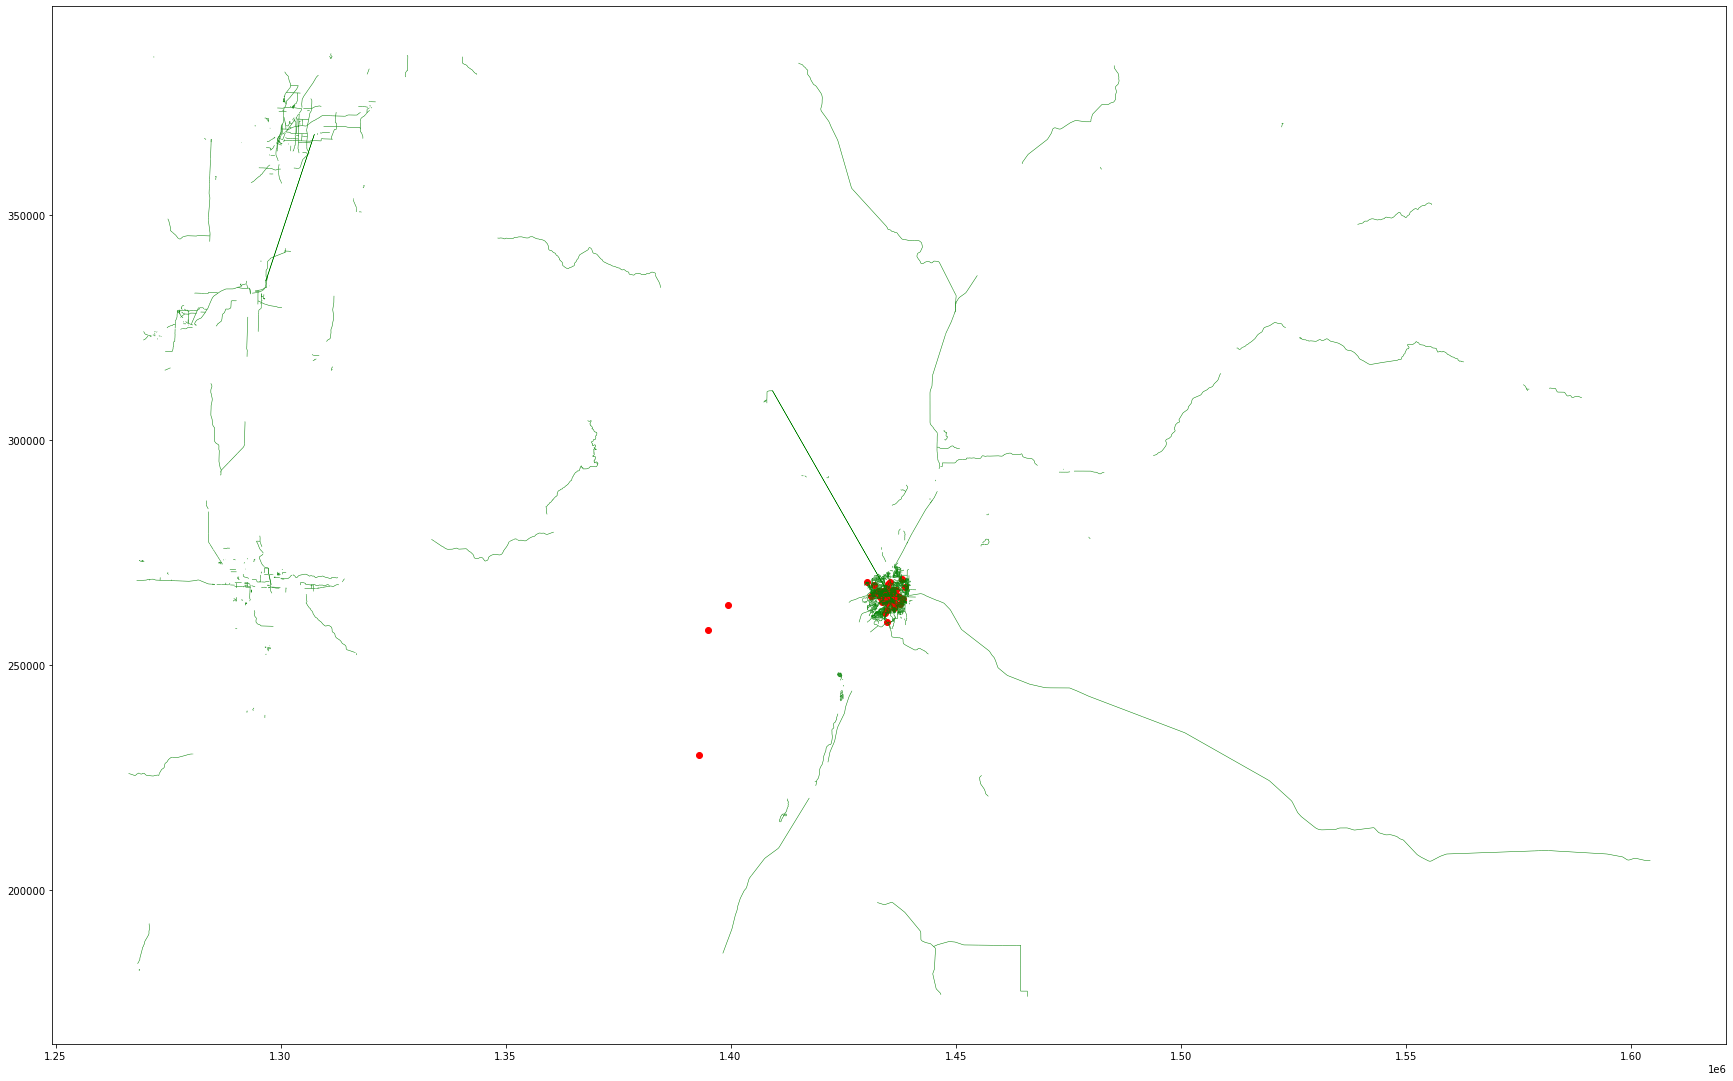

In [707]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red")
road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [708]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['osm_id_sensor'])['maxspeed'].mean().reset_index()
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  maxspeed
0       5369529.0      25.0
1       5369733.0      25.0
2       5369877.0      25.0
3       5371320.0      35.0
4       5372140.0      35.0
5       5372611.0      30.0
6       5372622.0      45.0
7       5372768.0      35.0
8       5372797.0      35.0
9       5372909.0      25.0
10      5373510.0      35.0
11      5373770.0      25.0
12      5375454.0      25.0
13      5376261.0      25.0
14      5376418.0      35.0
15      5376895.0      25.0
16      5377057.0      25.0
17      5377140.0      35.0
18      5377556.0      25.0
19      5378693.0      35.0
20     39857665.0      25.0
21     46094520.0      25.0
22     46094521.0      25.0
23     46094523.0      25.0
24     47346890.0      30.0
25     47636835.0      35.0
26     48332546.0      30.0
27     48332549.0      25.0
28     48381198.0      35.0
29     48381206.0      35.0
30     48381210.0      20.0
31     49105950.0      25.0
32     90955476.0      35.0
33    135232314.0      35.0
34    135232327.0      25.0
35    142063142.0      25.0
36    143486914.0      35.0
37    186561286.0      25.0
38    205976639.0      25.0
39    239383101.0      25.0
40    266268202.0      40.0
41    276823353.0      45.0
42    277179269.0      35.0
43    317726062.0      45.0
44    318903452.0      35.0
45    360457476.0      35.0
46    360461903.0      25.0
47    364850041.0      30.0
48    365159255.0      40.0
49    365226874.0      25.0
50    369186255.0      30.0
51    396269202.0      25.0
52    432213408.0      35.0
53    435543651.0      40.0
54    435543658.0      35.0
55    438346301.0      25.0
56    671002846.0      35.0

In [709]:
output_pointspeed.columns=["osm_id","Point Speed"]
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Speed
0     5369529.0         25.0
1     5369733.0         25.0
2     5369877.0         25.0
3     5371320.0         35.0
4     5372140.0         35.0
5     5372611.0         30.0
6     5372622.0         45.0
7     5372768.0         35.0
8     5372797.0         35.0
9     5372909.0         25.0
10    5373510.0         35.0
11    5373770.0         25.0
12    5375454.0         25.0
13    5376261.0         25.0
14    5376418.0         35.0
15    5376895.0         25.0
16    5377057.0         25.0
17    5377140.0         35.0
18    5377556.0         25.0
19    5378693.0         35.0
20   39857665.0         25.0
21   46094520.0         25.0
22   46094521.0         25.0
23   46094523.0         25.0
24   47346890.0         30.0
25   47636835.0         35.0
26   48332546.0         30.0
27   48332549.0         25.0
28   48381198.0         35.0
29   48381206.0         35.0
30   48381210.0         20.0
31   49105950.0         25.0
32   90955476.0         35.0
33  135232314.0         35.0
34  135232327.0         25.0
35  142063142.0         25.0
36  143486914.0         35.0
37  186561286.0         25.0
38  205976639.0         25.0
39  239383101.0         25.0
40  266268202.0         40.0
41  276823353.0         45.0
42  277179269.0         35.0
43  317726062.0         45.0
44  318903452.0         35.0
45  360457476.0         35.0
46  360461903.0         25.0
47  364850041.0         30.0
48  365159255.0         40.0
49  365226874.0         25.0
50  369186255.0         30.0
51  396269202.0         25.0
52  432213408.0         35.0
53  435543651.0         40.0
54  435543658.0         35.0
55  438346301.0         25.0
56  671002846.0         35.0

In [710]:
pt_speed_v1.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'buff_dist',
       'geometry_x', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_x', 'index', 'osm_id',
       'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed_y', 'geometry_y'],
      dtype='object')

In [711]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['osm_id_sensor'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['osm_id','maxspeed']
output_pointspeed_v2

osm_id  maxspeed
0     5369529.0      25.0
1     5369733.0      25.0
2     5369877.0      25.0
3     5371320.0      35.0
4     5372140.0      35.0
5     5372768.0      35.0
6     5372797.0      35.0
7     5372909.0      25.0
8     5373510.0      35.0
9     5373770.0      25.0
10    5375454.0      25.0
11    5376261.0      25.0
12    5376418.0      35.0
13    5376895.0      25.0
14    5377057.0      25.0
15    5377140.0      35.0
16    5377556.0      25.0
17    5378693.0      35.0
18   46094520.0      25.0
19   46094521.0      25.0
20   46094523.0      25.0
21   47346890.0      30.0
22   47636835.0      35.0
23   48332546.0      30.0
24   48332549.0      25.0
25   48381198.0      35.0
26   48381206.0      35.0
27   48381210.0      20.0
28   49105950.0      25.0
29   90955476.0      35.0
30  135232314.0      35.0
31  135232327.0      25.0
32  143486914.0      35.0
33  186561286.0      25.0
34  239383101.0      25.0
35  276823353.0      45.0
36  360457476.0      35.0
37  360461903.0      25.0
38  364850041.0      30.0
39  365159255.0      40.0
40  365226874.0      25.0
41  369186255.0      30.0
42  435543651.0      40.0
43  438346301.0      25.0

# Calculate the road type of the closest link of count station

In [712]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [713]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                    name    ref     type  oneway  bridge  \
0      0  5083705         Sherman Highway  US 97  primary       0       0   
1    773  5138857  Central Oregon Highway  US 20  primary       0       0   
2   1950  5143196  Central Oregon Highway  US 20  primary       0       0   
3   3250  5193396    Warm Springs Highway  US 26  primary       0       0   
4   3329  5193723         Sherman Highway  US 97  primary       0       0   

   maxspeed                                           geometry  
0      55.0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1      65.0  LINESTRING (1548893.914 211384.598, 1548858.28...  
2      65.0  LINESTRING (1534985.421 213737.667, 1534581.71...  
3      55.0  LINESTRING (1431260.195 351224.436, 1430789.36...  
4      55.0  LINESTRING (1480178.213 371574.040, 1480242.72...

In [714]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [715]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort_speed, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#ecoshort_rt

In [716]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index     osm_id                        name               ref     type  \
0  16158    5372140        Northeast 3rd Street  US 20;US 97 Busi  primary   
1  16498    5372797        Northeast 3rd Street    US 97 Business  primary   
2  18468    5376418  Northeast Greenwood Avenue             US 20  primary   
3  58761   90955476        Northeast 3rd Street  US 20;US 97 Busi  primary   
4  63071  143486914        Southeast 3rd Street    US 97 Business  primary   

   oneway  bridge  maxspeed_x  \
0       0       0        35.0   
1       0       0        35.0   
2       0       0        35.0   
3       0       0        35.0   
4       0       0        35.0   

                                          geometry_x  site_id  ...  \
0  LINESTRING (1435697.957 266173.612, 1435698.25...  S023BEN  ...   
1  LINESTRING (1435688.870 265145.917, 1435689.12...  S017BEN  ...   
2  LINESTRING (1436662.629 266164.281, 1436575.84...  S029BEN  ...   
3  LINESTRING (1435535.112 269677.733, 1435518.73...  S033BEN  ...   
4  LINESTRING (1435605.501 264047.755, 1435611.38...  S025BEN  ...   

    longitude                      comment  osm_id_sensor buff_dist  \
0 -121.302660     sidewalk count NW of int      5372140.0       2.0   
1 -121.302536                          NaN      5372797.0       2.0   
2 -121.297974                          NaN      5376418.0       2.0   
3 -121.304846  NB (reverse) direction only     90955476.0       2.0   
4 -121.302579    SB/Westside sidewalk only    143486914.0       2.0   

                       geometry_y  min_dist_to_school  min_dist_to_college  \
0  POINT (1435686.944 266213.570)         1161.602927         12685.297798   
1  POINT (1435687.704 265261.816)         2000.189485         13919.350675   
2  POINT (1436061.997 266169.510)         1061.958078         13906.420869   
3  POINT (1435533.016 268428.139)         1525.783801         12171.134073   
4  POINT (1435675.516 264348.818)         3283.277853         15573.738696   

   min_dist_to_university  lanes  maxspeed_y  
0             7992.543255      4        35.0  
1             6115.250124      1        35.0  
2             8789.394708      4        35.0  
3            13991.208273      4        35.0  
4             5463.690500      2        35.0  

[5 rows x 30 columns]

In [717]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [718]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'site_id', 'site_name', 'sensor_type',
       'year', 'region', 'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb',
       'stl_raw', 'latitude', 'longitude', 'comment', 'osm_id_sensor',
       'buff_dist', 'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_y'],
      dtype='object')

In [719]:
pt_road_type1=road_merged_inner.loc[:,['osm_id_sensor','type']]
pt_road_type1.columns=['osm_id','road_type']
pt_road_type1.head()

osm_id road_type
0    5372140.0   primary
1    5372797.0   primary
2    5376418.0   primary
3   90955476.0   primary
4  143486914.0   primary

# Convert this road catagory to binary as follows- 0 and 1

In [720]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id road_type  primary_binary  secondary_binary  tertiary_binary  \
0    5372140.0   primary               1                 0                0   
1    5372797.0   primary               1                 0                0   
2    5376418.0   primary               1                 0                0   
3   90955476.0   primary               1                 0                0   
4  143486914.0   primary               1                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

In [721]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2=pt_road_type2.drop_duplicates(subset=['osm_id'],keep='first')
pt_road_type2.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  primary_binary  secondary_binary  tertiary_binary  \
0    5372140.0               1                 0                0   
1    5372797.0               1                 0                0   
2    5376418.0               1                 0                0   
3   90955476.0               1                 0                0   
4  143486914.0               1                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

# Calculate the Bridges

In [722]:
bridge=inter_road.copy()
output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# Convert binary, presence of bridge=1, absence of bridge=0
output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
output_bridge.columns=['osm_id','bridge']
output_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  bridge
0  5369529.0       2
1  5369733.0       2
2  5369877.0       1
3  5371320.0       2
4  5372140.0       2

# Calculate the bridge from spatial join of count location and bridge line shape file

In [723]:
bridge_only=road_proj
bridge_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name    ref         type  oneway  bridge  maxspeed  \
0  5083705  Sherman Highway  US 97      primary       0       0      55.0   
1  5083943      Decker Road   None        track       0       0       NaN   
2  5083991      Helyer Road   None  residential       0       0       NaN   
3  5084123             None   None  residential       0       0       NaN   
4  5085254             None   None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1  LINESTRING (1487599.361 379805.264, 1487537.25...  
2  LINESTRING (1490346.700 382043.724, 1490316.27...  
3  LINESTRING (1486935.053 382909.741, 1487051.82...  
4  LINESTRING (1485581.710 382268.513, 1485545.51...

In [724]:
#count_station
bridge_only.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osm_id', 'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed',
       'geometry'],
      dtype='object')

In [725]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  lanes  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...      2   
1             2.0  220.426625   6.958904   3.068493   2617.0  ...      2   
2             3.0  127.953968  13.726027   4.369863   3128.0  ...      1   
3             1.0  109.378321   7.027397   2.178082   1998.0  ...      2   
4             2.0   61.295238   5.260274   1.698630   1387.0  ...      2   

   maxspeed_x    osm_id                        name   ref       type  oneway  \
0        35.0  48381206   Southwest Colorado Avenue  None  secondary       0   
1        25.0   5369877   Northwest Franklin Avenue  None  secondary       0   
2        25.0  49105950  Northwest Galveston Avenue  None  secondary       0   
3        25.0  46094523    Northwest Newport Avenue  None  secondary       0   
4        25.0  46094520   Northwest Portland Avenue  None   tertiary       0   

   bridge  maxspeed_y                                         geometry_y  
0       0        35.0  LINESTRING (1434286.496 265096.386, 1434316.88...  
1       0        25.0  LINESTRING (1435326.798 265730.143, 1435210.25...  
2       0        25.0  LINESTRING (1433976.657 265820.086, 1433968.10...  
3       0        25.0  LINESTRING (1434730.569 266331.976, 1434695.75...  
4       1        25.0  LINESTRING (1434996.515 266646.232, 1435053.03...  

[5 rows x 29 columns]

In [726]:
# Join by OSM ID
#pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
#pointInline_bridge_v2


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [727]:
output_point_bridge=pointInline_bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
output_point_bridge.head()

osm_id_sensor  bridge
0      5369529.0       0
1      5369733.0       0
2      5369877.0       0
3      5371320.0       0
4      5372140.0       0

In [728]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["osm_id","Point Bridge"]
output_point_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Bridge
0  5369529.0             2
1  5369733.0             2
2  5369877.0             2
3  5371320.0             2
4  5372140.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [729]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [730]:
nature_proj1.head(5)

osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
2  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305345.602 ...

In [731]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name  type  \
4   30106022  Parkdale County Park  park   
7   30264106       Riverfront Park  park   
25  30504889     Holman State Park  park   
27  30927377  Weathers Street Park  park   
29  32333645    Marion Square Park  park   

                                             geometry  
4   POLYGON ((1305349.877 372106.996, 1305345.602 ...  
7   POLYGON ((1299433.809 367465.490, 1299453.092 ...  
25  POLYGON ((1294325.792 366417.961, 1294618.224 ...  
27  POLYGON ((1304334.111 367051.705, 1304186.661 ...  
29  POLYGON ((1299622.682 367272.226, 1299611.540 ...

In [732]:
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0              2.0   46.209524   6.561644   2.616438   3189.0  ...   
7              2.0  220.426625   6.958904   3.068493   2617.0  ...   
14             3.0  127.953968  13.726027   4.369863   3128.0  ...   
21             1.0  109.378321   7.027397   2.178082   1998.0  ...   
28             2.0   61.295238   5.260274   1.698630   1387.0  ...   

     longitude  comment osm_id_sensor  buff_dist  \
0  -121.319863      NaN    48381206.0        2.0   
7  -121.308599      NaN     5369877.0        2.0   
14 -121.324270      NaN    49105950.0        2.0   
21 -121.314923      NaN    46094523.0        2.0   
28 -121.310496      NaN    46094520.0        2.0   

                          geometry min_dist_to_school  min_dist_to_college  \
0   POINT (1434297.657 265113.372)        1836.231483         10520.590150   
7   POINT (1435206.451 265737.006)        1839.981365         11794.261428   
14  POINT (1433951.414 265816.071)        1671.767045          8150.297244   
21  POINT (1434705.630 266350.843)        2062.855533          9487.250630   
28  POINT (1435063.168 266646.066)        2917.732762         10342.951024   

    min_dist_to_university  lanes maxspeed  
0              2387.326197      2     35.0  
7              5773.809117      2     25.0  
14             4506.877508      1     25.0  
21             6656.861545      2     25.0  
28             8005.030293      2     25.0  

[5 rows x 21 columns]

In [733]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  comment  \
0              2.0   46.209524   6.561644   2.616438   3189.0  ...      NaN   
7              2.0  220.426625   6.958904   3.068493   2617.0  ...      NaN   
14             3.0  127.953968  13.726027   4.369863   3128.0  ...      NaN   
21             1.0  109.378321   7.027397   2.178082   1998.0  ...      NaN   
28             2.0   61.295238   5.260274   1.698630   1387.0  ...      NaN   

    osm_id_sensor buff_dist                        geometry  \
0      48381206.0       2.0  POINT (1434297.657 265113.372)   
7       5369877.0       2.0  POINT (1435206.451 265737.006)   
14     49105950.0       2.0  POINT (1433951.414 265816.071)   
21     46094523.0       2.0  POINT (1434705.630 266350.843)   
28     46094520.0       2.0  POINT (1435063.168 266646.066)   

   min_dist_to_school min_dist_to_college  min_dist_to_university  lanes  \
0         1836.231483        10520.590150             2387.326197      2   
7         1839.981365        11794.261428             5773.809117      2   
14        1671.767045         8150.297244             4506.877508      1   
21        2062.855533         9487.250630             6656.861545      2   
28        2917.732762        10342.951024             8005.030293      2   

    maxspeed min_dist_to_polygon  
0       35.0          337.240761  
7       25.0         1416.110195  
14      25.0           52.415401  
21      25.0           39.470064  
28      25.0           19.485275  

[5 rows x 22 columns]

In [734]:
Park_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
Park_distance1.columns=["osm_id","Distance to Park"]
Park_distance1=Park_distance1.drop_duplicates(subset=['osm_id'],keep='first')
Park_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park
0   48381206.0        337.240761
7    5369877.0       1416.110195
14  49105950.0         52.415401
21  46094523.0         39.470064
28  46094520.0         19.485275

# cc distance to park

In [735]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
parkcc_distance1.columns=["osm_id","Distance to Park Center"]
parkcc_distance1=parkcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
parkcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park Center
0   48381206.0               670.025504
7    5369877.0              1469.080663
14  49105950.0              1233.149102
21  46094523.0               214.352179
28  46094520.0               394.286909

# Distance to water body

In [736]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id               name   type  \
0  24445541               None  water   
3  25126014               None  water   
5  30186330       Paulina Lake  water   
6  30186476          East Lake  water   
8  30269840  Stone Quarry Lake  water   

                                            geometry  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
5  POLYGON ((1438807.997 229599.089, 1438837.355 ...  
6  POLYGON ((1443892.674 229515.123, 1443916.783 ...  
8  POLYGON ((1301205.869 363817.692, 1301206.974 ...

In [737]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  comment  \
0              2.0   46.209524   6.561644   2.616438   3189.0  ...      NaN   
7              2.0  220.426625   6.958904   3.068493   2617.0  ...      NaN   
14             3.0  127.953968  13.726027   4.369863   3128.0  ...      NaN   
21             1.0  109.378321   7.027397   2.178082   1998.0  ...      NaN   
28             2.0   61.295238   5.260274   1.698630   1387.0  ...      NaN   

    osm_id_sensor buff_dist                        geometry  \
0      48381206.0       2.0  POINT (1434297.657 265113.372)   
7       5369877.0       2.0  POINT (1435206.451 265737.006)   
14     49105950.0       2.0  POINT (1433951.414 265816.071)   
21     46094523.0       2.0  POINT (1434705.630 266350.843)   
28     46094520.0       2.0  POINT (1435063.168 266646.066)   

   min_dist_to_school min_dist_to_college  min_dist_to_university  lanes  \
0         1836.231483        10520.590150             2387.326197      2   
7         1839.981365        11794.261428             5773.809117      2   
14        1671.767045         8150.297244             4506.877508      1   
21        2062.855533         9487.250630             6656.861545      2   
28        2917.732762        10342.951024             8005.030293      2   

    maxspeed min_dist_to_polygon  
0       35.0          598.438382  
7       25.0         2254.193276  
14      25.0           57.355178  
21      25.0           54.744148  
28      25.0           26.599315  

[5 rows x 22 columns]

In [738]:
water_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
water_distance1.columns=["osm_id","Distance to Water Body"]
water_distance1=water_distance1.drop_duplicates(subset=['osm_id'],keep='first')
water_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Body
0   48381206.0              598.438382
7    5369877.0             2254.193276
14  49105950.0               57.355178
21  46094523.0               54.744148
28  46094520.0               26.599315

In [739]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
watercc_distance1.columns=["osm_id","Distance to Water Center"]
watercc_distance1=watercc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
watercc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Center
0   48381206.0                687.406354
7    5369877.0               3228.275608
14  49105950.0               1557.711927
21  46094523.0               1301.501825
28  46094520.0                462.114629

# Distance To  Forest

In [740]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name    type                                           geometry
1   25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
2   25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
34  33739423  None  forest  POLYGON ((1301785.526 368973.878, 1301783.274 ...
69  39421883  None  forest  POLYGON ((1297995.454 361000.607, 1298066.889 ...
72  39609166  None  forest  POLYGON ((1283061.104 365834.887, 1283131.169 ...

In [741]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  comment  \
0              2.0   46.209524   6.561644   2.616438   3189.0  ...      NaN   
7              2.0  220.426625   6.958904   3.068493   2617.0  ...      NaN   
14             3.0  127.953968  13.726027   4.369863   3128.0  ...      NaN   
21             1.0  109.378321   7.027397   2.178082   1998.0  ...      NaN   
28             2.0   61.295238   5.260274   1.698630   1387.0  ...      NaN   

    osm_id_sensor buff_dist                        geometry  \
0      48381206.0       2.0  POINT (1434297.657 265113.372)   
7       5369877.0       2.0  POINT (1435206.451 265737.006)   
14     49105950.0       2.0  POINT (1433951.414 265816.071)   
21     46094523.0       2.0  POINT (1434705.630 266350.843)   
28     46094520.0       2.0  POINT (1435063.168 266646.066)   

   min_dist_to_school min_dist_to_college  min_dist_to_university  lanes  \
0         1836.231483        10520.590150             2387.326197      2   
7         1839.981365        11794.261428             5773.809117      2   
14        1671.767045         8150.297244             4506.877508      1   
21        2062.855533         9487.250630             6656.861545      2   
28        2917.732762        10342.951024             8005.030293      2   

    maxspeed min_dist_to_polygon  
0       35.0         5005.416738  
7       25.0         6671.735261  
14      25.0         7442.970720  
21      25.0         5923.120725  
28      25.0         4408.608635  

[5 rows x 22 columns]

In [742]:
forest_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forest_distance1.columns=["osm_id","Distance to forest"]
forest_distance1=forest_distance1.drop_duplicates(subset=['osm_id'],keep='first')
forest_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to forest
0   48381206.0         5005.416738
7    5369877.0         6671.735261
14  49105950.0         7442.970720
21  46094523.0         5923.120725
28  46094520.0         4408.608635

In [743]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forestcc_distance1.columns=["osm_id","Distance to Forest Center"]
forestcc_distance1=forestcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
forestcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Forest Center
0   48381206.0                5091.037243
7    5369877.0                6732.935103
14  49105950.0                7528.668544
21  46094523.0                5985.629660
28  46094520.0                4471.349933

# Distance to green space area

In [744]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name   type  \
2   30010727  Brown Road Property  grass   
14  39421884                 None  grass   
31  40172820                 None  grass   
88  45060560                 None  grass   
89  45060565                 None  grass   

                                             geometry  
2   POLYGON ((1305210.479 368501.172, 1305004.835 ...  
14  POLYGON ((1297953.568 361010.027, 1297957.272 ...  
31  POLYGON ((1286354.936 358743.612, 1286373.575 ...  
88  POLYGON ((1299272.748 366999.958, 1299276.927 ...  
89  POLYGON ((1299119.115 366790.943, 1299122.951 ...

In [745]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  comment  \
0              2.0   46.209524   6.561644   2.616438   3189.0  ...      NaN   
7              2.0  220.426625   6.958904   3.068493   2617.0  ...      NaN   
14             3.0  127.953968  13.726027   4.369863   3128.0  ...      NaN   
21             1.0  109.378321   7.027397   2.178082   1998.0  ...      NaN   
28             2.0   61.295238   5.260274   1.698630   1387.0  ...      NaN   

    osm_id_sensor buff_dist                        geometry  \
0      48381206.0       2.0  POINT (1434297.657 265113.372)   
7       5369877.0       2.0  POINT (1435206.451 265737.006)   
14     49105950.0       2.0  POINT (1433951.414 265816.071)   
21     46094523.0       2.0  POINT (1434705.630 266350.843)   
28     46094520.0       2.0  POINT (1435063.168 266646.066)   

   min_dist_to_school min_dist_to_college  min_dist_to_university  lanes  \
0         1836.231483        10520.590150             2387.326197      2   
7         1839.981365        11794.261428             5773.809117      2   
14        1671.767045         8150.297244             4506.877508      1   
21        2062.855533         9487.250630             6656.861545      2   
28        2917.732762        10342.951024             8005.030293      2   

    maxspeed min_dist_to_polygon  
0       35.0           92.767397  
7       25.0         1541.258450  
14      25.0         1283.045552  
21      25.0         1694.976535  
28      25.0         2808.470648  

[5 rows x 22 columns]

In [746]:
grass_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grass_distance1.columns=["osm_id","Distance to Grass"]
grass_distance1=grass_distance1.drop_duplicates(subset=['osm_id'],keep='first')
grass_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass
0   48381206.0          92.767397
7    5369877.0        1541.258450
14  49105950.0        1283.045552
21  46094523.0        1694.976535
28  46094520.0        2808.470648

In [747]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grasscc_distance1.columns=["osm_id","Distance to Grass Center"]
grasscc_distance1=grasscc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
grasscc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass Center
0   48381206.0                342.230696
7    5369877.0               1669.416442
14  49105950.0               1432.363387
21  46094523.0               1850.115195
28  46094520.0               2920.051255

# Distance to commercial

In [748]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercial_distance1.columns=["osm_id","Distance to Commercial Area"]
commercial_distance1=commercial_distance1.drop_duplicates(subset=['osm_id'],keep='first')
commercial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area
0   48381206.0                  3870.753755
7    5369877.0                  5660.650940
14  49105950.0                  4174.325530
21  46094523.0                  4895.819384
28  46094520.0                  3376.920997

In [749]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercialcc_distance1.columns=["osm_id","Distance to Commercial Area Center"]
commercialcc_distance1=commercialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
commercialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area Center
0   48381206.0                         4393.534269
7    5369877.0                         5931.341155
14  49105950.0                         4751.841139
21  46094523.0                         5117.025340
28  46094520.0                         3602.456230

# Distance to industrial area

In [750]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrial_distance1.columns=["osm_id","Distance to Industrial Area"]
industrial_distance1=industrial_distance1.drop_duplicates(subset=['osm_id'],keep='first')
industrial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Area
0   48381206.0                  1091.253942
7    5369877.0                  2252.615213
14  49105950.0                  3300.132533
21  46094523.0                  4745.353996
28  46094520.0                  3686.878831

In [751]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrialcc_distance1.columns=["osm_id","Distance to Industrial Center"]
industrialcc_distance1=industrialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
industrialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Center
0   48381206.0                    1435.723711
7    5369877.0                    2610.973942
14  49105950.0                    3645.183901
21  46094523.0                    5141.012500
28  46094520.0                    4457.297604

# Distance to Retail area

In [752]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retail_distance1.columns=["osm_id","Distance to Retail Area"]
retail_distance1=retail_distance1.drop_duplicates(subset=['osm_id'],keep='first')
retail_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Area
0   48381206.0               912.843350
7    5369877.0              1470.712354
14  49105950.0              2188.100830
21  46094523.0              3474.666870
28  46094520.0              2499.633406

In [753]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retailcc_distance1.columns=["osm_id","Distance to Retail Center"]
retailcc_distance1=retailcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
retailcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Center
0   48381206.0                1237.116553
7    5369877.0                1572.520642
14  49105950.0                2656.875102
21  46094523.0                3674.619520
28  46094520.0                2945.855948

# Distance to Residential

In [754]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residential_distance1.columns=["osm_id","Distance to Residential Area"]
residential_distance1=residential_distance1.drop_duplicates(subset=['osm_id'],keep='first')
residential_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Area
0   48381206.0                   4702.394398
7    5369877.0                   2839.712020
14  49105950.0                   6355.265156
21  46094523.0                   5438.008646
28  46094520.0                   4327.669960

In [755]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residentialcc_distance1.columns=["osm_id","Distance to Residential Center"]
residentialcc_distance1=residentialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
residentialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Center
0   48381206.0                     5852.063372
7    5369877.0                     5422.732422
14  49105950.0                     7531.224178
21  46094523.0                     6629.718814
28  46094520.0                     5131.784928

# Import the OSM Building file and use Portland City Hall as the CBD, then calculate the distance from CBD

In [756]:
building1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name      type  \
0  27442271  Oregon State Capitol  building   
1  29128816                  None      None   
2  29129109                  None      None   
3  29463356                  None      None   
4  29463575                  None      None   

                                            geometry  
0  POLYGON ((-123.03102 44.93875, -123.03110 44.9...  
1  POLYGON ((-122.98051 44.95688, -122.98043 44.9...  
2  POLYGON ((-122.96775 44.96740, -122.96749 44.9...  
3  POLYGON ((-122.97156 44.98405, -122.97128 44.9...  
4  POLYGON ((-122.96077 44.98543, -122.96074 44.9...

In [757]:
# Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=2839)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.osm_id==262286818)]
bld_proj1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name  type                                           geometry
4468  262286818  None  None  POLYGON ((1434751.556 265821.229, 1434749.885 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

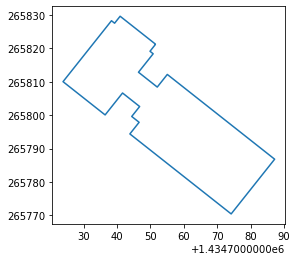

In [758]:
bld_proj1.geometry.boundary.plot()

In [759]:
# copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name  type                        geometry
4468  262286818  None  None  POINT (1434755.734 265799.360)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

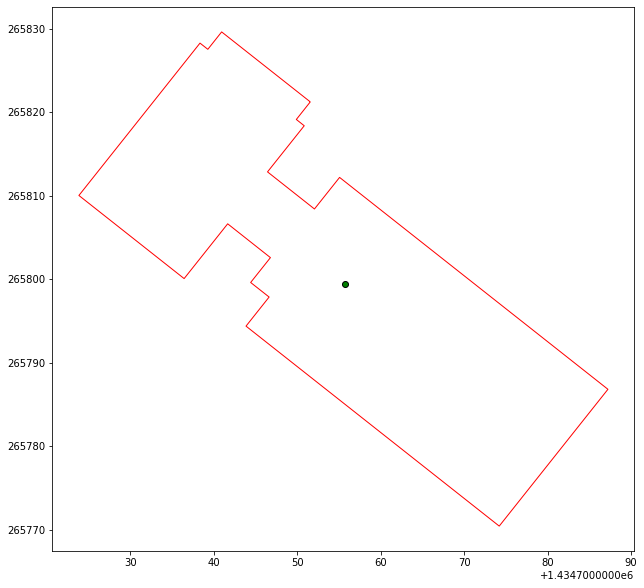

In [760]:
fig, ax = plt.subplots(figsize = (15,10)) 
bld_proj2.plot(ax=ax,color="green",edgecolor='k')
bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [761]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0              2.0   46.209524   6.561644   2.616438   3189.0  ...   
7              2.0  220.426625   6.958904   3.068493   2617.0  ...   
14             3.0  127.953968  13.726027   4.369863   3128.0  ...   
21             1.0  109.378321   7.027397   2.178082   1998.0  ...   
28             2.0   61.295238   5.260274   1.698630   1387.0  ...   

    osm_id_sensor  buff_dist                        geometry  \
0      48381206.0        2.0  POINT (1434297.657 265113.372)   
7       5369877.0        2.0  POINT (1435206.451 265737.006)   
14     49105950.0        2.0  POINT (1433951.414 265816.071)   
21     46094523.0        2.0  POINT (1434705.630 266350.843)   
28     46094520.0        2.0  POINT (1435063.168 266646.066)   

    min_dist_to_school min_dist_to_college min_dist_to_university  lanes  \
0          1836.231483        10520.590150            2387.326197      2   
7          1839.981365        11794.261428            5773.809117      2   
14         1671.767045         8150.297244            4506.877508      1   
21         2062.855533         9487.250630            6656.861545      2   
28         2917.732762        10342.951024            8005.030293      2   

    maxspeed  min_dist_to_polygon min_dist_to_CBD  
0       35.0          5852.063372     2706.272531  
7       25.0          5422.732422     1492.814353  
14      25.0          7531.224178     2639.417043  
21      25.0          6629.718814     1816.778856  
28      25.0          5131.784928     2955.355588  

[5 rows x 23 columns]

In [762]:
CBD_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_CBD']]
CBD_distance1.columns=["osm_id","Distance to CBD"]
CBD_distance1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to CBD
0   48381206.0      2706.272531
7    5369877.0      1492.814353
14  49105950.0      2639.417043
21  46094523.0      1816.778856
28  46094520.0      2955.355588

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [763]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [764]:
bg.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2627, 16)

In [765]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [766]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [767]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:2839')
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...  
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...  
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...  
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...  
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...

In [768]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  Total block Area  
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...      2.220647e+09  
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...      1.928498e+08  
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...      4.733330e+08  
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...      1.469862e+07  
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...      1.010078e+06

In [769]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHY2M001  AHY2M002  AHY2M003  \
0  Baker County        1      NaN     NaN  ...       167       149        38   
1  Baker County        1      NaN     NaN  ...       163       162        12   
2  Baker County        1      NaN     NaN  ...       159       159        29   
3  Baker County        1      NaN     NaN  ...       222       215        12   
4  Baker County        1      NaN     NaN  ...       237       188        36   

   AHY2M004  AHY2M005  AHY2M006  AHY2M007  AHY2M008  AHY2M009  AHY2M010  
0        11        10         8        12         7        12         7  
1        14         2         8         3         7         2         7  
2        13        12        12        53        16         7        14  
3        42        12        12        12        12        12        12  
4        12        57        12       150         7        12         7  

[5 rows x 58 columns]

In [770]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHY2M001 AHY2M002 AHY2M003  \
0        S  2.205986e+09  13837275.0  ...      167      149       38   
1        S  1.926901e+08     12317.0  ...      163      162       12   
2        S  4.723892e+08    639439.0  ...      159      159       29   
3        S  1.469016e+07         0.0  ...      222      215       12   
4        S  1.009492e+06         0.0  ...      237      188       36   

   AHY2M004  AHY2M005 AHY2M006  AHY2M007 AHY2M008  AHY2M009  AHY2M010  
0        11        10        8        12        7        12         7  
1        14         2        8         3        7         2         7  
2        13        12       12        53       16         7        14  
3        42        12       12        12       12        12        12  
4        12        57       12       150        7        12         7  

[5 rows x 74 columns]

In [771]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AHY2E001','AHY2E002','AHY2E003','Total block Area']]
race2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INTPTLAT      INTPTLON          GISJOIN     Shape_Leng    Shape_Area  \
0  +44.5468040  -118.1781784  G41000109501001  323465.419044  2.219823e+09   
1  +44.9562277  -118.0519082  G41000109501002  109051.976354  1.927024e+08   
2  +44.8443756  -118.0396603  G41000109501003  140639.998011  4.730286e+08   
3  +44.7764594  -117.8821056  G41000109502001   22860.454690  1.469017e+07   
4  +44.7753666  -117.8349670  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  AHY2E001  AHY2E002  \
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...       950       903   
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...       908       884   
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...      1128      1016   
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...      1097      1060   
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...      1103       912   

   AHY2E003  Total block Area  
0        25      2.220647e+09  
1         0      1.928498e+08  
2        23      4.733330e+08  
3         0      1.469862e+07  
4        25      1.010078e+06

In [772]:
#race2["Total block Area"]=race2.area
#race2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [773]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
buffer_clip_race.head(5)

INTPTLAT      INTPTLON          GISJOIN     Shape_Leng    Shape_Area  \
464  +43.7256814  -121.7130224  G41001700002001  158091.201067  7.983391e+08   
477  +44.0439864  -121.6397240  G41001700005001  216637.316723  1.639932e+09   
504  +44.0999045  -121.3410802  G41001700011001   26865.550023  1.999876e+07   
506  +44.0935231  -121.2841689  G41001700011003   14313.124056  8.895760e+06   
511  +44.0653409  -121.3652170  G41001700013001   16603.724508  8.938698e+06   

                                              geometry  AHY2E001  AHY2E002  \
464  POLYGON ((1392875.843 229958.337, 1392875.346 ...      1646      1612   
477  POLYGON ((1395129.091 257938.909, 1395129.827 ...      1347      1293   
504  MULTIPOLYGON (((1431828.890 268073.415, 143182...      3114      2910   
506  MULTIPOLYGON (((1435547.218 268261.240, 143554...      5856      5299   
511  MULTIPOLYGON (((1431996.221 267913.813, 143199...      4918      4696   

     AHY2E003  Total block Area  
464         0      7.982441e+08  
477         0      1.639970e+09  
504        14      1.999976e+07  
506        24      8.896169e+06  
511        19      8.938971e+06

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


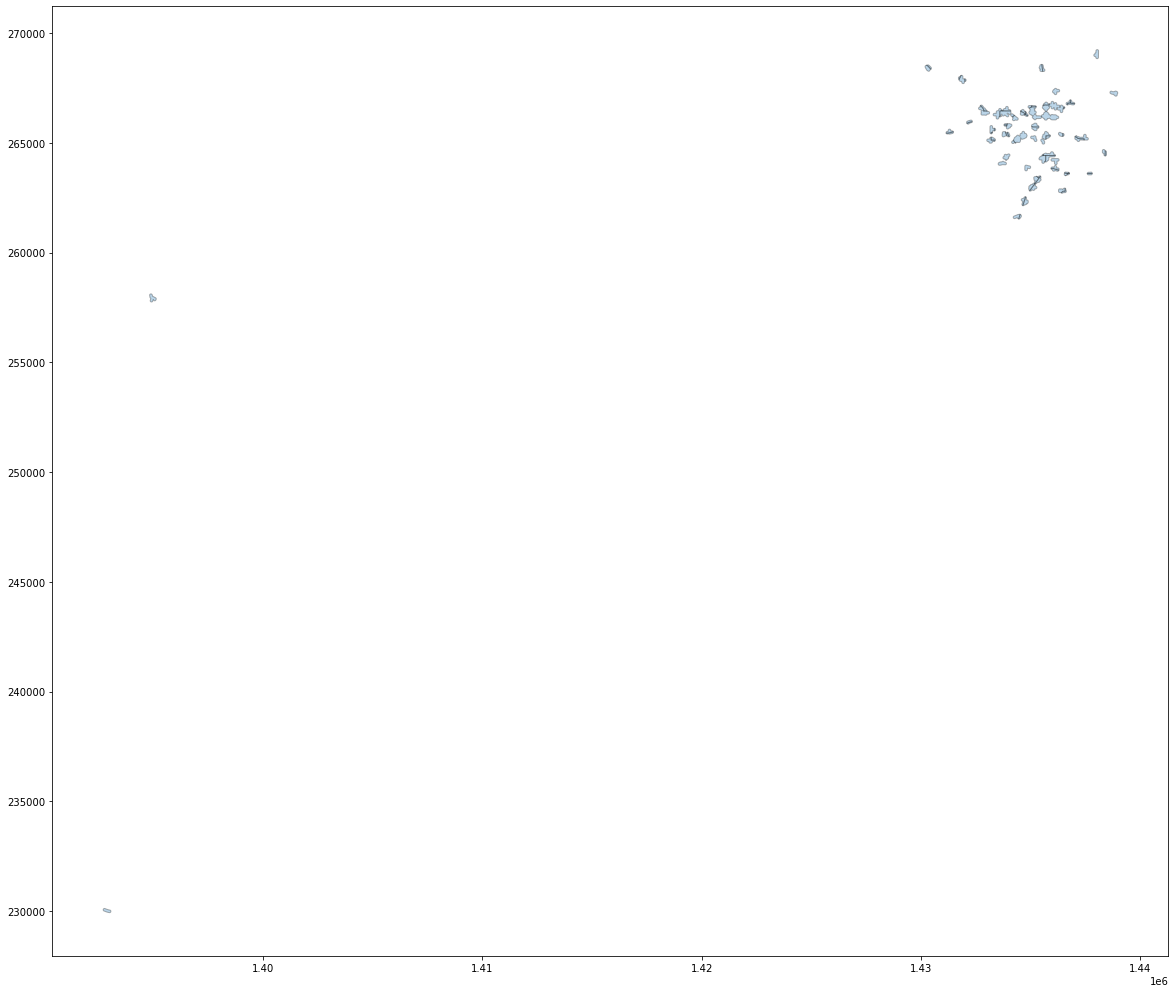

In [774]:
ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [775]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...     INTPTLAT  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...  +44.0495270   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...  +44.0495270   
2             3.0   52.937398  1.726027   0.547945    920.0  ...  +44.0495270   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...  +44.0495270   
4             3.0  152.653300  2.273973   0.835616    295.0  ...  +44.0495270   

       INTPTLON          GISJOIN   Shape_Leng    Shape_Area  AHY2E001  \
0  -121.3099935  G41001700015005  9860.908864  2.125914e+06      1717   
1  -121.3099935  G41001700015005  9860.908864  2.125914e+06      1717   
2  -121.3099935  G41001700015005  9860.908864  2.125914e+06      1717   
3  -121.3099935  G41001700015005  9860.908864  2.125914e+06      1717   
4  -121.3099935  G41001700015005  9860.908864  2.125914e+06      1717   

  AHY2E002 AHY2E003 Total block Area  \
0     1648        0     2.125960e+06   
1     1648        0     2.125960e+06   
2     1648        0     2.125960e+06   
3     1648        0     2.125960e+06   
4     1648        0     2.125960e+06   

                                            geometry  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 26 columns]

In [776]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...   
2             3.0   52.937398  1.726027   0.547945    920.0  ...   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...   
4             3.0  152.653300  2.273973   0.835616    295.0  ...   

           GISJOIN   Shape_Leng    Shape_Area  AHY2E001 AHY2E002  AHY2E003  \
0  G41001700015005  9860.908864  2.125914e+06      1717     1648         0   
1  G41001700015005  9860.908864  2.125914e+06      1717     1648         0   
2  G41001700015005  9860.908864  2.125914e+06      1717     1648         0   
3  G41001700015005  9860.908864  2.125914e+06      1717     1648         0   
4  G41001700015005  9860.908864  2.125914e+06      1717     1648         0   

  Total block Area                                           geometry  \
0     2.125960e+06  POLYGON ((1434519.909 265059.152, 1434517.246 ...   
1     2.125960e+06  POLYGON ((1435184.668 265561.842, 1435181.871 ...   
2     2.125960e+06  POLYGON ((1434623.770 265171.314, 1434618.020 ...   
3     2.125960e+06  POLYGON ((1435684.114 265164.644, 1435678.912 ...   
4     2.125960e+06  POLYGON ((1433941.876 265489.148, 1433947.720 ...   

  buffered area  area factor  
0  72078.089238     0.033904  
1  38943.522402     0.018318  
2  79795.292922     0.037534  
3  65039.473264     0.030593  
4  11623.376470     0.005467  

[5 rows x 28 columns]

In [777]:
output_pct_race= inter_race.loc[:, ['osm_id_sensor', 'AHY2E001','AHY2E002','AHY2E003','area factor']]
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003  area factor
0     48381206.0      1717      1648         0     0.033904
1      5369877.0      1717      1648         0     0.018318
2     48381198.0      1717      1648         0     0.037534
3      5372797.0      1717      1648         0     0.030593
4    142063142.0      1717      1648         0     0.005467

In [778]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AHY2E001   AHY2E002  AHY2E003
0     48381206.0  58.212804  55.873442       0.0
1      5369877.0  31.452160  30.188212       0.0
2     48381198.0  64.445489  61.855659       0.0
3      5372797.0  52.528169  50.417253       0.0
4    142063142.0   9.387448   9.010201       0.0

# Aggregate by ID

In [779]:
output_pct_race=output_pct_race.groupby('osm_id_sensor', as_index=False).sum()
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002  AHY2E003
0      5369529.0   37.677287   36.099768  0.129826
1      5369733.0  148.799611  144.839107  0.087734
2      5369877.0   70.195004   66.106637  0.000000
3      5371320.0   52.528858   50.538497  0.000000
4      5372140.0  174.268703  158.573219  0.000000

# Percentange of White and African American

In [780]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AHY2E002']/output_pct_race['AHY2E001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AHY2E003']/output_pct_race['AHY2E001'])*100
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002  AHY2E003  pct_white  \
0      5369529.0   37.677287   36.099768  0.129826  95.813076   
1      5369733.0  148.799611  144.839107  0.087734  97.338364   
2      5369877.0   70.195004   66.106637  0.000000  94.175702   
3      5371320.0   52.528858   50.538497  0.000000  96.210919   
4      5372140.0  174.268703  158.573219  0.000000  90.993515   

   pct_African_American  
0              0.344573  
1              0.058961  
2              0.000000  
3              0.000000  
4              0.000000

In [781]:
output_pct_race1=output_pct_race.drop(['AHY2E001','AHY2E002','AHY2E003'],axis=1)
output_pct_race1.columns=['osm_id','pct_white','pct_African_American']
output_pct_race1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_white  pct_African_American
0  5369529.0  95.813076              0.344573
1  5369733.0  97.338364              0.058961
2  5369877.0  94.175702              0.000000
3  5371320.0  96.210919              0.000000
4  5372140.0  90.993515              0.000000

# Percentage of Male and Female

In [782]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHYQM040  AHYQM041  AHYQM042  \
0  Baker County        1      NaN     NaN  ...        18        28        15   
1  Baker County        1      NaN     NaN  ...         9        25        15   
2  Baker County        1      NaN     NaN  ...        12        41        28   
3  Baker County        1      NaN     NaN  ...        27        40        26   
4  Baker County        1      NaN     NaN  ...        11        21        12   

   AHYQM043  AHYQM044  AHYQM045  AHYQM046  AHYQM047  AHYQM048  AHYQM049  
0        15        13        11        11        12        15        11  
1        18         9        42        28        25         3         8  
2        36        15        26        22        12        38        15  
3        35        31        24        23        29        12        12  
4        40        30        20        15        12        31        12  

[5 rows x 136 columns]

In [783]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
gender1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHYQM040 AHYQM041 AHYQM042  \
0        S  2.205986e+09  13837275.0  ...       18       28       15   
1        S  1.926901e+08     12317.0  ...        9       25       15   
2        S  4.723892e+08    639439.0  ...       12       41       28   
3        S  1.469016e+07         0.0  ...       27       40       26   
4        S  1.009492e+06         0.0  ...       11       21       12   

   AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
0        15        13       11        11       12        15        11  
1        18         9       42        28       25         3         8  
2        36        15       26        22       12        38        15  
3        35        31       24        23       29        12        12  
4        40        30       20        15       12        31        12  

[5 rows x 152 columns]

In [784]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
464      41      017  000200        1  410170002001  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
504      41      017  001100        1  410170011001  Block Group 1  G5030   
506      41      017  001100        3  410170011003  Block Group 3  G5030   
511      41      017  001300        1  410170013001  Block Group 1  G5030   

    FUNCSTAT         ALAND      AWATER  ... AHYQM040 AHYQM041 AHYQM042  \
464        S  7.320863e+08  66252592.0  ...       43       88       92   
477        S  1.625080e+09  14851164.0  ...       82       38       36   
504        S  1.999877e+07         0.0  ...       54       70       43   
506        S  8.895764e+06         0.0  ...       56      117       44   
511        S  8.938697e+06         0.0  ...      142       85       41   

     AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
464        12        55       42       106       25        12        24  
477        36        11       24        25       81        12         4  
504       101       165       64        85       55        29        15  
506        53        25       66        51       42       100        95  
511        82        32       88        52       12        58        21  

[5 rows x 152 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


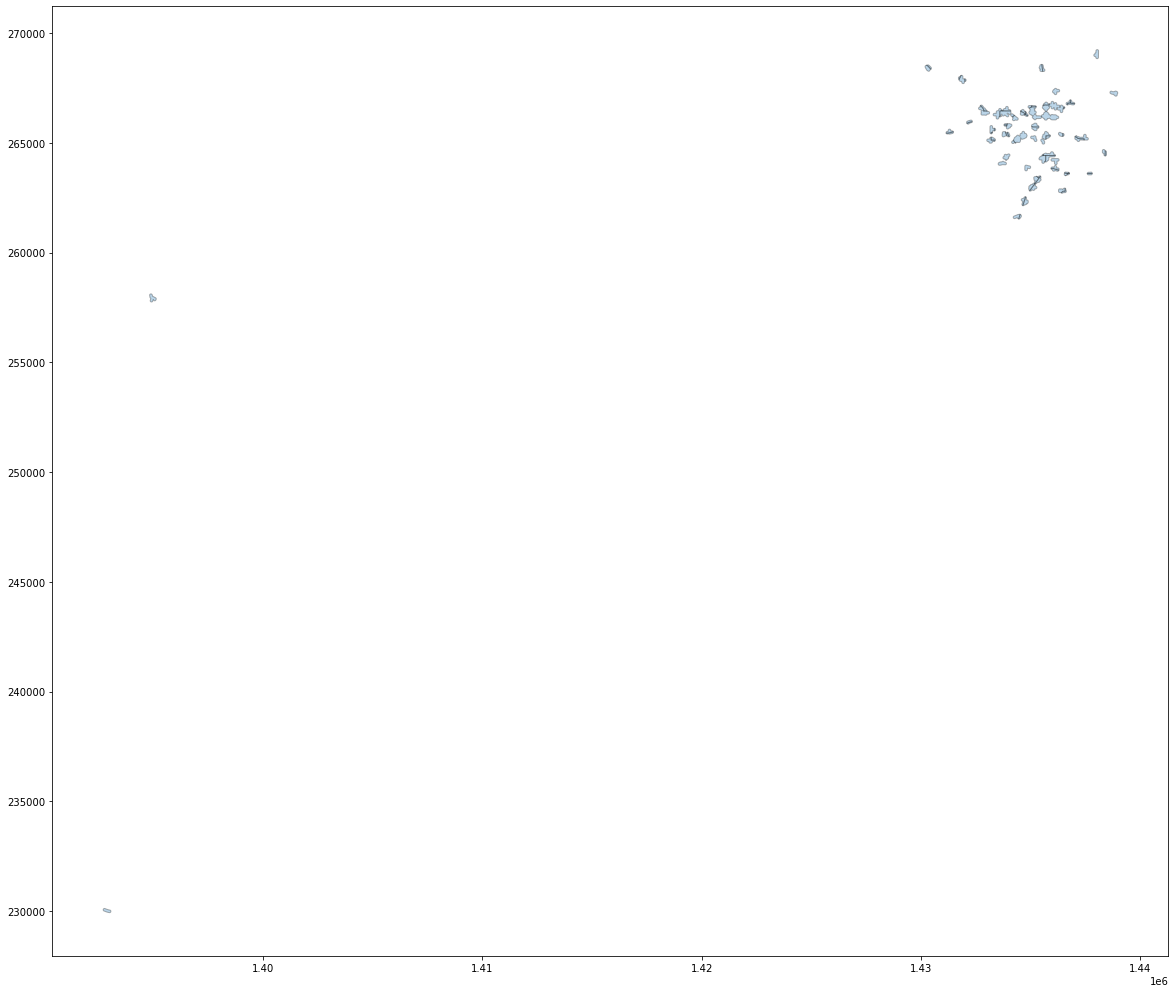

In [785]:
ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [786]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AHYQM041  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        28   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        28   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        28   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        28   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        28   

   AHYQM042 AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047 AHYQM048 AHYQM049  \
0        12       41        34       79        12       12       12       21   
1        12       41        34       79        12       12       12       21   
2        12       41        34       79        12       12       12       21   
3        12       41        34       79        12       12       12       21   
4        12       41        34       79        12       12       12       21   

                                            geometry  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 168 columns]

In [787]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AHYQM043  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        41   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        41   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        41   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        41   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        41   

   AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048 AHYQM049  \
0        34       79        12       12        12       21   
1        34       79        12       12        12       21   
2        34       79        12       12        12       21   
3        34       79        12       12        12       21   
4        34       79        12       12        12       21   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 170 columns]

In [788]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['osm_id_sensor', 'AHYQE001', 'AHYQE002', 'AHYQE026','area factor']]
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHYQE001  AHYQE002  AHYQE026  area factor
0     48381206.0      1717       903       814     0.033904
1      5369877.0      1717       903       814     0.018318
2     48381198.0      1717       903       814     0.037534
3      5372797.0      1717       903       814     0.030593
4    142063142.0      1717       903       814     0.005467

In [789]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AHYQE001   AHYQE002   AHYQE026
0     48381206.0  58.212804  30.615120  27.597683
1      5369877.0  31.452160  16.541235  14.910925
2     48381198.0  64.445489  33.892997  30.552492
3      5372797.0  52.528169  27.625473  24.902697
4    142063142.0   9.387448   4.937021   4.450427

In [790]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHYQE001   AHYQE002   AHYQE026
0      5369529.0   37.677287  18.066743  19.610544
1      5369733.0  148.799611  74.862783  73.936828
2      5369877.0   70.195004  34.528320  35.666683
3      5371320.0   52.528858  24.092590  28.436268
4      5372140.0  174.268703  83.089150  91.179554

In [791]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['AHYQE002']/output_pct_gender['AHYQE001'])*100
output_pct_gender['pct_female']=(output_pct_gender['AHYQE026']/output_pct_gender['AHYQE001'])*100
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHYQE001   AHYQE002   AHYQE026   pct_male  pct_female
0      5369529.0   37.677287  18.066743  19.610544  47.951284   52.048716
1      5369733.0  148.799611  74.862783  73.936828  50.311142   49.688858
2      5369877.0   70.195004  34.528320  35.666683  49.189142   50.810858
3      5371320.0   52.528858  24.092590  28.436268  45.865437   54.134563
4      5372140.0  174.268703  83.089150  91.179554  47.678756   52.321244

In [792]:
output_pct_gender1=output_pct_gender.drop(['AHYQE001', 'AHYQE002', 'AHYQE026'],axis=1)
output_pct_gender1.columns=['osm_id','pct_male','pct_female']
output_pct_gender1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   pct_male  pct_female
0  5369529.0  47.951284   52.048716
1  5369733.0  50.311142   49.688858
2  5369877.0  49.189142   50.810858
3  5371320.0  45.865437   54.134563
4  5372140.0  47.678756   52.321244

# Number of Student (student access) and Education (pct of at least college education population)

In [793]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH04M016  AH04M017  AH04M018  \
0  Baker County        1      NaN     NaN  ...        21        57        17   
1  Baker County        1      NaN     NaN  ...        10        61        19   
2  Baker County        1      NaN     NaN  ...        23        45        41   
3  Baker County        1      NaN     NaN  ...        36        63        23   
4  Baker County        1      NaN     NaN  ...        12        98        34   

   AH04M019  AH04M020  AH04M021  AH04M022  AH04M023  AH04M024  AH04M025  
0        24        66        29        26        13        12         3  
1        35        53        38        23        41        11         2  
2        35        76        37        72        43        22        27  
3        58        30        92        90        36        30        22  
4        46        66        24        87        23        14        12  

[5 rows x 88 columns]

In [794]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AH04M016 AH04M017 AH04M018  \
0        S  2.205986e+09  13837275.0  ...       21       57       17   
1        S  1.926901e+08     12317.0  ...       10       61       19   
2        S  4.723892e+08    639439.0  ...       23       45       41   
3        S  1.469016e+07         0.0  ...       36       63       23   
4        S  1.009492e+06         0.0  ...       12       98       34   

   AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
0        24        66       29        26       13        12         3  
1        35        53       38        23       41        11         2  
2        35        76       37        72       43        22        27  
3        58        30       92        90       36        30        22  
4        46        66       24        87       23        14        12  

[5 rows x 104 columns]

In [795]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
464      41      017  000200        1  410170002001  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
504      41      017  001100        1  410170011001  Block Group 1  G5030   
506      41      017  001100        3  410170011003  Block Group 3  G5030   
511      41      017  001300        1  410170013001  Block Group 1  G5030   

    FUNCSTAT         ALAND      AWATER  ... AH04M016 AH04M017 AH04M018  \
464        S  7.320863e+08  66252592.0  ...       40      157       90   
477        S  1.625080e+09  14851164.0  ...       42      111       68   
504        S  1.999877e+07         0.0  ...       12       90       33   
506        S  8.895764e+06         0.0  ...       17      416       37   
511        S  8.938697e+06         0.0  ...       34      185       12   

     AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
464        59       213       67        99       53        23        24  
477        48       144       37       107       59        28        12  
504       107       333       76       224      155       121        94  
506        95       212      142       367      106        74        17  
511       136       138      156       366      229       127        58  

[5 rows x 104 columns]

In [796]:
#ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [797]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AH04M017  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        96   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        96   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        96   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        96   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        96   

   AH04M018 AH04M019  AH04M020 AH04M021  AH04M022 AH04M023 AH04M024 AH04M025  \
0        28       55        60      108       220      165       64       25   
1        28       55        60      108       220      165       64       25   
2        28       55        60      108       220      165       64       25   
3        28       55        60      108       220      165       64       25   
4        28       55        60      108       220      165       64       25   

                                            geometry  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 120 columns]

In [798]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AH04M019  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        55   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        55   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        55   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        55   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        55   

   AH04M020 AH04M021  AH04M022 AH04M023  AH04M024 AH04M025  \
0        60      108       220      165        64       25   
1        60      108       220      165        64       25   
2        60      108       220      165        64       25   
3        60      108       220      165        64       25   
4        60      108       220      165        64       25   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 122 columns]

In [799]:
# AH04E001,=total, AH04E019:    Some college, less than 1 year
#AH04E020:    Some college, 1 or more years, no degree
#        AH04E021:    Associate's degree
#        AH04E022:    Bachelor's degree
#        AH04E023:    Master's degree
#        AH04E024:    Professional school degree
#        AH04E025:    Doctorate degree

edu_filter=inter_edu.loc[:, ['osm_id_sensor', 'AH04E001', 'AH04E019','AH04E020','AH04E021', 'AH04E022','AH04E023','AH04E024','AH04E025','area factor']]
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AH04E001  AH04E019  AH04E020  AH04E021  AH04E022  AH04E023  \
0     48381206.0      1305        79       113       168       468       214   
1      5369877.0      1305        79       113       168       468       214   
2     48381198.0      1305        79       113       168       468       214   
3      5372797.0      1305        79       113       168       468       214   
4    142063142.0      1305        79       113       168       468       214   

   AH04E024  AH04E025  area factor  
0        47        16     0.033904  
1        47        16     0.018318  
2        47        16     0.037534  
3        47        16     0.030593  
4        47        16     0.005467

In [800]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AH04E001  AH04E019  AH04E020  AH04E021   AH04E022  \
0     48381206.0  44.244443  2.678399  3.831128  5.695836  15.866973   
1      5369877.0  23.905107  1.447129  2.069944  3.077439   8.572866   
2     48381198.0  48.981574  2.965168  4.241316  6.305674  17.565806   
3      5372797.0  39.923856  2.416846  3.457008  5.139623  14.317521   
4    142063142.0   7.134898  0.431921  0.617811  0.918516   2.558722   

   AH04E023  AH04E024  AH04E025  
0  7.255411  1.593478  0.542461  
1  3.920071  0.860950  0.293089  
2  8.032228  1.764087  0.600540  
3  6.546901  1.437871  0.489488  
4  1.170014  0.256966  0.087478

In [801]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH04E001  AH04E019   AH04E020  AH04E021   AH04E022  \
0      5369529.0   25.458631  2.000745   1.881828  2.830192   9.595138   
1      5369733.0   96.109146  4.194177  21.803130  9.073552  17.585041   
2      5369877.0   51.090133  2.877920   8.536376  3.895034  13.998722   
3      5371320.0   32.715607  2.463776   5.820364  4.863550  11.426888   
4      5372140.0  121.982331  5.834231  28.636520  3.562361  23.871123   

    AH04E023  AH04E024  AH04E025  
0   4.973758  1.388585  0.385120  
1   7.412082  0.819451  0.019878  
2   6.986052  0.860950  0.293089  
3   2.052071  0.321333  0.420277  
4  13.579208  0.000000  0.326450

# Number of students 

In [802]:
scll.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALV5M010  ALV5M011  ALV5M012  \
0  Baker County        1      NaN  ...         4         5        18   
1  Baker County        1      NaN  ...        17        18         5   
2  Baker County        1      NaN  ...        16        21        11   
3  Baker County        1      NaN  ...         6        73        46   
4  Baker County        1      NaN  ...        12        18        12   

   ALV5M013  ALV5M014  ALV5M015  ALV5M016  ALV5M017  ALV5M018  ALV5M019  
0        12        12        14        12         4        12       130  
1        12        12         7        12        12        10       116  
2        12         7        21         7        21        18       168  
3        22        23        12        11        30        37       153  
4        12        53        12        40        53        12       178  

[5 rows x 82 columns]

In [803]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
0        S  2.205986e+09  13837275.0  ...        4        5       18   
1        S  1.926901e+08     12317.0  ...       17       18        5   
2        S  4.723892e+08    639439.0  ...       16       21       11   
3        S  1.469016e+07         0.0  ...        6       73       46   
4        S  1.009492e+06         0.0  ...       12       18       12   

   ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
0        12        12       14        12        4       12       130  
1        12        12        7        12       12       10       116  
2        12         7       21         7       21       18       168  
3        22        23       12        11       30       37       153  
4        12        53       12        40       53       12       178  

[5 rows x 98 columns]

In [804]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
464      41      017  000200        1  410170002001  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
504      41      017  001100        1  410170011001  Block Group 1  G5030   
506      41      017  001100        3  410170011003  Block Group 3  G5030   
511      41      017  001300        1  410170013001  Block Group 1  G5030   

    FUNCSTAT         ALAND      AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
464        S  7.320863e+08  66252592.0  ...       12       12       36   
477        S  1.625080e+09  14851164.0  ...       12       12       23   
504        S  1.999877e+07         0.0  ...       49       68       12   
506        S  8.895764e+06         0.0  ...       53       88       23   
511        S  8.938697e+06         0.0  ...      165       27       77   

     ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
464        31        12       12        12       70       12       273  
477        12        12        7        30       50       25       301  
504        12       105       12        16       91       54       593  
506        88        26      128        61      184       17       678  
511        88        40       65        69      128       71       615  

[5 rows x 98 columns]

In [805]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  ALV5M011  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        31   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        31   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        31   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        31   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        31   

   ALV5M012 ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0        59       35        12       12        34       79       14      422   
1        59       35        12       12        34       79       14      422   
2        59       35        12       12        34       79       14      422   
3        59       35        12       12        34       79       14      422   
4        59       35        12       12        34       79       14      422   

                                            geometry  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 114 columns]

In [806]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  ALV5M013  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        35   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        35   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        35   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        35   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        35   

   ALV5M014 ALV5M015  ALV5M016 ALV5M017  ALV5M018 ALV5M019  \
0        12       12        34       79        14      422   
1        12       12        34       79        14      422   
2        12       12        34       79        14      422   
3        12       12        34       79        14      422   
4        12       12        34       79        14      422   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 116 columns]

In [807]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'ALV5E001', 'ALV5E017', 'ALV5E018','area factor']]
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALV5E001  ALV5E017  ALV5E018  area factor
0     48381206.0      1584        85         8     0.033904
1      5369877.0      1584        85         8     0.018318
2     48381198.0      1584        85         8     0.037534
3      5372797.0      1584        85         8     0.030593
4    142063142.0      1584        85         8     0.005467

In [808]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   ALV5E001  ALV5E017  ALV5E018
0     48381206.0  53.703600  2.881822  0.271230
1      5369877.0  29.015854  1.557038  0.146545
2     48381198.0  59.453497  3.190371  0.300270
3      5372797.0  48.459301  2.600404  0.244744
4    142063142.0   8.660290  0.464725  0.043739

In [809]:
scl_filter['total student']=scl_filter['ALV5E017']+scl_filter['ALV5E018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0     48381206.0       3.153052
1      5369877.0       1.703582
2     48381198.0       3.490641
3      5372797.0       2.845148
4    142063142.0       0.508464

In [810]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0      5369529.0       2.163191
1      5369733.0      12.874573
2      5369877.0       4.342184
3      5371320.0       2.184572
4      5372140.0      11.395808

In [811]:
output_student.columns=['osm_id', 'Student Access']
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Student Access
0  5369529.0        2.163191
1  5369733.0       12.874573
2  5369877.0        4.342184
3  5371320.0        2.184572
4  5372140.0       11.395808

# Education ( pct of at least college population)

In [812]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH04E001  AH04E019   AH04E020  AH04E021   AH04E022  \
0      5369529.0   25.458631  2.000745   1.881828  2.830192   9.595138   
1      5369733.0   96.109146  4.194177  21.803130  9.073552  17.585041   
2      5369877.0   51.090133  2.877920   8.536376  3.895034  13.998722   
3      5371320.0   32.715607  2.463776   5.820364  4.863550  11.426888   
4      5372140.0  121.982331  5.834231  28.636520  3.562361  23.871123   

    AH04E023  AH04E024  AH04E025  total_at_least_college_education  
0   4.973758  1.388585  0.385120                         23.055366  
1   7.412082  0.819451  0.019878                         60.907310  
2   6.986052  0.860950  0.293089                         37.448143  
3   2.052071  0.321333  0.420277                         27.368260  
4  13.579208  0.000000  0.326450                         75.809893

In [813]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['AH04E001'])*100
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH04E001  AH04E019   AH04E020  AH04E021   AH04E022  \
0      5369529.0   25.458631  2.000745   1.881828  2.830192   9.595138   
1      5369733.0   96.109146  4.194177  21.803130  9.073552  17.585041   
2      5369877.0   51.090133  2.877920   8.536376  3.895034  13.998722   
3      5371320.0   32.715607  2.463776   5.820364  4.863550  11.426888   
4      5372140.0  121.982331  5.834231  28.636520  3.562361  23.871123   

    AH04E023  AH04E024  AH04E025  total_at_least_college_education  \
0   4.973758  1.388585  0.385120                         23.055366   
1   7.412082  0.819451  0.019878                         60.907310   
2   6.986052  0.860950  0.293089                         37.448143   
3   2.052071  0.321333  0.420277                         27.368260   
4  13.579208  0.000000  0.326450                         75.809893   

   pct_at_least_college_education  
0                       90.560118  
1                       63.373063  
2                       73.298190  
3                       83.655058  
4                       62.148257

In [814]:
output_pct_edu1=output_pct_edu.loc[:,['osm_id_sensor','pct_at_least_college_education']]
output_pct_edu1.columns=['osm_id','pct_at_least_college_education']
output_pct_edu1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_at_least_college_education
0  5369529.0                       90.560118
1  5369733.0                       63.373063
2  5369877.0                       73.298190
3  5371320.0                       83.655058
4  5372140.0                       62.148257

# Median Age

In [815]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  BTTRA  BTBGA  \
0  Baker County        1      NaN     NaN  ...    NaN    NaN   
1  Baker County        1      NaN     NaN  ...    NaN    NaN   
2  Baker County        1      NaN     NaN  ...    NaN    NaN   
3  Baker County        1      NaN     NaN  ...    NaN    NaN   
4  Baker County        1      NaN     NaN  ...    NaN    NaN   

                                              NAME_E  AHYRE001  AHYRE002  \
0  Block Group 1, Census Tract 9501, Baker County...      55.6      58.3   
1  Block Group 2, Census Tract 9501, Baker County...      46.1      48.2   
2  Block Group 3, Census Tract 9501, Baker County...      54.8      55.3   
3  Block Group 1, Census Tract 9502, Baker County...      47.9      45.8   
4  Block Group 2, Census Tract 9502, Baker County...      40.6      33.2   

   AHYRE003                                             NAME_M  AHYRM001  \
0      50.9  Block Group 1, Census Tract 9501, Baker County...       5.3   
1      45.7  Block Group 2, Census Tract 9501, Baker County...      13.5   
2      54.5  Block Group 3, Census Tract 9501, Baker County...       7.7   
3      48.0  Block Group 1, Census Tract 9502, Baker County...      10.5   
4      43.5  Block Group 2, Census Tract 9502, Baker County...      11.8   

   AHYRM002  AHYRM003  
0       2.7      10.6  
1      16.4      17.6  
2       9.1      11.4  
3      23.0       9.2  
4      16.1      10.4  

[5 rows x 44 columns]

In [816]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
age1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... BTTRA BTBGA  \
0        S  2.205986e+09  13837275.0  ...   NaN   NaN   
1        S  1.926901e+08     12317.0  ...   NaN   NaN   
2        S  4.723892e+08    639439.0  ...   NaN   NaN   
3        S  1.469016e+07         0.0  ...   NaN   NaN   
4        S  1.009492e+06         0.0  ...   NaN   NaN   

                                              NAME_E  AHYRE001  AHYRE002  \
0  Block Group 1, Census Tract 9501, Baker County...      55.6      58.3   
1  Block Group 2, Census Tract 9501, Baker County...      46.1      48.2   
2  Block Group 3, Census Tract 9501, Baker County...      54.8      55.3   
3  Block Group 1, Census Tract 9502, Baker County...      47.9      45.8   
4  Block Group 2, Census Tract 9502, Baker County...      40.6      33.2   

  AHYRE003                                             NAME_M AHYRM001  \
0     50.9  Block Group 1, Census Tract 9501, Baker County...      5.3   
1     45.7  Block Group 2, Census Tract 9501, Baker County...     13.5   
2     54.5  Block Group 3, Census Tract 9501, Baker County...      7.7   
3     48.0  Block Group 1, Census Tract 9502, Baker County...     10.5   
4     43.5  Block Group 2, Census Tract 9502, Baker County...     11.8   

   AHYRM002  AHYRM003  
0       2.7      10.6  
1      16.4      17.6  
2       9.1      11.4  
3      23.0       9.2  
4      16.1      10.4  

[5 rows x 60 columns]

In [817]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
464      41      017  000200        1  410170002001  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
504      41      017  001100        1  410170011001  Block Group 1  G5030   
506      41      017  001100        3  410170011003  Block Group 3  G5030   
511      41      017  001300        1  410170013001  Block Group 1  G5030   

    FUNCSTAT         ALAND      AWATER  ... BTTRA BTBGA  \
464        S  7.320863e+08  66252592.0  ...   NaN   NaN   
477        S  1.625080e+09  14851164.0  ...   NaN   NaN   
504        S  1.999877e+07         0.0  ...   NaN   NaN   
506        S  8.895764e+06         0.0  ...   NaN   NaN   
511        S  8.938697e+06         0.0  ...   NaN   NaN   

                                                NAME_E  AHYRE001  AHYRE002  \
464  Block Group 1, Census Tract 2, Deschutes Count...      61.6      66.3   
477  Block Group 1, Census Tract 5, Deschutes Count...      53.5      52.8   
504  Block Group 1, Census Tract 11, Deschutes Coun...      56.1      50.9   
506  Block Group 3, Census Tract 11, Deschutes Coun...      36.5      40.4   
511  Block Group 1, Census Tract 13, Deschutes Coun...      39.9      39.5   

    AHYRE003                                             NAME_M AHYRM001  \
464     60.9  Block Group 1, Census Tract 2, Deschutes Count...      6.5   
477     53.6  Block Group 1, Census Tract 5, Deschutes Count...      9.4   
504     59.5  Block Group 1, Census Tract 11, Deschutes Coun...     10.0   
506     34.1  Block Group 3, Census Tract 11, Deschutes Coun...      7.1   
511     40.1  Block Group 1, Census Tract 13, Deschutes Coun...      3.4   

     AHYRM002  AHYRM003  
464       4.1       3.1  
477      13.6       9.2  
504       9.1       9.0  
506       6.0       7.3  
511      10.6       4.5  

[5 rows x 60 columns]

In [818]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  BTBGA  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...    NaN   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...    NaN   
2             3.0   52.937398  1.726027   0.547945    920.0  ...    NaN   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...    NaN   
4             3.0  152.653300  2.273973   0.835616    295.0  ...    NaN   

                                              NAME_E AHYRE001  AHYRE002  \
0  Block Group 5, Census Tract 15, Deschutes Coun...     40.6      42.7   
1  Block Group 5, Census Tract 15, Deschutes Coun...     40.6      42.7   
2  Block Group 5, Census Tract 15, Deschutes Coun...     40.6      42.7   
3  Block Group 5, Census Tract 15, Deschutes Coun...     40.6      42.7   
4  Block Group 5, Census Tract 15, Deschutes Coun...     40.6      42.7   

  AHYRE003                                             NAME_M AHYRM001  \
0     40.1  Block Group 5, Census Tract 15, Deschutes Coun...      6.3   
1     40.1  Block Group 5, Census Tract 15, Deschutes Coun...      6.3   
2     40.1  Block Group 5, Census Tract 15, Deschutes Coun...      6.3   
3     40.1  Block Group 5, Census Tract 15, Deschutes Coun...      6.3   
4     40.1  Block Group 5, Census Tract 15, Deschutes Coun...      6.3   

  AHYRM002 AHYRM003                                           geometry  
0      7.5      8.6  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1      7.5      8.6  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2      7.5      8.6  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3      7.5      8.6  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4      7.5      8.6  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 76 columns]

In [819]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AHYRE001  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...      40.6   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...      40.6   
2             3.0   52.937398  1.726027   0.547945    920.0  ...      40.6   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...      40.6   
4             3.0  152.653300  2.273973   0.835616    295.0  ...      40.6   

   AHYRE002 AHYRE003                                             NAME_M  \
0      42.7     40.1  Block Group 5, Census Tract 15, Deschutes Coun...   
1      42.7     40.1  Block Group 5, Census Tract 15, Deschutes Coun...   
2      42.7     40.1  Block Group 5, Census Tract 15, Deschutes Coun...   
3      42.7     40.1  Block Group 5, Census Tract 15, Deschutes Coun...   
4      42.7     40.1  Block Group 5, Census Tract 15, Deschutes Coun...   

  AHYRM001  AHYRM002 AHYRM003  \
0      6.3       7.5      8.6   
1      6.3       7.5      8.6   
2      6.3       7.5      8.6   
3      6.3       7.5      8.6   
4      6.3       7.5      8.6   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 78 columns]

In [820]:
#    Table 1:     Median Age by Sex
#    Universe:    Total population
#    Source code: B01002
#    NHGIS code:  ALT1
#        ALT1E001:    Median age: Total
#        ALT1E002:    Median age: Male
#        ALT1E003:    Median age: Female
age_filter=inter_age.loc[:, ['osm_id_sensor','GEOID','AHYRE001']]
age_filter.columns=['osm_id_sensor','GEOID','AHYRE001']
age_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHYRE001
0     48381206.0  410170015005      40.6
1      5369877.0  410170015005      40.6
2     48381198.0  410170015005      40.6
3      5372797.0  410170015005      40.6
4    142063142.0  410170015005      40.6

In [821]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [822]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [823]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [824]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  SDELMA  SDSECA  SDUNIA  \
0  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
1  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
2  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
3  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
4  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   

   PUMA5A  BTTRA  BTBGA                                             NAME_E  \
0     NaN    NaN    NaN  Block Group 1, Census Tract 9501, Baker County...   
1     NaN    NaN    NaN  Block Group 2, Census Tract 9501, Baker County...   
2     NaN    NaN    NaN  Block Group 3, Census Tract 9501, Baker County...   
3     NaN    NaN    NaN  Block Group 1, Census Tract 9502, Baker County...   
4     NaN    NaN    NaN  Block Group 2, Census Tract 9502, Baker County...   

   AH1PE001                                             NAME_M  AH1PM001  
0   40156.0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1   34000.0  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2   62266.0  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3   78558.0  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4   43625.0  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 40 columns]

In [825]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  BTTRA  \
0        S  2.205986e+09  13837275.0  ...    NaN    NaN    NaN     NaN    NaN   
1        S  1.926901e+08     12317.0  ...    NaN    NaN    NaN     NaN    NaN   
2        S  4.723892e+08    639439.0  ...    NaN    NaN    NaN     NaN    NaN   
3        S  1.469016e+07         0.0  ...    NaN    NaN    NaN     NaN    NaN   
4        S  1.009492e+06         0.0  ...    NaN    NaN    NaN     NaN    NaN   

  BTBGA                                             NAME_E AH1PE001  \
0   NaN  Block Group 1, Census Tract 9501, Baker County...  40156.0   
1   NaN  Block Group 2, Census Tract 9501, Baker County...  34000.0   
2   NaN  Block Group 3, Census Tract 9501, Baker County...  62266.0   
3   NaN  Block Group 1, Census Tract 9502, Baker County...  78558.0   
4   NaN  Block Group 2, Census Tract 9502, Baker County...  43625.0   

                                              NAME_M  AH1PM001  
0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 56 columns]

In [826]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
464      41      017  000200        1  410170002001  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
504      41      017  001100        1  410170011001  Block Group 1  G5030   
506      41      017  001100        3  410170011003  Block Group 3  G5030   
511      41      017  001300        1  410170013001  Block Group 1  G5030   

    FUNCSTAT         ALAND      AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  \
464        S  7.320863e+08  66252592.0  ...    NaN    NaN    NaN     NaN   
477        S  1.625080e+09  14851164.0  ...    NaN    NaN    NaN     NaN   
504        S  1.999877e+07         0.0  ...    NaN    NaN    NaN     NaN   
506        S  8.895764e+06         0.0  ...    NaN    NaN    NaN     NaN   
511        S  8.938697e+06         0.0  ...    NaN    NaN    NaN     NaN   

     BTTRA BTBGA                                             NAME_E AH1PE001  \
464    NaN   NaN  Block Group 1, Census Tract 2, Deschutes Count...  49583.0   
477    NaN   NaN  Block Group 1, Census Tract 5, Deschutes Count...  57750.0   
504    NaN   NaN  Block Group 1, Census Tract 11, Deschutes Coun...  69634.0   
506    NaN   NaN  Block Group 3, Census Tract 11, Deschutes Coun...  74655.0   
511    NaN   NaN  Block Group 1, Census Tract 13, Deschutes Coun...  78250.0   

                                                NAME_M  AH1PM001  
464  Block Group 1, Census Tract 2, Deschutes Count...   24893.0  
477  Block Group 1, Census Tract 5, Deschutes Count...   30741.0  
504  Block Group 1, Census Tract 11, Deschutes Coun...   11670.0  
506  Block Group 3, Census Tract 11, Deschutes Coun...    9983.0  
511  Block Group 1, Census Tract 13, Deschutes Coun...   13657.0  

[5 rows x 56 columns]

In [827]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...     NaN   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...     NaN   
2             3.0   52.937398  1.726027   0.547945    920.0  ...     NaN   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...     NaN   
4             3.0  152.653300  2.273973   0.835616    295.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E AH1PE001  \
0  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   
1  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   
2  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   
3  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   
4  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   

                                              NAME_M AH1PM001  \
0  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   
1  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   
2  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   
3  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   
4  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   

                                            geometry  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 72 columns]

In [828]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...     NaN   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...     NaN   
2             3.0   52.937398  1.726027   0.547945    920.0  ...     NaN   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...     NaN   
4             3.0  152.653300  2.273973   0.835616    295.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E AH1PE001  \
0    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   
1    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   
2    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   
3    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   
4    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...  57395.0   

                                              NAME_M AH1PM001  \
0  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   
1  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   
2  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   
3  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   
4  Block Group 5, Census Tract 15, Deschutes Coun...  15226.0   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 74 columns]

In [829]:
income_filter=inter_income.loc[:, ['osm_id_sensor','GEOID', 'AH1PE001','area factor']]
income_filter.columns=['osm_id_sensor','GEOID', 'AH1PE001','area factor']
income_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor
0     48381206.0  410170015005   57395.0     0.033904
1      5369877.0  410170015005   57395.0     0.018318
2     48381198.0  410170015005   57395.0     0.037534
3      5372797.0  410170015005   57395.0     0.030593
4    142063142.0  410170015005   57395.0     0.005467

# HH_density

In [830]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  \
0  Baker County        1      NaN     NaN  ...   
1  Baker County        1      NaN     NaN  ...   
2  Baker County        1      NaN     NaN  ...   
3  Baker County        1      NaN     NaN  ...   
4  Baker County        1      NaN     NaN  ...   

                                              NAME_M  AHZZM001  AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...        70        65   
1  Block Group 2, Census Tract 9501, Baker County...        69        49   
2  Block Group 3, Census Tract 9501, Baker County...        61        63   
3  Block Group 1, Census Tract 9502, Baker County...        80        80   
4  Block Group 2, Census Tract 9502, Baker County...        85        69   

   AHZZM003  AHZZM004  AHZZM005  AHZZM006  AHZZM007  AHZZM008  AHZZM009  
0        67         7         2         7        53        47        19  
1        49        32        17        28        62        61        12  
2        63        37         8        37        36        29        23  
3        78        35        12        35        33        33        12  
4        69        38        38        24        82        78        21  

[5 rows x 56 columns]

In [831]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ...  \
0        S  2.205986e+09  13837275.0  ...   
1        S  1.926901e+08     12317.0  ...   
2        S  4.723892e+08    639439.0  ...   
3        S  1.469016e+07         0.0  ...   
4        S  1.009492e+06         0.0  ...   

                                              NAME_M AHZZM001 AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...       70       65   
1  Block Group 2, Census Tract 9501, Baker County...       69       49   
2  Block Group 3, Census Tract 9501, Baker County...       61       63   
3  Block Group 1, Census Tract 9502, Baker County...       80       80   
4  Block Group 2, Census Tract 9502, Baker County...       85       69   

   AHZZM003  AHZZM004 AHZZM005  AHZZM006 AHZZM007  AHZZM008  AHZZM009  
0        67         7        2         7       53        47        19  
1        49        32       17        28       62        61        12  
2        63        37        8        37       36        29        23  
3        78        35       12        35       33        33        12  
4        69        38       38        24       82        78        21  

[5 rows x 72 columns]

In [832]:
hhdensity1['Total Block HH']=hhdensity1.AHZZE001
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
0        S  2.205986e+09  13837275.0  ...       70       65       67   
1        S  1.926901e+08     12317.0  ...       69       49       49   
2        S  4.723892e+08    639439.0  ...       61       63       63   
3        S  1.469016e+07         0.0  ...       80       80       78   
4        S  1.009492e+06         0.0  ...       85       69       69   

   AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
0         7         2        7        53       47        19             448  
1        32        17       28        62       61        12             402  
2        37         8       37        36       29        23             448  
3        35        12       35        33       33        12             439  
4        38        38       24        82       78        21             447  

[5 rows x 73 columns]

In [833]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
464      41      017  000200        1  410170002001  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
504      41      017  001100        1  410170011001  Block Group 1  G5030   
506      41      017  001100        3  410170011003  Block Group 3  G5030   
511      41      017  001300        1  410170013001  Block Group 1  G5030   

    FUNCSTAT         ALAND      AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
464        S  7.320863e+08  66252592.0  ...      173      117      119   
477        S  1.625080e+09  14851164.0  ...      146      158      159   
504        S  1.999877e+07         0.0  ...      211      201      206   
506        S  8.895764e+06         0.0  ...      211      229      225   
511        S  8.938697e+06         0.0  ...      267      268      227   

     AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
464        34        24       28       144      123        77             764  
477        49        27       41        84       84        12             585  
504        60        56       20        99      109        44            1216  
506       168        77      160       169      133        89            2155  
511       200        49      206       196      162       140            1954  

[5 rows x 73 columns]

In [834]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AHZZM002  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...       133   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...       133   
2             3.0   52.937398  1.726027   0.547945    920.0  ...       133   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...       133   
4             3.0  152.653300  2.273973   0.835616    295.0  ...       133   

   AHZZM003 AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008 AHZZM009  \
0       133       12        12       12       152      127      111   
1       133       12        12       12       152      127      111   
2       133       12        12       12       152      127      111   
3       133       12        12       12       152      127      111   
4       133       12        12       12       152      127      111   

  Total Block HH                                           geometry  
0            897  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1            897  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2            897  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3            897  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4            897  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 89 columns]

In [835]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AHZZM004  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        12   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        12   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        12   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        12   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        12   

   AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009 Total Block HH  \
0        12       12       152      127       111            897   
1        12       12       152      127       111            897   
2        12       12       152      127       111            897   
3        12       12       152      127       111            897   
4        12       12       152      127       111            897   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 91 columns]

In [836]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['osm_id_sensor',"GEOID","Total Block HH",'buffered area']]
hh.columns=['osm_id_sensor',"GEOID","Total Block HH",'buffered area']
hh.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  Total Block HH  buffered area
0     48381206.0  410170015005             897   72078.089238
1      5369877.0  410170015005             897   38943.522402
2     48381198.0  410170015005             897   79795.292922
3      5372797.0  410170015005             897   65039.473264
4    142063142.0  410170015005             897   11623.376470

In [837]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['osm_id_sensor', 'GEOID','AHZZE001','area factor']]
hhdensity_filter.columns=['osm_id_sensor', 'GEOID','AHZZE001','area factor']
hh_factor=hhdensity_filter.copy()
hh_factor.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHZZE001  area factor
0     48381206.0  410170015005       897     0.033904
1      5369877.0  410170015005       897     0.018318
2     48381198.0  410170015005       897     0.037534
3      5372797.0  410170015005       897     0.030593
4    142063142.0  410170015005       897     0.005467

In [838]:
hh_factor["buffered_hh"]=hh_factor['AHZZE001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['AHZZE001']
hh_factor.head() # factor is basically same

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHZZE001  area factor  buffered_hh  hh factor
0     48381206.0  410170015005       897     0.033904    30.411698   0.033904
1      5369877.0  410170015005       897     0.018318    16.431327   0.018318
2     48381198.0  410170015005       897     0.037534    33.667795   0.037534
3      5372797.0  410170015005       897     0.030593    27.441915   0.030593
4    142063142.0  410170015005       897     0.005467     4.904217   0.005467

In [839]:
hh_factor1=hh_factor.loc[:,["osm_id_sensor","GEOID","buffered_hh"]]
hh_factor1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  buffered_hh
0     48381206.0  410170015005    30.411698
1      5369877.0  410170015005    16.431327
2     48381198.0  410170015005    33.667795
3      5372797.0  410170015005    27.441915
4    142063142.0  410170015005     4.904217

In [840]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID   AHZZE001
0     48381206.0  410170015005  30.411698
1      5369877.0  410170015005  16.431327
2     48381198.0  410170015005  33.667795
3      5372797.0  410170015005  27.441915
4    142063142.0  410170015005   4.904217

In [841]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AHZZE001
0      5369529.0  14.871598
1      5369733.0  55.337575
2      5369877.0  33.173438
3      5371320.0  19.354438
4      5372140.0  74.764433

In [842]:
# Aggregate by ID
output_hhdensity=pd.merge(output_hhdensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_hhdensity=output_hhdensity.loc[:,['osm_id_sensor','AHZZE001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [843]:
output_hhdensity['HH_density']=output_hhdensity.AHZZE001/output_hhdensity.buffer_area
output_hhdensity.head()

osm_id_sensor   AHZZE001  buffer_area   HH_density
0      5369529.0  14.871598     0.027437   542.028672
1      5369733.0  55.337575     0.033515  1651.145286
2      5369877.0  33.173438     0.030584  1084.678535
3      5371320.0  19.354438     0.023271   831.693857
4      5372140.0  74.764433     0.038157  1959.364511

In [844]:
output_hhdensity1=output_hhdensity.loc[:, ['osm_id_sensor', 'HH_density']]
output_hhdensity1.columns=['osm_id', 'HH_density']
output_hhdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   HH_density
0  5369529.0   542.028672
1  5369733.0  1651.145286
2  5369877.0  1084.678535
3  5371320.0   831.693857
4  5372140.0  1959.364511

# Weighted HH_income

In [845]:
whh_income=pd.merge(income_filter, hh_factor1, on=['osm_id_sensor', 'GEOID'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor  buffered_hh
0     48381206.0  410170015005   57395.0     0.033904    30.411698
1      5369877.0  410170015005   57395.0     0.018318    16.431327
2     48381198.0  410170015005   57395.0     0.037534    33.667795
3      5372797.0  410170015005   57395.0     0.030593    27.441915
4    142063142.0  410170015005   57395.0     0.005467     4.904217

In [846]:
whh_income['wt_incme']=whh_income['AH1PE001'].mul(whh_income['buffered_hh'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor  buffered_hh  \
0     48381206.0  410170015005   57395.0     0.033904    30.411698   
1      5369877.0  410170015005   57395.0     0.018318    16.431327   
2     48381198.0  410170015005   57395.0     0.037534    33.667795   
3      5372797.0  410170015005   57395.0     0.030593    27.441915   
4    142063142.0  410170015005   57395.0     0.005467     4.904217   

       wt_incme  
0  1.745479e+06  
1  9.430760e+05  
2  1.932363e+06  
3  1.575029e+06  
4  2.814776e+05

In [847]:
income_filter=whh_income.drop(['GEOID','AH1PE001','area factor'],axis=1)
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0     48381206.0    30.411698  1.745479e+06
1      5369877.0    16.431327  9.430760e+05
2     48381198.0    33.667795  1.932363e+06
3      5372797.0    27.441915  1.575029e+06
4    142063142.0     4.904217  2.814776e+05

In [848]:
# Aggregate by ID
income_filter=income_filter.groupby('osm_id_sensor', as_index=False).sum()
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0      5369529.0    14.871598  1.149303e+06
1      5369733.0    55.337575  1.857836e+06
2      5369877.0    33.173438  1.662886e+06
3      5371320.0    19.354438  1.062243e+06
4      5372140.0   143.032508  6.121488e+06

In [849]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme  HH weighted income
0      5369529.0    14.871598  1.149303e+06        77281.722580
1      5369733.0    55.337575  1.857836e+06        33572.775941
2      5369877.0    33.173438  1.662886e+06        50127.042302
3      5371320.0    19.354438  1.062243e+06        54883.692291
4      5372140.0   143.032508  6.121488e+06        42797.881853

In [850]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['osm_id', 'Median_HH_income']
output_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median_HH_income
0  5369529.0      77281.722580
1  5369733.0      33572.775941
2  5369877.0      50127.042302
3  5371320.0      54883.692291
4  5372140.0      42797.881853

# Population Density

In [851]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...     NaN   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...     NaN   
2             3.0   52.937398  1.726027   0.547945    920.0  ...     NaN   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...     NaN   
4             3.0  152.653300  2.273973   0.835616    295.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E AHY1E001  \
0  Block Group 5, Census Tract 15, Deschutes Coun...     1717   
1  Block Group 5, Census Tract 15, Deschutes Coun...     1717   
2  Block Group 5, Census Tract 15, Deschutes Coun...     1717   
3  Block Group 5, Census Tract 15, Deschutes Coun...     1717   
4  Block Group 5, Census Tract 15, Deschutes Coun...     1717   

                                              NAME_M AHY1M001  \
0  Block Group 5, Census Tract 15, Deschutes Coun...      378   
1  Block Group 5, Census Tract 15, Deschutes Coun...      378   
2  Block Group 5, Census Tract 15, Deschutes Coun...      378   
3  Block Group 5, Census Tract 15, Deschutes Coun...      378   
4  Block Group 5, Census Tract 15, Deschutes Coun...      378   

                                            geometry  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 72 columns]

In [852]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...     NaN   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...     NaN   
2             3.0   52.937398  1.726027   0.547945    920.0  ...     NaN   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...     NaN   
4             3.0  152.653300  2.273973   0.835616    295.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E AHY1E001  \
0    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...     1717   
1    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...     1717   
2    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...     1717   
3    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...     1717   
4    NaN   NaN  Block Group 5, Census Tract 15, Deschutes Coun...     1717   

                                              NAME_M AHY1M001  \
0  Block Group 5, Census Tract 15, Deschutes Coun...      378   
1  Block Group 5, Census Tract 15, Deschutes Coun...      378   
2  Block Group 5, Census Tract 15, Deschutes Coun...      378   
3  Block Group 5, Census Tract 15, Deschutes Coun...      378   
4  Block Group 5, Census Tract 15, Deschutes Coun...      378   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 74 columns]

In [853]:
pdensity_filter=inter_pdensity.loc[:, ['osm_id_sensor', 'AHY1E001','area factor']]
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY1E001  area factor
0     48381206.0      1717     0.033904
1      5369877.0      1717     0.018318
2     48381198.0      1717     0.037534
3      5372797.0      1717     0.030593
4    142063142.0      1717     0.005467

In [854]:
age_pop=inter_pdensity.loc[:, ['osm_id_sensor', 'GEOID','AHY1E001','area factor']]
age_pop.columns=['osm_id_sensor', 'GEOID','AHY1E001','area factor']
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID   AHY1E001  area factor
0     48381206.0  410170015005  58.212804     0.033904
1      5369877.0  410170015005  31.452160     0.018318
2     48381198.0  410170015005  64.445489     0.037534
3      5372797.0  410170015005  52.528169     0.030593
4    142063142.0  410170015005   9.387448     0.005467

In [855]:
pp=inter_pdensity.loc[:, ['osm_id_sensor','GEOID', 'AHY1E001','area factor']]
pp.columns=['osm_id_sensor','GEOID', 'AHY1E001','area factor']
pp.columns=['osm_id','GEOID', 'AHY1E001','pp factor']
pp1=pp.loc[:,["osm_id",'GEOID',"pp factor"]]
pp1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         GEOID  pp factor
0   48381206.0  410170015005   0.033904
1    5369877.0  410170015005   0.018318
2   48381198.0  410170015005   0.037534
3    5372797.0  410170015005   0.030593
4  142063142.0  410170015005   0.005467

In [856]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AHY1E001
0     48381206.0  58.212804
1      5369877.0  31.452160
2     48381198.0  64.445489
3      5372797.0  52.528169
4    142063142.0   9.387448

In [857]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pdensity=pd.merge(output_pdensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_pdensity=output_pdensity.loc[:,['osm_id_sensor','AHY1E001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [858]:
output_pdensity['population_density']=output_pdensity.AHY1E001/output_pdensity.buffer_area
output_pdensity.head()

osm_id_sensor    AHY1E001  buffer_area  population_density
0      5369529.0   37.677287     0.027437         1373.233097
1      5369733.0  148.799611     0.033515         4439.836324
2      5369877.0   70.195004     0.030584         2295.180081
3      5371320.0   52.528858     0.023271         2257.256383
4      5372140.0  174.268703     0.038157         4567.090265

In [859]:
output_pdensity1=output_pdensity.loc[:, ['osm_id_sensor', 'population_density']]
output_pdensity1.columns=['osm_id', 'population_density']
output_pdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  population_density
0  5369529.0         1373.233097
1  5369733.0         4439.836324
2  5369877.0         2295.180081
3  5371320.0         2257.256383
4  5372140.0         4567.090265

# Weighted Median Age

In [860]:
w_age=pd.merge(age_pop,age_filter,on=["osm_id_sensor","GEOID"])
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID   AHY1E001  area factor  AHYRE001
0     48381206.0  410170015005  58.212804     0.033904      40.6
1      5369877.0  410170015005  31.452160     0.018318      40.6
2     48381198.0  410170015005  64.445489     0.037534      40.6
3      5372797.0  410170015005  52.528169     0.030593      40.6
4    142063142.0  410170015005   9.387448     0.005467      40.6

In [861]:
w_age['w_age']=(w_age['AHY1E001'].mul(w_age['AHYRE001'],axis=0))
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID   AHY1E001  area factor  AHYRE001        w_age
0     48381206.0  410170015005  58.212804     0.033904      40.6  2363.439825
1      5369877.0  410170015005  31.452160     0.018318      40.6  1276.957710
2     48381198.0  410170015005  64.445489     0.037534      40.6  2616.486857
3      5372797.0  410170015005  52.528169     0.030593      40.6  2132.643678
4    142063142.0  410170015005   9.387448     0.005467      40.6   381.130398

In [862]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','AHYRE001','area factor'],axis=1)
age_filter1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AHY1E001        w_age
0     48381206.0  58.212804  2363.439825
1      5369877.0  31.452160  1276.957710
2     48381198.0  64.445489  2616.486857
3      5372797.0  52.528169  2132.643678
4    142063142.0   9.387448   381.130398

In [863]:
# Aggregate by ID
output_median_age=age_filter1.groupby('osm_id_sensor', as_index=False).sum()
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY1E001         w_age
0      5369529.0   37.677287   1507.042952
1      5369733.0  148.799611   4566.851108
2      5369877.0   70.195004   2594.214378
3      5371320.0   52.528858   1851.319487
4      5372140.0  332.247546  11275.239733

In [864]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['AHY1E001']
output_median_age=output_median_age.drop(['AHY1E001','w_age'],axis=1)
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  median weighted age
0      5369529.0            39.998712
1      5369733.0            30.691284
2      5369877.0            36.957251
3      5371320.0            35.243856
4      5372140.0            33.936262

In [865]:
output_median_age.columns=["osm_id","Median Age"]
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median Age
0  5369529.0   39.998712
1  5369733.0   30.691284
2  5369877.0   36.957251
3  5371320.0   35.243856
4  5372140.0   33.936262

# Employment Density

In [866]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH3PE006  AH3PE007  \
0  Baker County        1      NaN     NaN  ...         0       444   
1  Baker County        1      NaN     NaN  ...         0       344   
2  Baker County        1      NaN     NaN  ...         0       469   
3  Baker County        1      NaN     NaN  ...         0       372   
4  Baker County        1      NaN     NaN  ...         0       289   

                                              NAME_M  AH3PM001  AH3PM002  \
0  Block Group 1, Census Tract 9501, Baker County...       138        91   
1  Block Group 2, Census Tract 9501, Baker County...       109        84   
2  Block Group 3, Census Tract 9501, Baker County...       129        80   
3  Block Group 1, Census Tract 9502, Baker County...       172       160   
4  Block Group 2, Census Tract 9502, Baker County...       170       161   

   AH3PM003  AH3PM004  AH3PM005  AH3PM006  AH3PM007  
0        91        94        25        12        96  
1        84        81        11        12        89  
2        80        80        22        12       107  
3       160       155        44        12        90  
4       161       120        90        12        76  

[5 rows x 52 columns]

In [867]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AH3PE007  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...       475   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...       475   
2             3.0   52.937398  1.726027   0.547945    920.0  ...       475   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...       475   
4             3.0  152.653300  2.273973   0.835616    295.0  ...       475   

                                              NAME_M AH3PM001  AH3PM002  \
0  Block Group 5, Census Tract 15, Deschutes Coun...      342       274   
1  Block Group 5, Census Tract 15, Deschutes Coun...      342       274   
2  Block Group 5, Census Tract 15, Deschutes Coun...      342       274   
3  Block Group 5, Census Tract 15, Deschutes Coun...      342       274   
4  Block Group 5, Census Tract 15, Deschutes Coun...      342       274   

  AH3PM003  AH3PM004 AH3PM005 AH3PM006 AH3PM007  \
0      274       274       28       12      217   
1      274       274       28       12      217   
2      274       274       28       12      217   
3      274       274       28       12      217   
4      274       274       28       12      217   

                                            geometry  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 84 columns]

In [868]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  AH3PM001  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...       342   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...       342   
2             3.0   52.937398  1.726027   0.547945    920.0  ...       342   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...       342   
4             3.0  152.653300  2.273973   0.835616    295.0  ...       342   

   AH3PM002 AH3PM003  AH3PM004 AH3PM005  AH3PM006 AH3PM007  \
0       274      274       274       28        12      217   
1       274      274       274       28        12      217   
2       274      274       274       28        12      217   
3       274      274       274       28        12      217   
4       274      274       274       28        12      217   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 86 columns]

In [869]:
filtered_columns=['osm_id_sensor','AH3PE001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AH3PE001  area factor
0     48381206.0      1576     0.033904
1      5369877.0      1576     0.018318
2     48381198.0      1576     0.037534
3      5372797.0      1576     0.030593
4    142063142.0      1576     0.005467

In [870]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AH3PE001
0     48381206.0  53.432369
1      5369877.0  28.869310
2     48381198.0  59.153227
3      5372797.0  48.214557
4    142063142.0   8.616551

In [871]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_edensity=pd.merge(output_edensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_edensity=output_edensity.loc[:,['osm_id_sensor','AH3PE001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [872]:
output_edensity['employment_density']=output_edensity.AH3PE001/output_edensity.buffer_area
output_edensity.head()

osm_id_sensor    AH3PE001  buffer_area  employment_density
0      5369529.0   29.499364     0.027437         1075.170355
1      5369733.0  113.858952     0.033515         3397.287848
2      5369877.0   58.154068     0.030584         1901.475198
3      5371320.0   37.990632     0.023271         1632.523552
4      5372140.0  134.788105     0.038157         3532.415357

In [873]:
output_edensity1=output_edensity.loc[:, ['osm_id_sensor', 'employment_density']]
output_edensity1.columns=['osm_id', 'employment_density']
output_edensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  employment_density
0  5369529.0         1075.170355
1  5369733.0         3397.287848
2  5369877.0         1901.475198
3  5371320.0         1632.523552
4  5372140.0         3532.415357

# Number of Jobs within the Buffer (LEHD data)

In [874]:
# Number of Jobs within buffer
Number_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  CNS02  \
0  410019501001003     2     0     0     2     2     0     0      0      0   
1  410019501001160     2     2     0     0     1     1     0      0      0   
2  410019501001171     5     0     3     2     0     2     3      0      5   
3  410019501001198    14     2     5     7     6     8     0      0      0   
4  410019501001203     1     0     0     1     0     1     0      0      0   

   ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  \
0  ...      0      0      0      0      0      0      0      0      0   
1  ...      0      0      0      0      0      0      0      0      0   
2  ...      0      0      0      0      0      0      0      0      0   
3  ...      0      0      0      0      0      0      0      0      0   
4  ...      0      0      0      0      0      0      0      0      0   

   createdate  
0    20201120  
1    20201120  
2    20201120  
3    20201120  
4    20201120  

[5 rows x 53 columns]

In [875]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
bg_lehd1.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
BLOCKCE         object
BLOCKID10        int64
PARTFLG         object
HOUSING10        int64
POP10            int64
geometry      geometry
dtype: object

In [876]:
print(bg_lehd1.crs)

epsg:4269


In [877]:
# set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:2839')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  
0      0  POLYGON ((1667787.356 338005.380, 1667773.780 ...  
1      0  POLYGON ((1666596.270 334407.267, 1666583.081 ...  
2      0  POLYGON ((1666215.206 332563.939, 1666210.175 ...  
3      0  POLYGON ((1660302.836 336551.010, 1660300.274 ...  
4      0  POLYGON ((1664094.143 338348.909, 1664095.267 ...

In [878]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  Total block Area  
0      0  POLYGON ((1667787.356 338005.380, 1667773.780 ...      1.413985e+06  
1      0  POLYGON ((1666596.270 334407.267, 1666583.081 ...      1.606883e+04  
2      0  POLYGON ((1666215.206 332563.939, 1666210.175 ...      1.694584e+03  
3      0  POLYGON ((1660302.836 336551.010, 1660300.274 ...      1.147454e+06  
4      0  POLYGON ((1664094.143 338348.909, 1664095.267 ...      1.944975e+04

In [879]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  \
35975        41        017    001400    2039  410170014002039       N   
35979        41        017    001500    5077  410170015005077       N   
36127        41        017    001100    3056  410170011003056       N   
36135        41        017    001300    3006  410170013003006       N   
36157        41        017    002100    2036  410170021002036       N   

       HOUSING10  POP10                                           geometry  \
35975          0      0  POLYGON ((1434162.475 264989.184, 1434159.996 ...   
35979          0      0  POLYGON ((1435190.195 265133.194, 1435215.836 ...   
36127          0      0  POLYGON ((1438074.939 269182.516, 1438069.088 ...   
36135         90    188  POLYGON ((1432002.533 267825.186, 1431997.246 ...   
36157          1      8  POLYGON ((1434503.781 261706.388, 1434474.775 ...   

       Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  \
35975      13721.796290  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
35979     206563.410552  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
36127     808230.074866  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
36135     447857.664009  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
36157      84398.831745  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       CFS04  CFS05  createdate  
35975    0.0    0.0  20201120.0  
35979    0.0    0.0  20201120.0  
36127    NaN    NaN         NaN  
36135    0.0    0.0  20201120.0  
36157    0.0    0.0  20201120.0  

[5 rows x 63 columns]

In [880]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id      site_name sensor_type  year region  travel_pattern      AADBT  \
0  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
1  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
2  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
3  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
4  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   

    stv_adb  stv_c_adb  stl_raw  ...  CFA03  CFA04 CFA05  CFS01 CFS02  CFS03  \
0  6.561644   2.616438   3189.0  ...    NaN    NaN   NaN    NaN   NaN    NaN   
1  6.561644   2.616438   3189.0  ...    0.0    0.0   0.0    0.0   0.0    0.0   
2  6.561644   2.616438   3189.0  ...    0.0    0.0   0.0    0.0   0.0    0.0   
3  6.561644   2.616438   3189.0  ...    0.0    0.0   0.0    0.0   0.0    0.0   
4  6.561644   2.616438   3189.0  ...    0.0    0.0   0.0    0.0   0.0    0.0   

  CFS04 CFS05  createdate                                           geometry  
0   NaN   NaN         NaN  POLYGON ((1434353.022 265319.408, 1434359.821 ...  
1   0.0   0.0  20201120.0  POLYGON ((1434381.286 265154.943, 1434379.535 ...  
2   0.0   0.0  20201120.0  POLYGON ((1434397.088 265357.231, 1434402.878 ...  
3   0.0   0.0  20201120.0  POLYGON ((1434535.480 265124.676, 1434535.627 ...  
4   0.0   0.0  20201120.0  POLYGON ((1434305.490 265115.589, 1434309.695 ...  

[5 rows x 79 columns]

In [881]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id      site_name sensor_type  year region  travel_pattern      AADBT  \
0  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
1  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
2  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
3  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   
4  P001BEN  Colorado Ave.   permanent  2019   Bend             2.0  46.209524   

    stv_adb  stv_c_adb  stl_raw  ...  CFA05  CFS01 CFS02  CFS03 CFS04  CFS05  \
0  6.561644   2.616438   3189.0  ...    NaN    NaN   NaN    NaN   NaN    NaN   
1  6.561644   2.616438   3189.0  ...    0.0    0.0   0.0    0.0   0.0    0.0   
2  6.561644   2.616438   3189.0  ...    0.0    0.0   0.0    0.0   0.0    0.0   
3  6.561644   2.616438   3189.0  ...    0.0    0.0   0.0    0.0   0.0    0.0   
4  6.561644   2.616438   3189.0  ...    0.0    0.0   0.0    0.0   0.0    0.0   

   createdate                                           geometry  \
0         NaN  POLYGON ((1434353.022 265319.408, 1434359.821 ...   
1  20201120.0  POLYGON ((1434381.286 265154.943, 1434379.535 ...   
2  20201120.0  POLYGON ((1434397.088 265357.231, 1434402.878 ...   
3  20201120.0  POLYGON ((1434535.480 265124.676, 1434535.627 ...   
4  20201120.0  POLYGON ((1434305.490 265115.589, 1434309.695 ...   

  buffered area area factor  
0    670.700938    0.058644  
1   9894.915320    1.000000  
2   2627.269357    0.271003  
3   1152.499104    0.540808  
4  19278.834513    0.384184  

[5 rows x 81 columns]

In [882]:
 # columns to keep
filtered_columns=['osm_id_sensor','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   C000  area factor
0     48381206.0    NaN     0.058644
1     48381206.0    9.0     1.000000
2     48381206.0  110.0     0.271003
3     48381206.0  120.0     0.540808
4     48381206.0  128.0     0.384184

In [883]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor       C000
0     48381206.0        NaN
1     48381206.0   9.000000
2     48381206.0  29.810323
3     48381206.0  64.896920
4     48381206.0  49.175552

In [884]:
# Aggregate by ID
output_job=job_filter.groupby('osm_id_sensor', as_index=False).sum()
output_job.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor        C000
0      5369529.0   10.197345
1      5369733.0  334.384220
2      5369877.0  200.280232
3      5371320.0   18.709373
4      5372140.0  710.306858

In [885]:
output_job.columns=['osm_id', 'Number of jobs']
output_job1=output_job
output_job1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Number of jobs
0  5369529.0       10.197345
1  5369733.0      334.384220
2  5369877.0      200.280232
3  5371320.0       18.709373
4  5372140.0      710.306858

# percentage of bike commute or Bike commute per Square miles

In [886]:
bike_commute.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  ALU1M014  \
0  Baker County        1      NaN  ...        12        12        12   
1  Baker County        1      NaN  ...        12        12        12   
2  Baker County        1      NaN  ...        12        12        12   
3  Baker County        1      NaN  ...        12        12        12   
4  Baker County        1      NaN  ...        12        12        12   

   ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  ALU1M021  
0        12        12        12        12        21         4        21  
1        12        12        12        12         9        12        15  
2        12        12        12        12        12        20        13  
3        12        12        12        28        26        12        21  
4        12        13        12         8        75        21        24  

[5 rows x 86 columns]

In [887]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  ALU1M013  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        12   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        12   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        12   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        12   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        12   

   ALU1M014 ALU1M015  ALU1M016 ALU1M017  ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12       12        12       12        36      125       12      217   
1        12       12        12       12        36      125       12      217   
2        12       12        12       12        36      125       12      217   
3        12       12        12       12        36      125       12      217   
4        12       12        12       12        36      125       12      217   

                                            geometry  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  

[5 rows x 118 columns]

In [888]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P002BEN          Franklin Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S017BEN  3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  ALU1M015  \
0             2.0   46.209524  6.561644   2.616438   3189.0  ...        12   
1             2.0  220.426625  6.958904   3.068493   2617.0  ...        12   
2             3.0   52.937398  1.726027   0.547945    920.0  ...        12   
3             2.0  100.823272  0.986301   0.534247   3898.0  ...        12   
4             3.0  152.653300  2.273973   0.835616    295.0  ...        12   

   ALU1M016 ALU1M017  ALU1M018 ALU1M019  ALU1M020 ALU1M021  \
0        12       12        36      125        12      217   
1        12       12        36      125        12      217   
2        12       12        36      125        12      217   
3        12       12        36      125        12      217   
4        12       12        36      125        12      217   

                                            geometry buffered area area factor  
0  POLYGON ((1434519.909 265059.152, 1434517.246 ...  72078.089238    0.033904  
1  POLYGON ((1435184.668 265561.842, 1435181.871 ...  38943.522402    0.018318  
2  POLYGON ((1434623.770 265171.314, 1434618.020 ...  79795.292922    0.037534  
3  POLYGON ((1435684.114 265164.644, 1435678.912 ...  65039.473264    0.030593  
4  POLYGON ((1433941.876 265489.148, 1433947.720 ...  11623.376470    0.005467  

[5 rows x 120 columns]

In [889]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['osm_id_sensor','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  area factor
0     48381206.0      1048        20     0.033904
1      5369877.0      1048        20     0.018318
2     48381198.0      1048        20     0.037534
3      5372797.0      1048        20     0.030593
4    142063142.0      1048        20     0.005467

In [890]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   ALU1E001  ALU1E018
0     48381206.0  35.531170  0.678076
1      5369877.0  19.197358  0.366362
2     48381198.0  39.335395  0.750675
3      5372797.0  32.061457  0.611860
4    142063142.0   5.729788  0.109347

In [891]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('osm_id_sensor', as_index=False).sum()
output_bikecom=pd.merge(output_bikecom,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_bikecom=output_bikecom.loc[:,['osm_id_sensor','ALU1E001','ALU1E018','buffer_area']]
output_bikecom.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   ALU1E001  ALU1E018  buffer_area
0      5369529.0  22.250469  1.544893     0.027437
1      5369733.0  59.702135  1.102041     0.033515
2      5369877.0  39.005450  1.704244     0.030584
3      5371320.0  33.635838  0.578328     0.023271
4      5372140.0  88.441576  7.022345     0.038157

In [892]:
# Calculate the percentage pf bike commuter and bike commuter density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [893]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom.ALU1E018/output_bikecom.buffer_area
output_bikecom=output_bikecom.drop(['buffer_area'],axis=1)
output_bikecom.columns=["osm_id","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

osm_id  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0  5369529.0       22.250469       1.544893                     6.943195   
1  5369733.0       59.702135       1.102041                     1.845898   
2  5369877.0       39.005450       1.704244                     4.369246   
3  5371320.0       33.635838       0.578328                     1.719379   
4  5372140.0       88.441576       7.022345                     7.940095   

   bike commuter density  
0              56.307098  
1              32.882346  
2              55.724012  
3              24.851739  
4             184.035820

# Extract slope from raster file

In [894]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [895]:
# set the co-ordinate system first
stravas = strava_proj.set_crs("EPSG:2839")
stravas ["length"]=stravas["geometry"].length # in m
# Let's take a copy of our layer
strava_slope = stravas.copy()

# Reproject the geometries by replacing the values with projected ones
strava_slope_new = strava_slope.to_crs(epsg=4269)
strava_slope_new.head(10)

ID     OSM_ID OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  CLAZZ  FLAGS  \
0  4362.0  5138004.0     None     None  35250337.0  35257180.0   71.0    6.0   
1  4363.0  5138004.0     None     None  35257180.0  35276746.0   71.0    6.0   
2  4364.0  5138004.0     None     None  35276746.0  35375813.0   71.0    6.0   
3  4365.0  5138004.0     None     None  35375813.0  34931102.0   71.0    6.0   
4  4366.0  5138004.0     None     None  34931102.0  35101264.0   71.0    6.0   
5  4367.0  5138004.0     None     None  35101264.0  35083274.0   71.0    6.0   
6  4449.0  5138054.0     None     None  35083607.0  35039044.0   71.0    6.0   
7  4450.0  5138054.0     None     None  35039044.0  35205097.0   71.0    6.0   
8  4549.0  5138106.0     None     None  34995895.0  35398789.0   71.0    6.0   
9  4550.0  5138106.0     None     None  35398789.0  35276306.0   71.0    6.0   

    SOURCE   TARGET        KM   KMH      COST  REVERSE_CO          X1  \
0   3556.0  12545.0  0.414727  10.0  0.041473    0.041473 -120.960726   
1  12545.0   5188.0  0.368414  10.0  0.036841    0.036841 -120.965538   
2   5188.0  10443.0  0.810493  10.0  0.081049    0.081049 -120.969940   
3  10443.0   9461.0  0.070404  10.0  0.007040    0.007040 -120.979564   
4   9461.0   8575.0  1.319632  10.0  0.131963    0.131963 -120.980319   
5   8575.0   3557.0  0.133472  10.0  0.013347    0.013347 -120.996454   
6   3636.0  10058.0  0.452960  10.0  0.045296    0.045296 -120.938667   
7  10058.0   3637.0  0.892183  10.0  0.089218    0.089218 -120.939301   
8   3708.0   4964.0  0.126850  10.0  0.012685    0.012685 -120.331130   
9   4964.0  16155.0  1.010742  10.0  0.101074    0.101074 -120.329727   

          Y1          X2         Y2  \
0  43.583971 -120.965538  43.582644   
1  43.582644 -120.969940  43.581820   
2  43.581820 -120.979564  43.580309   
3  43.580309 -120.980319  43.580628   
4  43.580628 -120.996454  43.582451   
5  43.582451 -120.997712  43.581787   
6  43.615686 -120.939301  43.611656   
7  43.611656 -120.934374  43.607260   
8  43.611663 -120.329727  43.611292   
9  43.611292 -120.317948  43.608242   

                                            geometry       length  
0  LINESTRING (-120.96071 43.58397, -120.96553 43...   415.635853  
1  LINESTRING (-120.96553 43.58264, -120.96833 43...   369.291120  
2  LINESTRING (-120.96993 43.58181, -120.97345 43...   812.393207  
3  LINESTRING (-120.97955 43.58030, -120.98031 43...    70.526640  
4  LINESTRING (-120.98031 43.58062, -120.98229 43...  1322.971687  
5  LINESTRING (-120.99644 43.58245, -120.99717 43...   133.636768  
6  LINESTRING (-120.93865 43.61568, -120.93860 43...   452.592810  
7  LINESTRING (-120.93929 43.61165, -120.94020 43...   892.977039  
8  LINESTRING (-120.33112 43.61166, -120.33091 43...   127.105498  
9  LINESTRING (-120.32971 43.61129, -120.32902 43...  1012.989166

In [896]:
# get the slope for each link of the network
#strava_slope_new=GeoDataFrame.explode(strava_slope_new)
# First identify the starting and ending node of each link
strava_slope_new['starting point'] = None
strava_slope_new['ending point'] = None

for index, row in strava_slope_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    strava_slope_new.at[index,'starting point'] = Point(first_coord)
    strava_slope_new.at[index,'ending point'] = Point(last_coord)
    strava_slope_new

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [897]:
strava_slope_new.head(5)

ID     OSM_ID OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  CLAZZ  FLAGS  \
0  4362.0  5138004.0     None     None  35250337.0  35257180.0   71.0    6.0   
1  4363.0  5138004.0     None     None  35257180.0  35276746.0   71.0    6.0   
2  4364.0  5138004.0     None     None  35276746.0  35375813.0   71.0    6.0   
3  4365.0  5138004.0     None     None  35375813.0  34931102.0   71.0    6.0   
4  4366.0  5138004.0     None     None  34931102.0  35101264.0   71.0    6.0   

    SOURCE   TARGET  ...      COST  REVERSE_CO          X1         Y1  \
0   3556.0  12545.0  ...  0.041473    0.041473 -120.960726  43.583971   
1  12545.0   5188.0  ...  0.036841    0.036841 -120.965538  43.582644   
2   5188.0  10443.0  ...  0.081049    0.081049 -120.969940  43.581820   
3  10443.0   9461.0  ...  0.007040    0.007040 -120.979564  43.580309   
4   9461.0   8575.0  ...  0.131963    0.131963 -120.980319  43.580628   

           X2         Y2                                           geometry  \
0 -120.965538  43.582644  LINESTRING (-120.96071 43.58397, -120.96553 43...   
1 -120.969940  43.581820  LINESTRING (-120.96553 43.58264, -120.96833 43...   
2 -120.979564  43.580309  LINESTRING (-120.96993 43.58181, -120.97345 43...   
3 -120.980319  43.580628  LINESTRING (-120.97955 43.58030, -120.98031 43...   
4 -120.996454  43.582451  LINESTRING (-120.98031 43.58062, -120.98229 43...   

        length                                starting point  \
0   415.635853  POINT (-120.9607141702401 43.58396587519159)   
1   369.291120  POINT (-120.9655262020434 43.58263889448855)   
2   812.393207  POINT (-120.9699282287415 43.58181491161304)   
3    70.526640  POINT (-120.9795522853341 43.58030394874932)   
4  1322.971687  POINT (-120.9803072870772 43.58062295096783)   

                                   ending point  
0  POINT (-120.9655262020434 43.58263889448855)  
1  POINT (-120.9699282287415 43.58181491161304)  
2  POINT (-120.9795522853341 43.58030394874932)  
3  POINT (-120.9803072870772 43.58062295096783)  
4  POINT (-120.9964423550985 43.58244600617827)  

[5 rows x 22 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

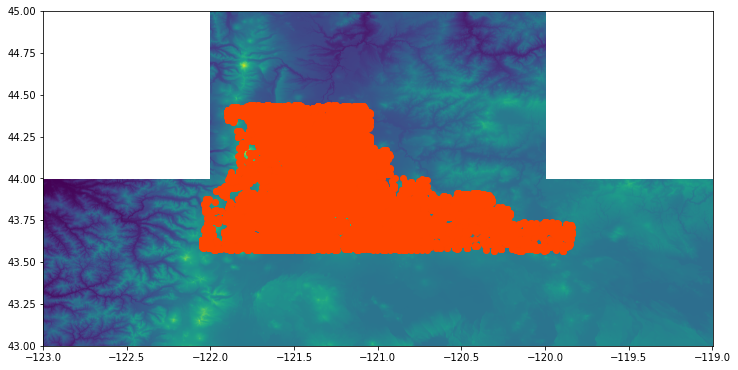

In [898]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
strava_slope_new.boundary.plot(ax=ax, color='orangered')
show(eu, ax=ax)

In [899]:
sf1=strava_slope_new.loc[:,["OSM_ID","starting point"]]
sf1.columns=["OSM_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["OSM_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                     geometry   start_lon  start_lat
0  5138004.0  POINT (-120.96071 43.58397) -120.960714  43.583966
1  5138004.0  POINT (-120.96553 43.58264) -120.965526  43.582639
2  5138004.0  POINT (-120.96993 43.58181) -120.969928  43.581815
3  5138004.0  POINT (-120.97955 43.58030) -120.979552  43.580304
4  5138004.0  POINT (-120.98031 43.58062) -120.980307  43.580623

In [900]:
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = eu.index(x,y)
sf2["starting_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [901]:
ef1=strava_slope_new.loc[:,["OSM_ID","ending point"]]
ef1
ef1.columns=["OSM_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["OSM_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

OSM_ID                     geometry     end_lon    end_lat
0  5138004.0  POINT (-120.96553 43.58264) -120.965526  43.582639
1  5138004.0  POINT (-120.96993 43.58181) -120.969928  43.581815
2  5138004.0  POINT (-120.97955 43.58030) -120.979552  43.580304
3  5138004.0  POINT (-120.98031 43.58062) -120.980307  43.580623
4  5138004.0  POINT (-120.99644 43.58245) -120.996442  43.582446

In [902]:
ef1["ending_ele"]= None
#point in test['geometry']:
x = ef1["end_lon"]
y = ef1["end_lat"]
row, col = eu.index(x,y)
ef1["ending_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [903]:
s=sf2
s=s.drop(["geometry"],axis=1)
s.head(5)

OSM_ID   start_lon  start_lat  starting_ele
0  5138004.0 -120.960714  43.583966   1511.569580
1  5138004.0 -120.965526  43.582639   1508.930786
2  5138004.0 -120.969928  43.581815   1499.885254
3  5138004.0 -120.979552  43.580304   1492.722900
4  5138004.0 -120.980307  43.580623   1493.173950

In [904]:
e=ef1
e=e.drop(["geometry"],axis=1)
e.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID     end_lon    end_lat   ending_ele
0  5138004.0 -120.965526  43.582639  1508.930786
1  5138004.0 -120.969928  43.581815  1499.885254
2  5138004.0 -120.979552  43.580304  1492.722900
3  5138004.0 -120.980307  43.580623  1493.173950
4  5138004.0 -120.996442  43.582446  1485.085083

In [905]:
strava_slope_new=strava_slope_new.loc[:, ['OSM_ID',"geometry","length"]]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [906]:
from functools import reduce
strava_all=[strava_slope_new,s,e]

strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['OSM_ID'],
                                            how='outer'), strava_all).fillna('0')

In [907]:
strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
strava_all1=strava_all1.drop_duplicates(subset=['OSM_ID'], keep='first')
strava_all1.head()

OSM_ID                                           geometry      length  \
0    5138004.0  LINESTRING (-120.96071 43.58397, -120.96553 43...  415.635853   
216  5138054.0  LINESTRING (-120.93865 43.61568, -120.93860 43...  452.592810   
224  5138106.0  LINESTRING (-120.33112 43.61166, -120.33091 43...  127.105498   
251  5138152.0  LINESTRING (-121.01520 43.59162, -121.01504 43...  404.937423   
252  5138156.0  LINESTRING (-121.02631 43.57409, -121.02644 43...  633.869682   

      start_lon  start_lat  starting_ele     end_lon    end_lat   ending_ele  \
0   -120.960714  43.583966   1511.569580 -120.965526  43.582639  1508.930786   
216 -120.938655  43.615681   1591.768188 -120.939289  43.611651  1579.356934   
224 -120.331117  43.611658   1442.211426 -120.329714  43.611287  1437.313477   
251 -121.015196  43.591616   1500.318115 -121.015545  43.588003  1510.915283   
252 -121.026313  43.574085   1461.644165 -121.028637  43.579527  1466.575317   

        slope  
0    0.634881  
216  2.742256  
224  3.853452  
251  2.616989  
252  0.777944

In [908]:
print(strava_all1.crs)
strava_all2=strava_all1.copy()

epsg:4269


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [909]:
# set the co-ordinate system first
strava_all2 = strava_all2.set_crs("EPSG:4269")

# Reproject the geometries by replacing the values with projected ones
strava_all2_slope = strava_all2.to_crs(epsg=2839)
strava_all2_slope.head(10)

OSM_ID                                           geometry  \
0    5138004.0  LINESTRING (1462793.933 213083.213, 1462404.51...   
216  5138054.0  LINESTRING (1464593.806 216597.004, 1464598.21...   
224  5138106.0  LINESTRING (1513632.523 216071.089, 1513649.03...   
251  5138152.0  LINESTRING (1458399.373 213958.713, 1458411.31...   
252  5138156.0  LINESTRING (1457489.556 212016.722, 1457479.85...   
279  5138223.0  LINESTRING (1471932.019 211756.677, 1472066.63...   
287  5138229.0  LINESTRING (1452444.200 216835.878, 1452474.21...   
288  5138233.0  LINESTRING (1480914.175 211884.625, 1480795.25...   
289  5138348.0  LINESTRING (1506311.380 214457.052, 1506326.13...   
290  5138364.0  LINESTRING (1445587.371 214906.690, 1445662.12...   

          length   start_lon  start_lat  starting_ele     end_lon    end_lat  \
0     415.635853 -120.960714  43.583966   1511.569580 -120.965526  43.582639   
216   452.592810 -120.938655  43.615681   1591.768188 -120.939289  43.611651   
224   127.105498 -120.331117  43.611658   1442.211426 -120.329714  43.611287   
251   404.937423 -121.015196  43.591616   1500.318115 -121.015545  43.588003   
252   633.869682 -121.026313  43.574085   1461.644165 -121.028637  43.579527   
279   963.679981 -120.847493  43.572422   1589.886841 -120.836396  43.573108   
287   144.491740 -121.089196  43.617160   1582.650635 -121.088753  43.615906   
288  1182.084965 -120.736295  43.573855   1497.818359 -120.740987  43.583318   
289   274.734140 -120.421832  43.597226   1553.775757 -120.419142  43.598639   
290   409.938036 -121.173953  43.599330   1679.012939 -121.172819  43.602828   

      ending_ele     slope  
0    1508.930786  0.634881  
216  1579.356934  2.742256  
224  1437.313477  3.853452  
251  1510.915283  2.616989  
252  1466.575317  0.777944  
279  1598.139404  0.856359  
287  1581.398071  0.866875  
288  1503.135498  0.449810  
289  1549.624512  1.511004  
290  1711.398071  7.900007

In [910]:
#Identify the OSM ID link that have bridge

inter_road_bridge=pd.merge (left=bridge_only, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
inter_road_bridge=inter_road_bridge.loc[:,["osm_id_sensor", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
inter_road_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge
0      5369529.0       0
1      5369733.0       0
2      5369877.0       0
3      5371320.0       0
4      5372140.0       0

In [911]:
strava_all2_slope=strava_all2_slope.loc[:,['geometry','slope']]
gdf1=gdf1.loc[:,['osm_id_sensor','geometry']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [912]:
# Now clip with buffer for each location
#buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
buffer_clip_slope1=gpd.sjoin(strava_all2_slope,gdf1,op='intersects') 
buffer_clip_slope1.head(5)

geometry     slope  \
79160   LINESTRING (1395127.212 257874.461, 1395095.83...  1.061551   
80061   LINESTRING (1394973.677 257954.992, 1394931.21...  0.878193   
80277   LINESTRING (1394973.677 257954.992, 1395066.92...  1.281820   
146313  LINESTRING (1395088.586 257894.645, 1395081.65...  0.414320   
210904  LINESTRING (1395020.774 257783.690, 1395023.81...  1.555711   

        index_right  osm_id_sensor  
79160           342    205976639.0  
80061           342    205976639.0  
80277           342    205976639.0  
146313          342    205976639.0  
210904          342    205976639.0

In [913]:
#Make all link having bridge  slope is zero
buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='osm_id_sensor', left_on='osm_id_sensor',how='inner')
buffer_clip_slope2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0      5369529.0       0  LINESTRING (1431874.983 268045.227, 1431896.03...   
1      5369529.0       0  LINESTRING (1431766.791 267961.263, 1431782.28...   
2      5369529.0       0  LINESTRING (1431996.319 267863.812, 1432009.68...   
3      5369529.0       0  LINESTRING (1431996.319 267863.812, 1431994.64...   
4      5369529.0       0  LINESTRING (1431850.249 268023.476, 1431850.18...   

      slope  index_right  
0  2.984117          300  
1  2.702574          300  
2  3.559880          300  
3  3.906787          300  
4  5.623017          300

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

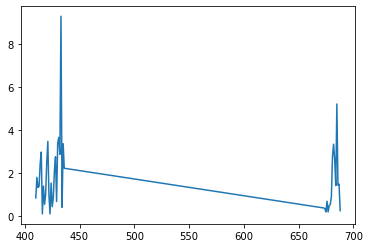

In [914]:
# Separate bridge and non bridge data
bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
bridge_presence.slope.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

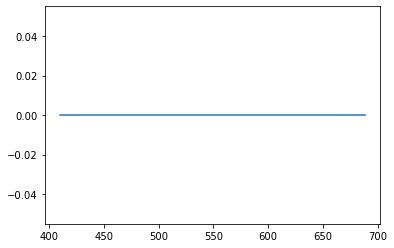

In [915]:
bridge_presence['slope']=0
bridge_presence.slope.plot()

In [916]:
bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
bridge_absence.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0      5369529.0       0  LINESTRING (1431874.983 268045.227, 1431896.03...   
1      5369529.0       0  LINESTRING (1431766.791 267961.263, 1431782.28...   
2      5369529.0       0  LINESTRING (1431996.319 267863.812, 1432009.68...   
3      5369529.0       0  LINESTRING (1431996.319 267863.812, 1431994.64...   
4      5369529.0       0  LINESTRING (1431850.249 268023.476, 1431850.18...   

      slope  index_right  
0  2.984117          300  
1  2.702574          300  
2  3.559880          300  
3  3.906787          300  
4  5.623017          300

In [917]:
# now join again
buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
# put the cap for the slope as maximum 25%
buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
buffer_clip_slope3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
410     39857665.0       1  LINESTRING (1434146.632 266272.498, 1434103.19...   
411     39857665.0       1  LINESTRING (1434146.632 266272.498, 1434170.17...   
412     39857665.0       1  LINESTRING (1434227.042 266093.483, 1434244.60...   
413     39857665.0       1  LINESTRING (1434240.552 266198.971, 1434187.81...   
414     39857665.0       1  LINESTRING (1434377.829 266094.685, 1434369.91...   

     slope  index_right  
410    0.0          132  
411    0.0          132  
412    0.0          132  
413    0.0          132  
414    0.0          132

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

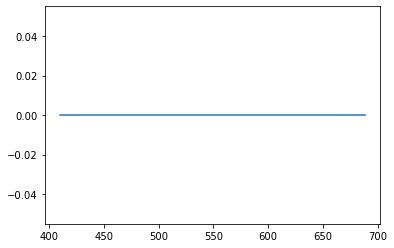

In [918]:
check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
check.slope.plot()

In [919]:
# Now calculate the mean slope for each count location
output_slope=buffer_clip_slope3.groupby(by=['osm_id_sensor'])['slope'].mean().reset_index()
output_slope.columns=['osm_id','slope']
output_slope.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     slope
0  5369529.0  3.073782
1  5369733.0  1.460434
2  5369877.0  2.408299
3  5371320.0  1.143686
4  5372140.0  1.530186

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [920]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [921]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [922]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [923]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [924]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [925]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [926]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [927]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/portland/KPDX/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [928]:
w19=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/bend_weather.csv")
w19

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0        25.9        13       20     15.8       10       92     69.4       31   
1        32.0        18       25     20.1       13       85     64.7       35   
2        42.3        36       26     25.0       24       67     51.2       39   
3        42.5        32       26     22.6       19       73     46.9       34   
4        40.3        29       33     25.4       23       78     57.3       39   
..        ...       ...      ...      ...      ...      ...      ...      ...   
360      30.8        19       26     23.3       16       88     74.9       53   
361      34.2        25       29     25.4       21       85     71.9       44   
362      29.6        26       29     27.0       23       93     89.9       82   
363      29.7        28       30     27.2       25       96     90.4       85   
364      40.8        31       41     31.4       27       92     71.9       39   

     Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  \
0           8       4.0         0      27.1      27.1      27.0   
1          10       3.7         0      27.0      27.0      26.9   
2          13       6.2         0      26.9      26.8      26.7   
3          14       4.8         0      26.7      26.7      26.6   
4          22       8.8         0      26.6      26.4      26.2   
..        ...       ...       ...       ...       ...       ...   
360         5       1.2         0      27.0      26.9      26.8   
361         7       3.1         0      27.0      26.9      26.9   
362        14       6.2         0      27.0      26.9      26.8   
363         8       2.4         0      27.1      27.1      27.0   
364        15       4.4         0      27.1      26.9      26.7   

     Precipitation        Date  
0              0.0    2019-1-1  
1              0.0    2019-1-2  
2              0.0    2019-1-3  
3              0.0    2019-1-4  
4              0.0    2019-1-5  
..             ...         ...  
360            0.0  2019-12-27  
361            0.0  2019-12-28  
362            0.0  2019-12-29  
363            0.0  2019-12-30  
364            0.0  2019-12-31  

[365 rows x 16 columns]

In [929]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg  Hum_avg  Precipitation
0        25.9     69.4            0.0
1        32.0     64.7            0.0
2        42.3     51.2            0.0
3        42.5     46.9            0.0
4        40.3     57.3            0.0
..        ...      ...            ...
360      30.8     74.9            0.0
361      34.2     71.9            0.0
362      29.6     89.9            0.0
363      29.7     90.4            0.0
364      40.8     71.9            0.0

[365 rows x 3 columns]

In [930]:
output_weather.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [931]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [932]:
output_weather2.isnull().values.any()

False

In [933]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         48.478082
Hum_avg          61.352877
Precipitation     0.028959
dtype: float64

# Aggregate all output together in a dataframe

In [934]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [emerging_data,output_origin,output_destination,output_odl,output_bikecom,output_lane,output_intersection_density1a,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope,output_odl_gps]

In [935]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
                                            how='left'), df_all)
df_merged_eco_short=df_merged_eco_short.drop_duplicates(subset=['site_id'],keep='first')

In [936]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

In [937]:
# Add weather data in this new data frame
df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
df_merged_eco_short.head()

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  48381206.0  P001BEN   permanent   46.209524   6.561644   2.616438   3189.0   
1   5369877.0  P002BEN   permanent  220.426625   6.958904   3.068493   2617.0   
2  49105950.0  P003BEN   permanent  127.953968  13.726027   4.369863   3128.0   
3  46094523.0  P004BEN   permanent  109.378321   7.027397   2.178082   1998.0   
4  46094520.0  P005BEN   permanent   61.295238   5.260274   1.698630   1387.0   

   Bike Share Origin  Bike Share Destination  Bike Share Crossing  ...  \
0                2.0                     2.0                 57.0  ...   
1                NaN                     NaN                 14.0  ...   
2                NaN                     4.0                238.0  ...   
3              210.0                   208.0                325.0  ...   
4                NaN                     NaN                  3.0  ...   

   Median_HH_income   HH_density  population_density  employment_density  \
0      57395.000000  1092.786565         2091.766480         1919.990666   
1      50127.042302  1084.678535         2295.180081         1901.475198   
2      44134.255712  1710.957460         3001.449800         2713.463315   
3      62547.262755  1116.586613         2383.468959         1924.100868   
4      55552.383836   905.948245         2151.814862         1716.729840   

  Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0     302.954352  1.742248             340.0  48.478082  61.352877   
1     200.280232  2.408299              51.0  48.478082  61.352877   
2      25.678051  1.097476             592.0  48.478082  61.352877   
3     121.718182  2.485532             379.0  48.478082  61.352877   
4     222.945515  0.000000              47.0  48.478082  61.352877   

   Precipitation  
0       0.028959  
1       0.028959  
2       0.028959  
3       0.028959  
4       0.028959  

[5 rows x 89 columns]

In [938]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Eco_short_2019_updated_Bend_0.1_mile_network_buffer_data.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use Keplergl to produce dynamic Map for all variables

In [939]:
# Make dynamic visualization
#!pip install keplergl

In [940]:
ecoshort.head(5)

site_id                  site_name sensor_type  year region  \
0   P001BEN              Colorado Ave.   permanent  2019   Bend   
7   P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
14  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
21  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
28  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0              2.0   46.209524   6.561644   2.616438   3189.0  ...   
7              2.0  220.426625   6.958904   3.068493   2617.0  ...   
14             3.0  127.953968  13.726027   4.369863   3128.0  ...   
21             1.0  109.378321   7.027397   2.178082   1998.0  ...   
28             2.0   61.295238   5.260274   1.698630   1387.0  ...   

    osm_id_sensor  buff_dist                        geometry  \
0      48381206.0        2.0  POINT (1434297.657 265113.372)   
7       5369877.0        2.0  POINT (1435206.451 265737.006)   
14     49105950.0        2.0  POINT (1433951.414 265816.071)   
21     46094523.0        2.0  POINT (1434705.630 266350.843)   
28     46094520.0        2.0  POINT (1435063.168 266646.066)   

    min_dist_to_school min_dist_to_college min_dist_to_university  lanes  \
0          1836.231483        10520.590150            2387.326197      2   
7          1839.981365        11794.261428            5773.809117      2   
14         1671.767045         8150.297244            4506.877508      1   
21         2062.855533         9487.250630            6656.861545      2   
28         2917.732762        10342.951024            8005.030293      2   

    maxspeed  min_dist_to_polygon min_dist_to_CBD  
0       35.0          5852.063372     2706.272531  
7       25.0          5422.732422     1492.814353  
14      25.0          7531.224178     2639.417043  
21      25.0          6629.718814     1816.778856  
28      25.0          5131.784928     2955.355588  

[5 rows x 23 columns]

In [941]:
ecoshort_selected=ecoshort.loc[:,["osm_id_sensor","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

epsg:2839


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [942]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:2839")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D.head()

osm_id_sensor                     geometry
0      48381206.0  POINT (-121.31986 44.05029)
7       5369877.0  POINT (-121.30860 44.05598)
14     49105950.0  POINT (-121.32427 44.05658)
21     46094523.0  POINT (-121.31492 44.06146)
28     46094520.0  POINT (-121.31050 44.06415)

In [943]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         Lon        Lat
0      48381206.0 -121.319863  44.050292
7       5369877.0 -121.308599  44.055983
14     49105950.0 -121.324270  44.056585
21     46094523.0 -121.314923  44.061464
28     46094520.0 -121.310496  44.064152

In [944]:
ecoshort_selected_3D.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    float64
Lon              float64
Lat              float64
dtype: object

In [945]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:2839")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["osm_id_sensor","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='osm_id_sensor', right_on='osm_id_sensor', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['osm_id_sensor','Lon','Lat','geometry']
buffer_vis.head()

epsg:2839


osm_id_sensor         Lon        Lat  \
0     48381206.0 -121.319863  44.050292   
1      5369877.0 -121.308599  44.055983   
2     49105950.0 -121.324270  44.056585   
3     46094523.0 -121.314923  44.061464   
4     46094520.0 -121.310496  44.064152   

                                            geometry  
0  POLYGON ((-121.31705 44.04989, -121.31708 44.0...  
1  POLYGON ((-121.30885 44.05441, -121.30885 44.0...  
2  POLYGON ((-121.32369 44.05520, -121.32373 44.0...  
3  POLYGON ((-121.31408 44.06037, -121.31422 44.0...  
4  POLYGON ((-121.31090 44.06297, -121.31097 44.0...

In [946]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='osm_id', right_on='osm_id_sensor', how='inner'))
df_dynamic1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  48381206.0  P001BEN   permanent   46.209524   6.561644   2.616438   3189.0   
1   5369877.0  P002BEN   permanent  220.426625   6.958904   3.068493   2617.0   
2  49105950.0  P003BEN   permanent  127.953968  13.726027   4.369863   3128.0   
3  46094523.0  P004BEN   permanent  109.378321   7.027397   2.178082   1998.0   
4  46094520.0  P005BEN   permanent   61.295238   5.260274   1.698630   1387.0   

   Bike Share Origin  Bike Share Destination  Bike Share Crossing  ...  \
0                2.0                     2.0                 57.0  ...   
1                NaN                     NaN                 14.0  ...   
2                NaN                     4.0                238.0  ...   
3              210.0                   208.0                325.0  ...   
4                NaN                     NaN                  3.0  ...   

   Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0      302.954352  1.742248             340.0  48.478082  61.352877   
1      200.280232  2.408299              51.0  48.478082  61.352877   
2       25.678051  1.097476             592.0  48.478082  61.352877   
3      121.718182  2.485532             379.0  48.478082  61.352877   
4      222.945515  0.000000              47.0  48.478082  61.352877   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.028959     48381206.0 -121.319863  44.050292   
1       0.028959      5369877.0 -121.308599  44.055983   
2       0.028959     49105950.0 -121.324270  44.056585   
3       0.028959     46094523.0 -121.314923  44.061464   
4       0.028959     46094520.0 -121.310496  44.064152   

                                            geometry  
0  POLYGON ((-121.31705 44.04989, -121.31708 44.0...  
1  POLYGON ((-121.30885 44.05441, -121.30885 44.0...  
2  POLYGON ((-121.32369 44.05520, -121.32373 44.0...  
3  POLYGON ((-121.31408 44.06037, -121.31422 44.0...  
4  POLYGON ((-121.31090 44.06297, -121.31097 44.0...  

[5 rows x 93 columns]

In [947]:
#buffer_vis=gdf1.loc[:,['osm_id_sensor','geometry']]
#buffer_vis.columns=['osm_id','geometry']
#buffer_vis

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [948]:
pd.DataFrame.to_csv(df_dynamic1, 'keplergl_2019_Network_buffer_0.1_mile_eco_short_Bend.csv', sep=',', na_rep='0', index=False)


In [949]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [950]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

In [951]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [952]:
#df_dynamic1.dtypes

In [953]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [954]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/keplergl_2019_Network_buffer_0.1_mile_eco_short_Bend.csv")
data=data.fillna(0)
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0    483812…

In [955]:
data.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  48381206.0  P001BEN   permanent   46.209524   6.561644   2.616438   3189.0   
1   5369877.0  P002BEN   permanent  220.426625   6.958904   3.068493   2617.0   
2  49105950.0  P003BEN   permanent  127.953968  13.726027   4.369863   3128.0   
3  46094523.0  P004BEN   permanent  109.378321   7.027397   2.178082   1998.0   
4  46094520.0  P005BEN   permanent   61.295238   5.260274   1.698630   1387.0   

   Bike Share Origin  Bike Share Destination  Bike Share Crossing  ...  \
0                2.0                     2.0                 57.0  ...   
1                0.0                     0.0                 14.0  ...   
2                0.0                     4.0                238.0  ...   
3              210.0                   208.0                325.0  ...   
4                0.0                     0.0                  3.0  ...   

   Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0      302.954352  1.742248             340.0  48.478082  61.352877   
1      200.280232  2.408299              51.0  48.478082  61.352877   
2       25.678051  1.097476             592.0  48.478082  61.352877   
3      121.718182  2.485532             379.0  48.478082  61.352877   
4      222.945515  0.000000              47.0  48.478082  61.352877   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.028959     48381206.0 -121.319863  44.050292   
1       0.028959      5369877.0 -121.308599  44.055983   
2       0.028959     49105950.0 -121.324270  44.056585   
3       0.028959     46094523.0 -121.314923  44.061464   
4       0.028959     46094520.0 -121.310496  44.064152   

                                            geometry  
0  POLYGON ((-121.3170460104883 44.04988619457728...  
1  POLYGON ((-121.3088479043904 44.05440516523994...  
2  POLYGON ((-121.3236853601022 44.05519970357017...  
3  POLYGON ((-121.3140777391078 44.06036623993208...  
4  POLYGON ((-121.3108966543817 44.06297155682683...  

[5 rows x 93 columns]

In [956]:
# save as htm file
map_2.save_to_html(file_name="Eco_short_2019_Bend_0.1_mile_network_buffer.html")

Map saved to Eco_short_2019_Bend_0.1_mile_network_buffer.html!


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [957]:
#conda list ipython

In [958]:
end = time.time()
print("Tune Fit Time:", end - start)

Tune Fit Time: 1176.6870911121368


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT